Teste para ver se vai conseguir rodar todas as bibliotecas:

In [176]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

---------------

Funções principais:

In [45]:
import numpy as np

def Z(J,h,T):
    Z = 1 + 2*(np.cosh(h/T)) + np.exp(J/T)
    return Z

def energia_Livre(J, h, T):
    F = (-1) * T * (np.log(Z(J, h, T)))
    return F

def energia_Media(J, h, T):
    numerador = ((-1) * ((J * np.exp(J/T)) + (2 * h * np.sinh(h/T)))) 
    denominador = Z(J, h, T)
    U = (numerador / denominador)
    return U

def entropia(J, h, T):
    numerador = (((-1) * ((J*np.exp(J/T)) + (2*h*np.sinh(h/T))))/T)
    denominador = Z(J, h, T)
    S = (np.log(Z(J, h, T)) + (numerador / denominador))
    return S 

def magnetizacao(J, h, T):
    numerador = (2 * np.sinh(h/T))
    denominador = Z(J, h, T)
    M = (numerador / denominador)
    return M

def susceptibilidade(J, h, T):
    term1 = ((2 * np.cosh(h/T)) / (T * Z(J, h, T)))
    term2 = ((4 * (np.sinh(h/T))**2) / (T * (Z(J, h, T))**2))
    X = term1 - term2
    return X


#Função que vai calcular todas as função acima para dados os valores de J, h e T
def calcula_funcoes(J, h, T):
    F = energia_Livre(J, h, T)
    U = energia_Media(J, h, T)
    S = np.round(entropia(J, h, T), 10)
    M = np.round(magnetizacao(J, h, T), 10)
    X = susceptibilidade(J, h, T)

    return F, U, S, M, X

---------------------

Populações:

In [2]:
import numpy as np

def P1(J, h, T):
    denominador = (1 + (2*np.cosh(h/T)) + np.exp(J/T))
    numerador = np.exp((-1)*h/T)
    P1 = numerador/denominador  
    
    return P1

def P2(J, h, T):
    denominador = (1 + (2*np.cosh(h/T)) + np.exp(J/T))
    numerador = 1
    P2 = numerador/denominador  
    
    return P2

def P3(J, h, T):
    denominador = (1 + (2*np.cosh(h/T)) + np.exp(J/T))
    numerador = np.exp(h/T)
    P3 = numerador/denominador  
    
    return P3

def P4(J, h, T):
    denominador = (1 + (2*np.cosh(h/T)) + np.exp(J/T))
    numerador = np.exp(J/T)
    P4 = numerador/denominador  
    
    return P4


#Função que vai calcular todas as populações para dado J, h e T
def populacoes(J, h, T):
    P1_value = P1(J, h, T)
    P2_value = P2(J, h, T)
    P3_value = P3(J, h, T)
    P4_value = P4(J, h, T)
    
    return [P1_value, P2_value, P3_value, P4_value]

---------------

Calculando todas as informações do Ciclo, ie: $\\$
Tc_add (Temp fria após processo adiabático), Th_add (Temp Quente após processo adiabático) e as Temperaturas durantes todos os passos do ciclo $\\$
Energia Livre, Energia Média, Entropia, Magnetização e Susceptibilidade, durante todo o ciclo (Separado por processo adibáticos e isocóricos) $\\$
W_in, Q_in, W_out, Q_out, Eff, engineOrWhat $\\$
 

Temperaturas:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def Temp(J, h, T, entropy):
    #Função que vai garantir que a entropia do sistema vai ser constante durante todo o processo    
    function = (entropy - entropia(J, h, T)) 
    return function

def calcula_T_Ciclo(Ji, Jf, hi, hf, Tc, Th, PASSOS):


    #Tcold e Thot são as temperatures que vao ser utilizadas para os processos adiabáticos
    Tcold = Tc
    Thot = Th

    #calculando a entropia para os valores iniciais do problema, e depois precisamos garantir que ela vai ser constante durante os processo adiabáticos

    S_c = round(entropia(Ji, hi, Tc), PASSOS)
    S_h = round(entropia(Jf, hf, Th), PASSOS)

    #criando um linspace de h de hi até hf
    h_values_i = np.linspace(hi, hf, PASSOS)
    h_values_f = np.linspace(hf, hi, PASSOS)

    #criando um linspace de J de Ji até Jf
    J_values_i = np.linspace(Ji, Jf, PASSOS)
    J_values_f = np.linspace(Jf, Ji, PASSOS)

    #criando arrays para armazenar os valores de entropia e temperatura (apenas o necessário para determinar as temperaturas dos processo adiabáticos)
    temperatures = []
    S_values_i = np.zeros_like(h_values_i)
    T_values_i = np.zeros_like(h_values_i)    
    S_values_f = np.zeros_like(h_values_i)
    T_values_f = np.zeros_like(h_values_i)

    #Iteração que vai determinar a temperatura em todo o processo de  Compressão Adiabática (Tc -> Tc_add) Quando varia J e h (Ji -> Jf e hi -> hf)
    #Além disso, vamos garantir que a entropia vai ser constante durante todo o processo
    #Além disso, vamos determinar a Entropia e Magnetização para cada temperatura entre [Tc, Tc_add]
    for i, h in enumerate(h_values_i):
        
        #calculando a temperatura para cada valor de h e J durante o processo de compressão adiabática
        Tc_add = fsolve(lambda Temperature_c_add: Temp(J_values_i[i], h_values_i[i], Temperature_c_add, S_c), Tcold)
        #print(f"Passo número: {i}, Temperatura de Compressão Adiabática: {Tc_add}")
        
        
        T_values_i[i] = Tc_add[0]
        S_values_i[i] = np.round(entropia(J_values_i[i], h_values_i[i], T_values_i[i]), 10)       
        
        temperatures.append(Tc_add[0])        
        S_c = S_values_i[i]
        Tcold = Tc_add[0]

    #Iteração que vai determinar a temperatura em todo o processo de  Expansão Adiabática (Th -> Th_add) Quando varia J e h (Jf -> Ji e hf -> hi)
    #Além disso, vamos garantir que a entropia vai ser constante durante todo o processo
    #Além disso, vamos determinar a Entropia e Magnetização para cada temperatura entre [Th, Th_add]
    for i, h in enumerate(h_values_f):
        
        #calculando a temperatura para cada valor de h e J durante o processo de expansão adiabática
        Th_add = fsolve(lambda temperature_h_add: Temp(J_values_f[i], h_values_f[i], temperature_h_add, S_h), Thot)
        #print(f"Passo número: {i}, Temperatura de Expansão Adiabátia: {Th_add}")


        T_values_f[i] = Th_add[0]
        S_values_f[i] = round(entropia(J_values_f[i], h_values_f[i], T_values_f[i]), 10)    

        temperatures.append(Th_add[0])        
        S_h = S_values_f[i]
        Thot = Th_add[0]

    #Criando as temperaturas e entropias dos processos de Aquecimento Isocórico (T_add -> Th) e Resfriamento Isocórico (T_add -> Tc)
    
    T_heating_values = np.linspace(Tc_add, Th, PASSOS)  
    T_cooling_values = np.linspace(Th_add, Tc, PASSOS)


    print("Temperatures Range:")
    print(f"1 -> 2 (Tc -> Tc_add): Tc: {Tc}, Tc_add: {Tc_add}")
    print(f"2 -> 3 (T_heating): Tc_add: {Tc_add} Th: {Th}")
    print(f"3 -> 4 (Th -> Th_add): Th: {Th}, Th_add: {Th_add}")
    print(f"4 -> 1 (T_cooling): Th_add: {Th_add}, Tc: {Tc}")

    #Retonando apenas as temperaturas e entropias dos processos de Compressão(Tc -> Tc_add) e Expansão(Th -> Th_add) Adiabáticos, e Aquecimento(T_add -> Th) e Resfriamento(T_add -> Tc) Isocóricos
    #Sao elas: Tc_add(A temperatura no final do processo de compressão adiabática), T_values_i(Temperaturas do processo de compressão adiabática), T_cooling_values(Temperaturas do processo de resfriamento isocórico),
    #Th_add(A temperatura no final do processo de expansão adiabática), T_values_f(Temperaturas do processo de expansão adiabática), T_heating_values(Temperaturas do processo de aquecimento isocórico)
    return [Tc_add, T_values_i, T_cooling_values, Th_add, T_values_f, T_heating_values] 


Abaixo: A função que iria calcular as Populações, Energia Livre, Energia Media, Entropia, Magnetização e Susceptibilidade para cada processo dos ciclos, onde $\\$
$\cdot$ Expansão Adiabática: ($\lambda_i \rightarrow \lambda_f$), ($T_c \rightarrow Tc_{add}$) $\\$
$\cdot$ Aquecimento Isocórico: ($\lambda_f$), ($Tc_{add} \rightarrow T_h$) $\\$
$\cdot$ Compressão Adiabática: ($\lambda_f \rightarrow \lambda_i$), ($T_h \rightarrow Th_{add}$) $\\$
$\cdot$ Resfriamento Isocórico: ($\lambda_i$), ($Th_{add} \rightarrow Tc$) $\\$

$\\$
Além disso, Win, Wout, Qin, Qout e eff.


In [147]:
def Ciclo_de_Otto(Ji, Jf, hi, hf, Tc, Tc_add, Th, Th_add):
    
    #calculando a energia interna para J1, hi e Tc
    E1 = energia_Media(Ji, hi, Tc)
    
    #calculando a energia interna para Jf, hf e Tc_add
    E2 = energia_Media(Jf, hf, Tc_add)
    
    #calculando a energia interna para Jf, hf e Th
    E3 = energia_Media(Jf, hf, Th)
    
    #calculando a energia interna para Ji, hi e Th_add
    E4 = energia_Media(Ji, hi, Th_add)
    
    #calculando Os valores de Trabalho e Calor em cada parte do Ciclo de Otto
    Wout = E2 - E1
    Qin = E3 - E2
    Win = E4 - E3
    Qout = E1 - E4
    
    #Calculando a eficiência do ciclo 
    print(f'eff = -(Wout + Win)/abs(Qin)')
    eff = -(Wout + Win)/abs(Qin)
    
    
    return [Win, Wout, Qin, Qout, eff] 



def functions_values(Ji, Jf, hi, hf, Tc, Th, PASSOS):
    #criando um linspace de h de hi até hf
    h_values_i = np.linspace(hi, hf, PASSOS)
    h_values_f = np.linspace(hf, hi, PASSOS)

    #criando um linspace de J de Ji até Jf
    J_values_i = np.linspace(Ji, Jf, PASSOS)
    J_values_f = np.linspace(Jf, Ji, PASSOS)

    #Obtendo os valores de temperatura durante todo o ciclo
    #Tc_add, T_values_i, T_cooling_values, Th_add, T_values_f, T_heating_values
    valores = calcula_T_Ciclo(Ji, Jf, hi, hf, Tc, Th, PASSOS)
    Tc_add = valores[0]
    T_values_i = valores[1]
    T_cooling_values = valores[2]
    Th_add = valores[3]
    T_values_f = valores[4]
    T_heating_values = valores[5]
    
    
    #Expansão Adiabatica: (λ_i → λ_f), (T_c → Tc_add):
    #F_values_Exp_ADD, U_values_Exp_ADD, S_values_Exp_ADD, M_values_Exp_ADD, X_values_Exp_ADD
    Exp_add_values  = calcula_funcoes(J_values_i, h_values_i, T_values_i)
    #Populações durante o processo de Expansão Adiabática
    #P1_value, P2_value, P3_value, P4_value
    populacoes_Exp_ADD = populacoes(J_values_i, h_values_i, T_values_i)


    #Aquecimento Isocórico: (λ_f), (Tc_add → T_h)
    #F_values_hot_ISO, U_values_hot_ISO, S_values_hot_ISO, M_values_hot_ISO, X_values_hot_ISO 
    Aqu_ISO_values= calcula_funcoes(Jf, hf, T_heating_values)
    #Populações durante o processo de Aquecimento Isocórico
    #P1_value, P2_value, P3_value, P4_value
    populacoes_Aqu_ISO = populacoes(Jf, hf, T_heating_values)


    #Compressão Adiabática: (λ_f → λ_i), (T_h → Th_add)
    #F_values_Com_ADD, U_values_Com_ADD, S_values_Com_ADD, M_values_Com_ADD, X_values_Com_ADD
    Com_ADD_values = calcula_funcoes(J_values_f, h_values_f, T_values_f)
    #Populações durante o processo de Compressão Adiabática
    #P1_value, P2_value, P3_value, P4_value
    populacoes_Com_ADD = populacoes(J_values_f, h_values_f, T_values_f)
     

    #Resfriamento Isocórico: (λ_i), (Th_add → Tc)
    #F_values_cold_ISO, U_values_cold_ISO, S_values_cold_ISO, M_values_cold_ISO, X_values_cold_ISO
    Res_ISO_values = calcula_funcoes(Ji, hi, T_cooling_values)
    #Populações durante o processo de Resfriamento Isocórico
    #P1_value, P2_value, P3_value, P4_value
    populacoes_Res_ISO = populacoes(Ji, hi, T_cooling_values)
    

    #chamando a função Ciclo_de_Otto para calcular os valores de Win, Wout, Qin, Qout e eff
    #Win (Trabalho na Compressão), Wout (Trabalho na Expansão), Qin (Calor no Aquecimento), Qout (Calor no Resfriamento), eff (Eficiência do Ciclo de Otto, onde eff = -(Wout + Win)/abs(Qin))
    [Win, Wout, Qin, Qout, eff] = Ciclo_de_Otto(Ji, Jf, hi, hf, Tc, Tc_add, Th, Th_add)


    #Retornando todos os valores calculados
    #[J_values_i, h_values_i, (0 ,1)
    # J_values_f, h_values_f, (2, 3)
    # valores (Tc_add, T_values_i, T_cooling_values, Th_add, T_values_f, T_heating_values), (4)
    #
    # Exp_add_values (F_values_Exp_ADD, U_values_Exp_ADD, S_values_Exp_ADD, M_values_Exp_ADD, X_values_Exp_ADD), (5)
    #
    # populacoes_Exp_ADD (P1_value, P2_value, P3_value, P4_value), (6)
    #
    # Aqu_ISO_values (F_values_hot_ISO, U_values_hot_ISO (7)
    #
    # populacoes_Aqu_ISO (P1_value, P2_value, P3_value, P4_value), (8)
    #
    # Com_ADD_values (F_values_Com_ADD, U_values_Com_ADD, S_values_Com_ADD, M_values_Com_ADD, X_values_Com_ADD), (9)
    #
    # populacoes_Com_ADD (P1_value, P2_value, P3_value, P4_value), (10)
    #
    # Res_ISO_values (F_values_cold_ISO, U_values_cold_ISO, S_values_cold_ISO, M_values_cold_ISO, X_values_cold_ISO), (11)
    #
    # populacoes_Res_ISO (P1_value, P2_value, P3_value, P4_value), (12)
    #
    # Win, Wout, Qin, Qout, eff (13, 14, 15, 16, 17)
    #

    return [J_values_i, h_values_i,
            J_values_f, h_values_f,
            valores,
            Exp_add_values,
            populacoes_Exp_ADD,
            Aqu_ISO_values,
            populacoes_Aqu_ISO,
            Com_ADD_values,
            populacoes_Com_ADD,
            Res_ISO_values,
            populacoes_Res_ISO,
            Win, Wout, Qin, Qout, eff]


EngineOrWhat:

In [198]:
def engineOrWhat(Win, Wout, Qhot, Qcold, Tc, Th, eff):

#Importante lembrar que para o caso "normal"
#Win, Wout, Qin = Qhot, Qout = Qcold, Tc, Th, eff


    #Definindo o Trabalho do Ciclo
    W = Win + Wout   
    
    print(f'W = {W}')
    # Definindo as regiões
    # 0: Máquina, [1,2): Refrigerador, [2, 3): Acelerador, [3,4): Aquecedor
    if W < 0:
        print("Máquina!")
    elif (W > 0 and Qcold < 0 and Qhot > 0 and Tc > Th):
        print("Refrigerador!")
    elif (W > 0 and Qcold > 0 and Qhot < 0 and Tc < Th):
        print("Refrigerador!")
    elif (W > 0 and Qcold < 0 and Qhot > 0 and Tc < Th):
        print("Acelerador!")
    elif (W > 0 and Qcold > 0 and Qhot < 0 and Tc > Th):
        print("Acelerador!")
    elif (W > 0 and Qhot < 0 and Qcold < 0):
        print("Aquecedor!")

    eta = abs(W)/abs(Qhot)

    print(f'W = Win + Wout')
    print(f"ETA = abs(W) / abs(Qin) ETA=Eff???: {eta}")
    print(f"Win: {Win}, Wout: {Wout}, Qin: {Qhot}, Qout: {Qcold}, eff: {eff}")


--------------------

Plots:

Aqui vou organizar todos os plots. $\\$

Fazendo um conjunto de plots para cada processo do Ciclo.$\\$

O conjunto de plots inclui:

$\\$ $\cdot$ Populações x T (+) Niveis de Energia X T; ## (+) indica que teremos imagens lado a lado
$\\$ $\cdot$ Funções x h; ## Imagens lado a lado                      $\rightarrow$ ##Funções inclui Energia Livre, Energia Media, Entropia, Magnetização e Susceptibilidade 
$\\$ $\cdot$ Funções x T; ## Imagens lado a lado
$\\$ $\cdot$ Funções x J; ## Imagens lado a lado
$\\$ $\cdot$ T x Funções; ## Imagens lado a lado
$\\$ $\cdot$ Ciclo_de_Otto S x M; $\rightarrow$ ##junta todos os processos em um único gráfico
$\\$ $\cdot$
$\\$ $\cdot$
$\\$ $\cdot$

Poluções x T (+) Niveis de Energia x T:

In [6]:
import matplotlib.pyplot as plt

def plot_populacoes_separadas(T_values_i, T_values_f, T_cooling_values, T_heating_values, 
                               populacoes_Exp_ADD, populacoes_Aqu_ISO, 
                               populacoes_Com_ADD, populacoes_Res_ISO):



    ###DESCREVENDO OS NIVEIS DE ENERGIA DO SISTEMA
    # Níveis de energia do sistema
    niveis_energia = ['+h', '0', '-h', '-J']
    
    # Cria uma figura e uma grade de subplots 2x2.
    # figsize(largura, altura) em polegadas.
    fig, ax = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle('Análise de População por Etapa do Ciclo', fontsize=18)



    linhas = ['-', '--', ':', '-.']  # Estilos de linha para cada nível de energia
    # --- 1. Expansão Adiabática (Superior Esquerdo) ---
    ax[0, 0].set_title('Expansão Adiabática')
    for i in range(4):
        ax[0, 0].plot(T_values_i, populacoes_Exp_ADD[i], label=f'P{i+1} : {niveis_energia[i]}', marker='>',linestyle = linhas[i])
    

    # --- 2. Aquecimento Isocórico (Superior Direito) ---
    ax[0, 1].set_title('Aquecimento Isocórico')
    for i in range(4):
        ax[0, 1].plot(T_heating_values, populacoes_Aqu_ISO[i], label=f'P{i+1} : {niveis_energia[i]}', marker='x',linestyle = linhas[i])

    # --- 3. Compressão Adiabática (Inferior Esquerdo) ---
    ax[1, 0].set_title('Compressão Adiabática')
    for i in range(4):
        ax[1, 0].plot(T_values_f, populacoes_Com_ADD[i], label=f'P{i+1} : {niveis_energia[i]}', marker='<',linestyle = linhas[i])
        

    # --- 4. Resfriamento Isocórico (Inferior Direito) ---
    ax[1, 1].set_title('Resfriamento Isocórico')
    for i in range(4):
        ax[1, 1].plot(T_cooling_values, populacoes_Res_ISO[i], label=f'P{i+1} : {niveis_energia[i]}', marker='o',linestyle = linhas[i])

    # Configurações para todos os subplots de uma vez
    for i in range(2):
        for j in range(2):
            ax[i, j].set_xlabel('Temperatura')
            ax[i, j].set_ylabel('População')
            ax[i, j].legend()
            ax[i, j].grid(True)

    # Ajusta o layout para evitar sobreposição de títulos e eixos
    plt.tight_layout(rect=[0, 0, 1, 0.96])


    plt.show()


def plot_niveis_energia(T_values_i, T_values_f, T_cooling_values, T_heating_values,
                        h_values_i, J_values_i,
                        h_values_f, J_values_f,
                        Ji, Jf, hi, hf):

    linhas = ['-', '--', ':', '-.']  # Estilos de linha para cada nível de energia


    hi = np.linspace(hi, hi, len(T_values_i))
    hf = np.linspace(hf, hf, len(T_values_f))
    Ji = np.linspace(Ji, Ji, len(T_values_i))
    Jf = np.linspace(Jf, Jf, len(T_values_f))

    # Cria uma figura e uma grade de subplots 2x2
    fig, ax = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle('Níveis de Energia do Sistema por Etapa do Ciclo', fontsize=18)

    # --- 1. Expansão Adiabática (Superior Esquerdo) ---
    ax[0, 0].set_title('Expansão Adiabática')
    ax[0, 0].plot(T_values_i, h_values_i, label='E = +h', marker='>',linestyle=linhas[0])
    ax[0, 0].plot(T_values_i, np.zeros_like(T_values_i), label='E = 0', marker='>',linestyle=linhas[1])
    ax[0, 0].plot(T_values_i, (-1)*h_values_i, label='E = -h', marker='>',linestyle=linhas[2])
    ax[0, 0].plot(T_values_i, (-1)*J_values_i, label='E = -J', marker='>',linestyle=linhas[3])

    # --- 2. Aquecimento Isocórico (Superior Direito) ---
    ax[0, 1].set_title('Aquecimento Isocórico')
    ax[0, 1].plot(T_heating_values, hf, label='E = +h', marker='o',linestyle=linhas[0])
    ax[0, 1].plot(T_heating_values, np.zeros_like(T_heating_values), label='E = 0', marker='o',linestyle=linhas[1])
    ax[0, 1].plot(T_heating_values, (-1)*hf, label='E = -h', marker='o',linestyle=linhas[2])
    ax[0, 1].plot(T_heating_values, (-1)*Jf, label='E = -J', marker='o',linestyle=linhas[3])
    
    # --- 3. Compressão Adiabática (Inferior Esquerdo) ---
    ax[1, 0].set_title('Compressão Adiabática')
    ax[1, 0].plot(T_values_f, h_values_f, label='E = +h', marker='<',linestyle=linhas[0])
    ax[1, 0].plot(T_values_f, np.zeros_like(T_values_f), label='E = 0', marker='<',linestyle=linhas[1])
    ax[1, 0].plot(T_values_f, (-1)*h_values_f, label='E = -h', marker='<',linestyle=linhas[2])
    ax[1, 0].plot(T_values_f, (-1)*J_values_f, label='E = -J', marker='<',linestyle=linhas[3])

    # --- 4. Resfriamento Isocórico (Inferior Direito) ---
    ax[1, 1].set_title('Resfriamento Isocórico')
    ax[1, 1].plot(T_cooling_values, hi, label='E = +h', marker='o',linestyle=linhas[0])
    ax[1, 1].plot(T_cooling_values, np.zeros_like(T_cooling_values), label='E = 0', marker='o',linestyle=linhas[1])
    ax[1, 1].plot(T_cooling_values, (-1)*hi, label='E = -h', marker='o',linestyle=linhas[2])
    ax[1, 1].plot(T_cooling_values, (-1)*Ji, label='E = -J', marker='o',linestyle=linhas[3])

    # Configurações gerais para todos os subplots
    for i in range(2):
        for j in range(2):
            ax[i, j].set_xlabel('Temperatura')
            ax[i, j].set_ylabel('Energia')
            ax[i, j].legend()
            ax[i, j].grid(True)
    
    # Ajusta o layout e salva a figura
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig('niveis_energia_ciclo.png')
    plt.show()

Temperatures Range:
1 -> 2 (Tc -> Tc_add): Tc: 1, Tc_add: [2.52958085]
2 -> 3 (T_heating): Tc_add: [2.52958085] Th: 3
3 -> 4 (Th -> Th_add): Th: 3, Th_add: [1.20357409]
4 -> 1 (T_cooling): Th_add: [1.20357409], Tc: 1


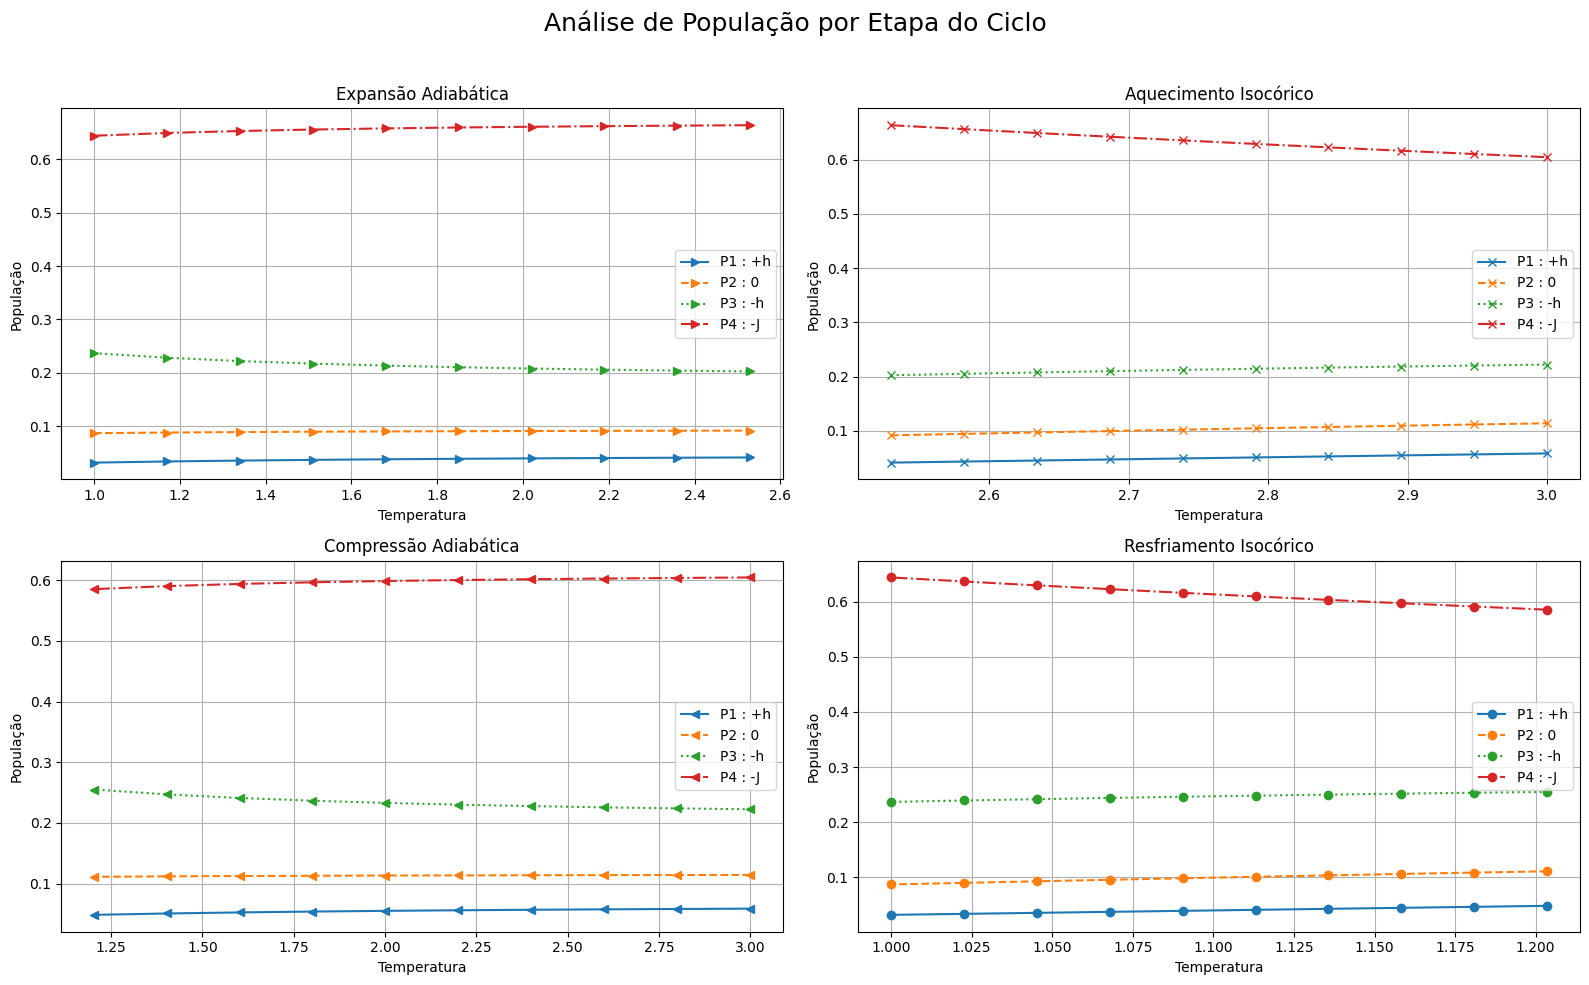

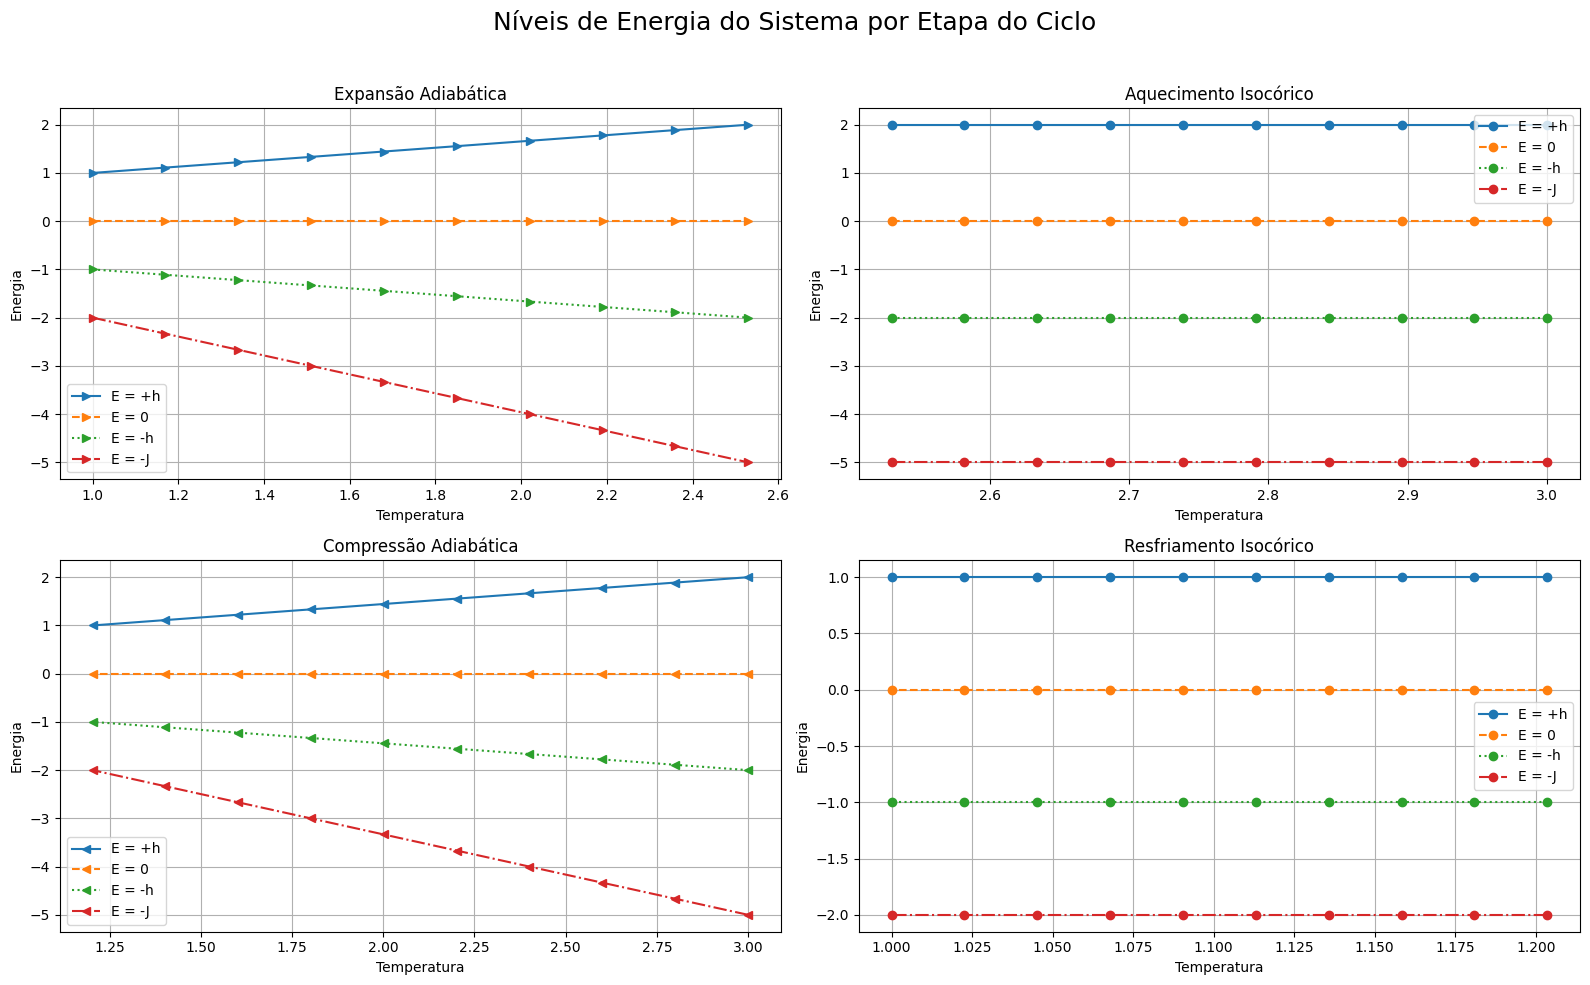

In [7]:
Ji = 2; Jf= 5; hi = 1; hf = 2; Tc=1; Th=3; PASSOS = 10
# Chamando a função para calcular os valores das funções e populações
# Função retorna:
[J_values_i, h_values_i,
    J_values_f, h_values_f,
    valores,
    Exp_add_values,
    populacoes_Exp_ADD,
    Aqu_ISO_values,
    populacoes_Aqu_ISO,
    Com_ADD_values,
    populacoes_Com_ADD,
    Res_ISO_values,
    populacoes_Res_ISO,
    Win, Wout, Qin, Qout, eff] = functions_values(Ji, Jf, hi, hf, Tc, Th, PASSOS)

## Desempacotando os valores retornados
Tc_add, T_values_i, T_cooling_values, Th_add, T_values_f, T_heating_values = valores

plot_populacoes_separadas(T_values_i, T_values_f, T_cooling_values, T_heating_values, populacoes_Exp_ADD, populacoes_Aqu_ISO, populacoes_Com_ADD, populacoes_Res_ISO)
plot_niveis_energia(T_values_i, T_values_f, T_cooling_values, T_heating_values,
                        h_values_i, J_values_i,
                        h_values_f, J_values_f,
                        Ji, Jf, hi, hf)




-----------------------

Funções x h:  ##Funções inclui Energia Livre, Energia Media, Entropia, Magnetização e Susceptibilidade

In [8]:
def plot_magnetizacao_ciclo(
    # Dados da Expansão Adiabática
    T_values_i, h_values_i, J_values_i, M_values_Exp_ADD,
    # Dados do Aquecimento Isocórico (hf, Jf são constantes)
    T_heating_values, hf_const, Jf_const, M_values_hot_ISO,
    # Dados da Compressão Adiabática
    T_values_f, h_values_f, J_values_f, M_values_Com_ADD,
    # Dados do Resfriamento Isocórico (hi, Ji são constantes)
    T_cooling_values, hi_const, Ji_const, M_values_cold_ISO
):

    hf_const = np.linspace(hf_const, hf_const, len(T_heating_values))
    Jf_const = np.linspace(Jf_const, Jf_const, len(T_heating_values))
    hi_const = np.linspace(hi_const, hi_const, len(T_cooling_values))
    Ji_const = np.linspace(Ji_const, Ji_const, len(T_cooling_values))
    # ==================================================================
    # --- PREPARAÇÃO DOS DADOS ---
    # Cria arrays para os valores constantes dos processos isocóricos
    # para que possam ser usados nos eixos X.

    # ==================================================================
    # GRÁFICO 1: Magnetização vs. TEMPERATURA
    # ==================================================================
    fig_T, ax_T = plt.subplots(2, 2, figsize=(16, 11))
    fig_T.suptitle('Magnetização (M) vs. Temperatura (T) por Processo', fontsize=18)

    # Expansão Adiabática
    ax_T[0, 0].plot(T_values_i, M_values_Exp_ADD, '>-')
    ax_T[0, 0].set_title('Expansão Adiabática')
    
    # Aquecimento Isocórico
    ax_T[0, 1].plot(T_heating_values, M_values_hot_ISO, 'o-')
    ax_T[0, 1].set_title('Aquecimento Isocórico')
    
    # Compressão Adiabática
    ax_T[1, 0].plot(T_values_f, M_values_Com_ADD, '<-')
    ax_T[1, 0].set_title('Compressão Adiabática')
    
    # Resfriamento Isocórico
    ax_T[1, 1].plot(T_cooling_values, M_values_cold_ISO, 'o-')
    ax_T[1, 1].set_title('Resfriamento Isocórico')

    for ax in ax_T.flat:
        ax.set_xlabel('Temperatura (T)')
        ax.set_ylabel('Magnetização (M)')
        ax.grid(True)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # ==================================================================
    # GRÁFICO 2: Magnetização vs. CAMPO (h)
    # ==================================================================
    fig_h, ax_h = plt.subplots(2, 2, figsize=(16, 11))
    fig_h.suptitle('Magnetização (M) vs. Campo (h) por Processo', fontsize=18)

    ax_h[0, 0].plot(h_values_i, M_values_Exp_ADD, '>-')
    ax_h[0, 0].set_title('Expansão Adiabática')
    
    ax_h[0, 1].plot(hf_const, M_values_hot_ISO, 'o-')
    ax_h[0, 1].set_title('Aquecimento Isocórico')
    
    ax_h[1, 0].plot(h_values_f, M_values_Com_ADD, '>-')
    ax_h[1, 0].set_title('Compressão Adiabática')
    
    ax_h[1, 1].plot(hi_const, M_values_cold_ISO, 'o-')
    ax_h[1, 1].set_title('Resfriamento Isocórico')

    for ax in ax_h.flat:
        ax.set_xlabel('Campo (h)')
        ax.set_ylabel('Magnetização (M)')
        ax.grid(True)
        
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # ==================================================================
    # GRÁFICO 3: Magnetização vs. ACOPLAMENTO (J)
    # ==================================================================
    fig_J, ax_J = plt.subplots(2, 2, figsize=(16, 11))
    fig_J.suptitle('Magnetização (M) vs. Acoplamento (J) por Processo', fontsize=18)

    ax_J[0, 0].plot(J_values_i, M_values_Exp_ADD, '>-')
    ax_J[0, 0].set_title('Expansão Adiabática')
    
    ax_J[0, 1].plot(Jf_const, M_values_hot_ISO, 'o-')
    ax_J[0, 1].set_title('Aquecimento Isocórico')
    
    ax_J[1, 0].plot(J_values_f, M_values_Com_ADD, '<-')
    ax_J[1, 0].set_title('Compressão Adiabática')
    
    ax_J[1, 1].plot(Ji_const, M_values_cold_ISO, 'o-')
    ax_J[1, 1].set_title('Resfriamento Isocórico')

    for ax in ax_J.flat:
        ax.set_xlabel('Acoplamento (J)')
        ax.set_ylabel('Magnetização (M)')
        ax.grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()



def plot_entropia_ciclo(
    # Dados da Expansão Adiabática
    T_values_i, h_values_i, J_values_i, S_values_Exp_ADD,
    # Dados do Aquecimento Isocórico (hf, Jf são constantes)
    T_heating_values, hf_const, Jf_const, S_values_hot_ISO,
    # Dados da Compressão Adiabática
    T_values_f, h_values_f, J_values_f, S_values_Com_ADD,
    # Dados do Resfriamento Isocórico (hi, Ji são constantes)
    T_cooling_values, hi_const, Ji_const, S_values_cold_ISO
):

    hf_const = np.linspace(hf_const, hf_const, len(T_heating_values))
    Jf_const = np.linspace(Jf_const, Jf_const, len(T_heating_values))
    hi_const = np.linspace(hi_const, hi_const, len(T_cooling_values))
    Ji_const = np.linspace(Ji_const, Ji_const, len(T_cooling_values))


    # ==================================================================
    # GRÁFICO 1: Entropia vs. TEMPERATURA
    # ==================================================================
    fig_T, ax_T = plt.subplots(2, 2, figsize=(16, 11))
    fig_T.suptitle('Entropia (S) vs. Temperatura (T) por Processo', fontsize=18)

    ax_T[0, 0].plot(T_values_i, S_values_Exp_ADD, '>-')
    ax_T[0, 0].set_title('Expansão Adiabática')
    ax_T[0, 1].plot(T_heating_values, S_values_hot_ISO, 'o-')
    ax_T[0, 1].set_title('Aquecimento Isocórico')
    ax_T[1, 0].plot(T_values_f, S_values_Com_ADD, '<-')
    ax_T[1, 0].set_title('Compressão Adiabática')
    ax_T[1, 1].plot(T_cooling_values, S_values_cold_ISO, 'o-')
    ax_T[1, 1].set_title('Resfriamento Isocórico')

    for ax in ax_T.flat:
        ax.set_xlabel('Temperatura (T)')
        ax.set_ylabel('Entropia (S)')
        ax.grid(True)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # ==================================================================
    # GRÁFICO 2: Entropia vs. CAMPO (h)
    # ==================================================================
    fig_h, ax_h = plt.subplots(2, 2, figsize=(16, 11))
    fig_h.suptitle('Entropia (S) vs. Campo (h) por Processo', fontsize=18)

    ax_h[0, 0].plot(h_values_i, S_values_Exp_ADD, '>-')
    ax_h[0, 0].set_title('Expansão Adiabática')
    ax_h[0, 1].plot(hf_const, S_values_hot_ISO, 'o-')
    ax_h[0, 1].set_title('Aquecimento Isocórico')
    ax_h[1, 0].plot(h_values_f, S_values_Com_ADD, '<-')
    ax_h[1, 0].set_title('Compressão Adiabática')
    ax_h[1, 1].plot(hi_const, S_values_cold_ISO, 'o-')
    ax_h[1, 1].set_title('Resfriamento Isocórico')

    for ax in ax_h.flat:
        ax.set_xlabel('Campo (h)')
        ax.set_ylabel('Entropia (S)')
        ax.grid(True)
        
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # ==================================================================
    # GRÁFICO 3: Entropia vs. ACOPLAMENTO (J)
    # ==================================================================
    fig_J, ax_J = plt.subplots(2, 2, figsize=(16, 11))
    fig_J.suptitle('Entropia (S) vs. Acoplamento (J) por Processo', fontsize=18)

    ax_J[0, 0].plot(J_values_i, S_values_Exp_ADD, '>-')
    ax_J[0, 0].set_title('Expansão Adiabática')
    ax_J[0, 1].plot(Jf_const, S_values_hot_ISO, 'o-')
    ax_J[0, 1].set_title('Aquecimento Isocórico')
    ax_J[1, 0].plot(J_values_f, S_values_Com_ADD, '<-')
    ax_J[1, 0].set_title('Compressão Adiabática')
    ax_J[1, 1].plot(Ji_const, S_values_cold_ISO, 'o-')
    ax_J[1, 1].set_title('Resfriamento Isocórico')

    for ax in ax_J.flat:
        ax.set_xlabel('Acoplamento (J)')
        ax.set_ylabel('Entropia (S)')
        ax.grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

In [179]:
def plot_analise_processo(
    titulo_processo,
    T_data,
    h_data,
    J_data,
    M_data,
    S_data,
    marker_style
):
    # Cria uma grade de 2x3 para os 6 gráficos
    fig, ax = plt.subplots(2, 3, figsize=(22, 10))
    fig.suptitle(f'Análise Completa: {titulo_processo}', fontsize=20)

    # --- Linha de Cima: MAGNETIZAÇÃO ---
    
    # M vs T
    ax[0, 0].plot(T_data, M_data, marker_style)
    ax[0, 0].set_title('Magnetização vs. Temperatura')
    ax[0, 0].set_xlabel('Temperatura (T)')
    ax[0, 0].set_ylabel('Magnetização (M)')
    
    # M vs h
    ax[0, 1].plot(h_data, M_data, marker_style)
    ax[0, 1].set_title('Magnetização vs. Campo')
    ax[0, 1].set_xlabel('Campo (h)')
    ax[0, 1].set_ylabel('Magnetização (M)')
    
    # M vs J
    ax[0, 2].plot(J_data, M_data, marker_style)
    ax[0, 2].set_title('Magnetização vs. Acoplamento')
    ax[0, 2].set_xlabel('Acoplamento (J)')
    ax[0, 2].set_ylabel('Magnetização (M)')

    # --- Linha de Baixo: ENTROPIA ---
    
    # S vs T
    ax[1, 0].plot(T_data, S_data, marker_style)
    ax[1, 0].set_title('Entropia vs. Temperatura')
    ax[1, 0].set_xlabel('Temperatura (T)')
    ax[1, 0].set_ylabel('Entropia (S)')
    
    # S vs h
    ax[1, 1].plot(h_data, S_data, marker_style)
    ax[1, 1].set_title('Entropia vs. Campo')
    ax[1, 1].set_xlabel('Campo (h)')
    ax[1, 1].set_ylabel('Entropia (S)')
    
    # S vs J
    ax[1, 2].plot(J_data, S_data, marker_style)
    ax[1, 2].set_title('Entropia vs. Acoplamento')
    ax[1, 2].set_xlabel('Acoplamento (J)')
    ax[1, 2].set_ylabel('Entropia (S)')
    
    # Aplica grade em todos os gráficos
    for subplot in ax.flat:
        subplot.grid(True)
        
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

In [180]:
def plot_analise_processo_simples(
    titulo_processo,
    T_data,
    h_data,
    J_data,
    M_data,
    S_data,
    marker_style
    ):

    
    # Cria uma grade de 1x2 para os 6 gráficos
    fig, ax = plt.subplots(1, 2, figsize=(15.4, 7))
    fig.suptitle(f'Análise Completa: {titulo_processo}', fontsize=20)

    # --- Linha de Cima: MAGNETIZAÇÃO ---
    
    # M vs T
    ax[0].plot(T_data, M_data, marker_style)
    ax[0].set_title('Magnetização vs. Temperatura')
    ax[0].set_xlabel('Temperatura (T)')
    ax[0].set_ylabel('Magnetização (M)')
    

    # --- Linha de Baixo: ENTROPIA ---    
    # S vs T
    ax[1].plot(T_data, S_data, marker_style)
    ax[1].set_title('Entropia vs. Temperatura')
    ax[1].set_xlabel('Temperatura (T)')
    ax[1].set_ylabel('Entropia (S)')
    
    # Aplica grade em todos os gráficos
    for subplot in ax.flat:
        subplot.grid(True)
        
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

Temperatures Range:
1 -> 2 (Tc -> Tc_add): Tc: 1, Tc_add: [2.52958085]
2 -> 3 (T_heating): Tc_add: [2.52958085] Th: 3
3 -> 4 (Th -> Th_add): Th: 3, Th_add: [1.20357409]
4 -> 1 (T_cooling): Th_add: [1.20357409], Tc: 1


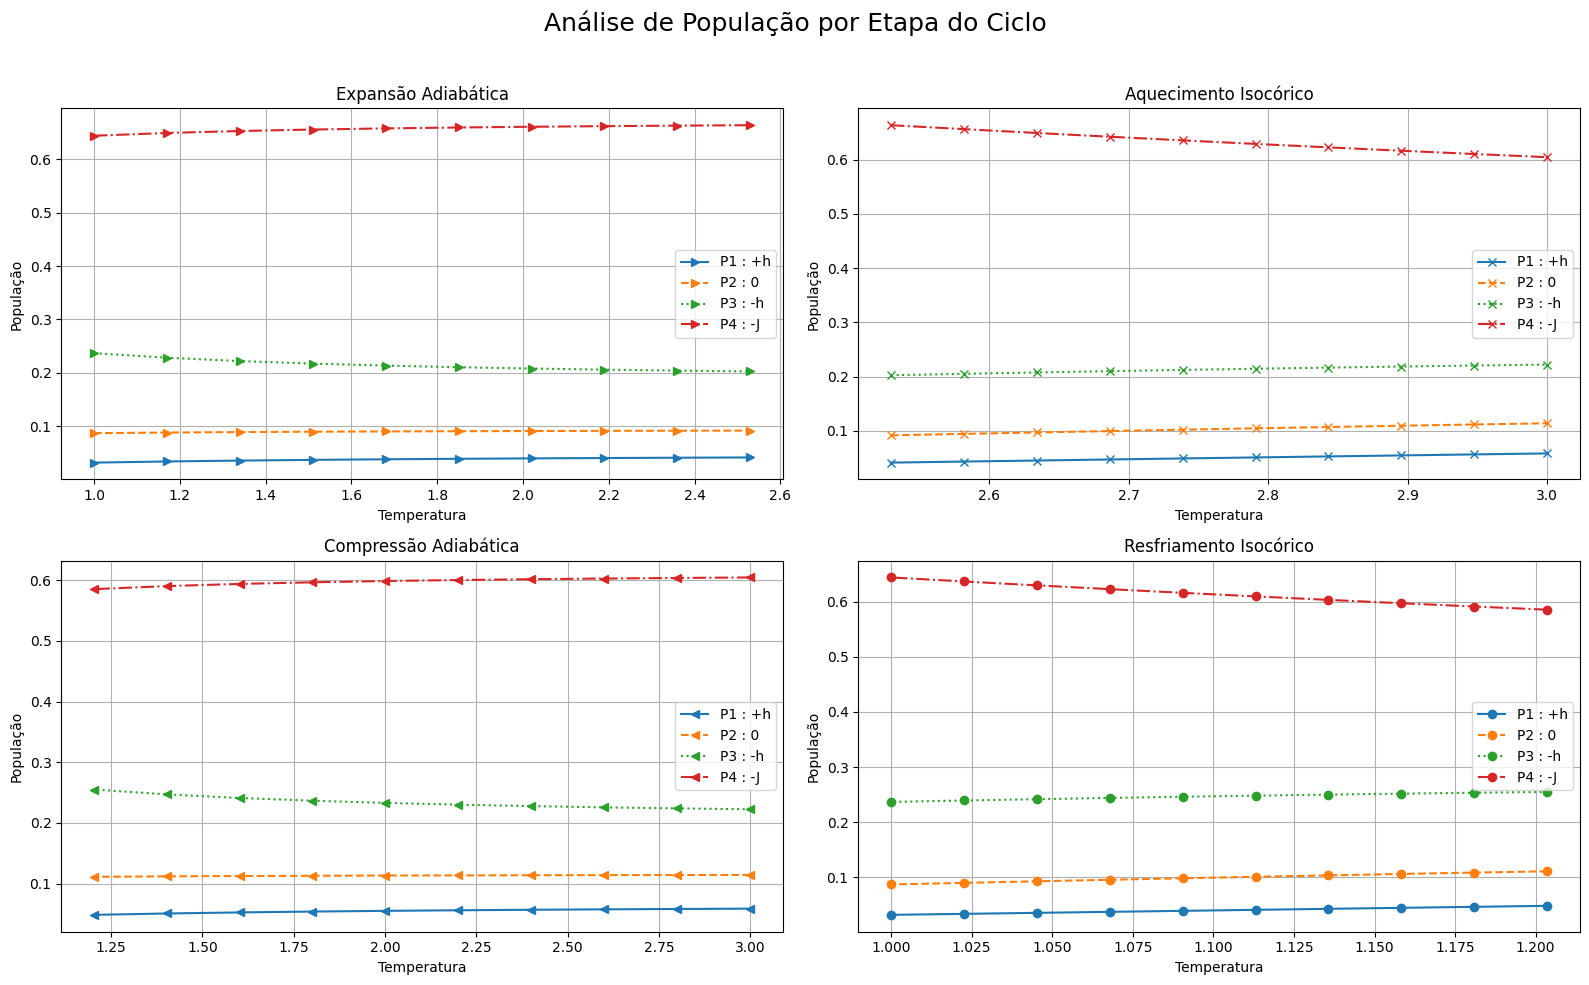

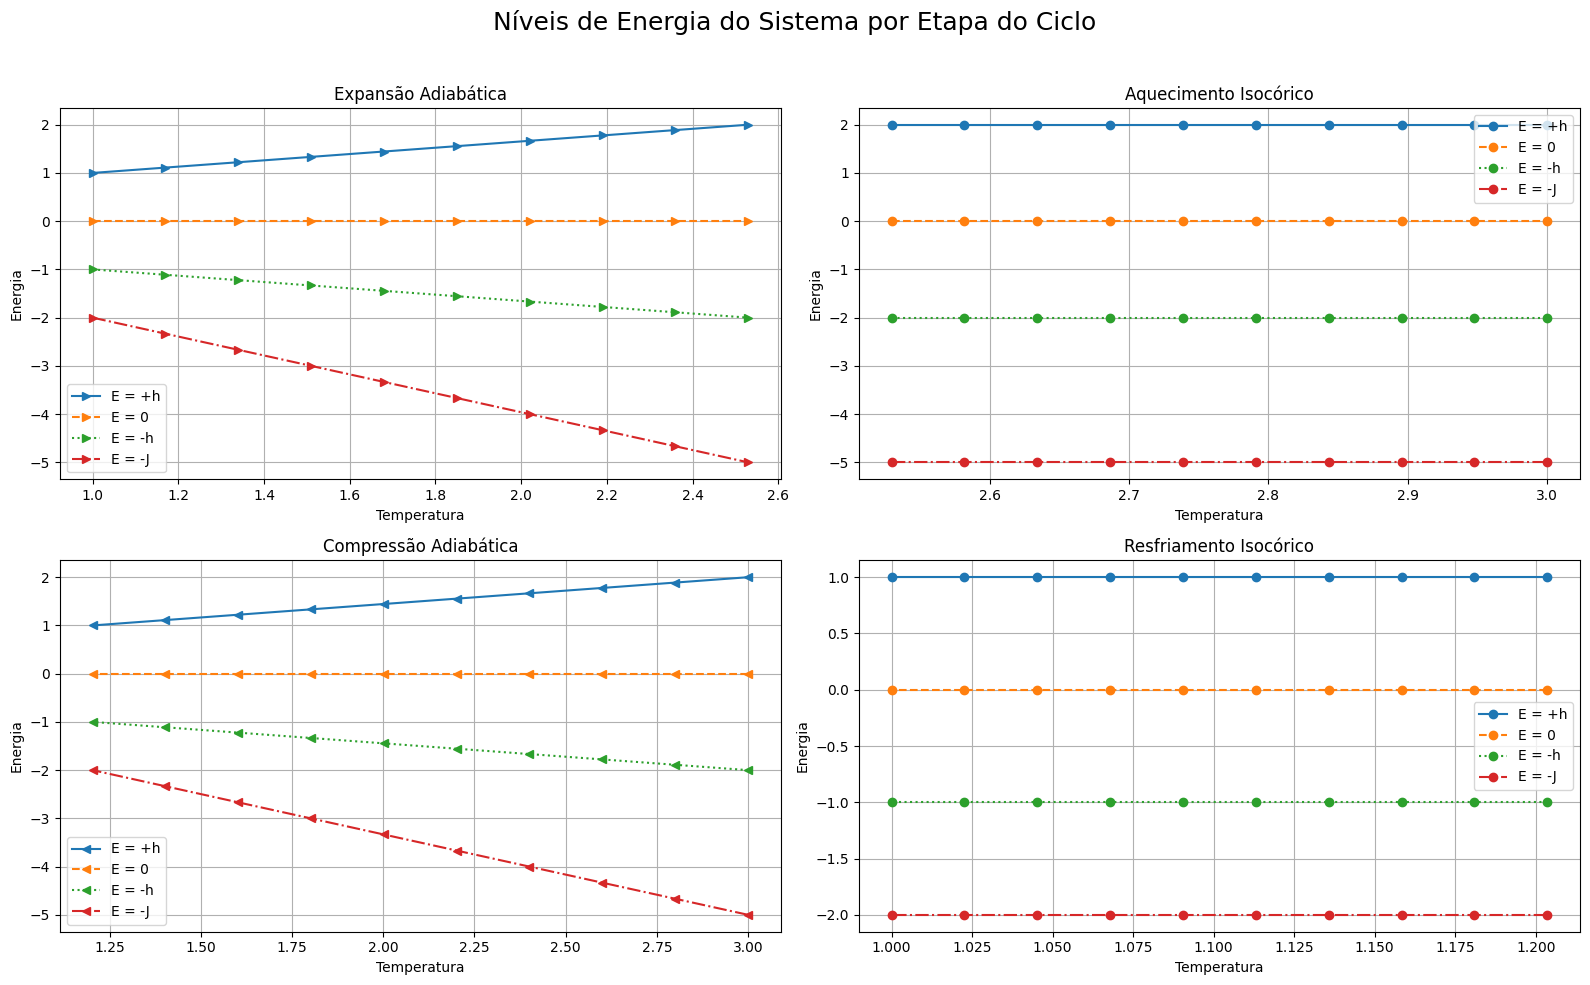

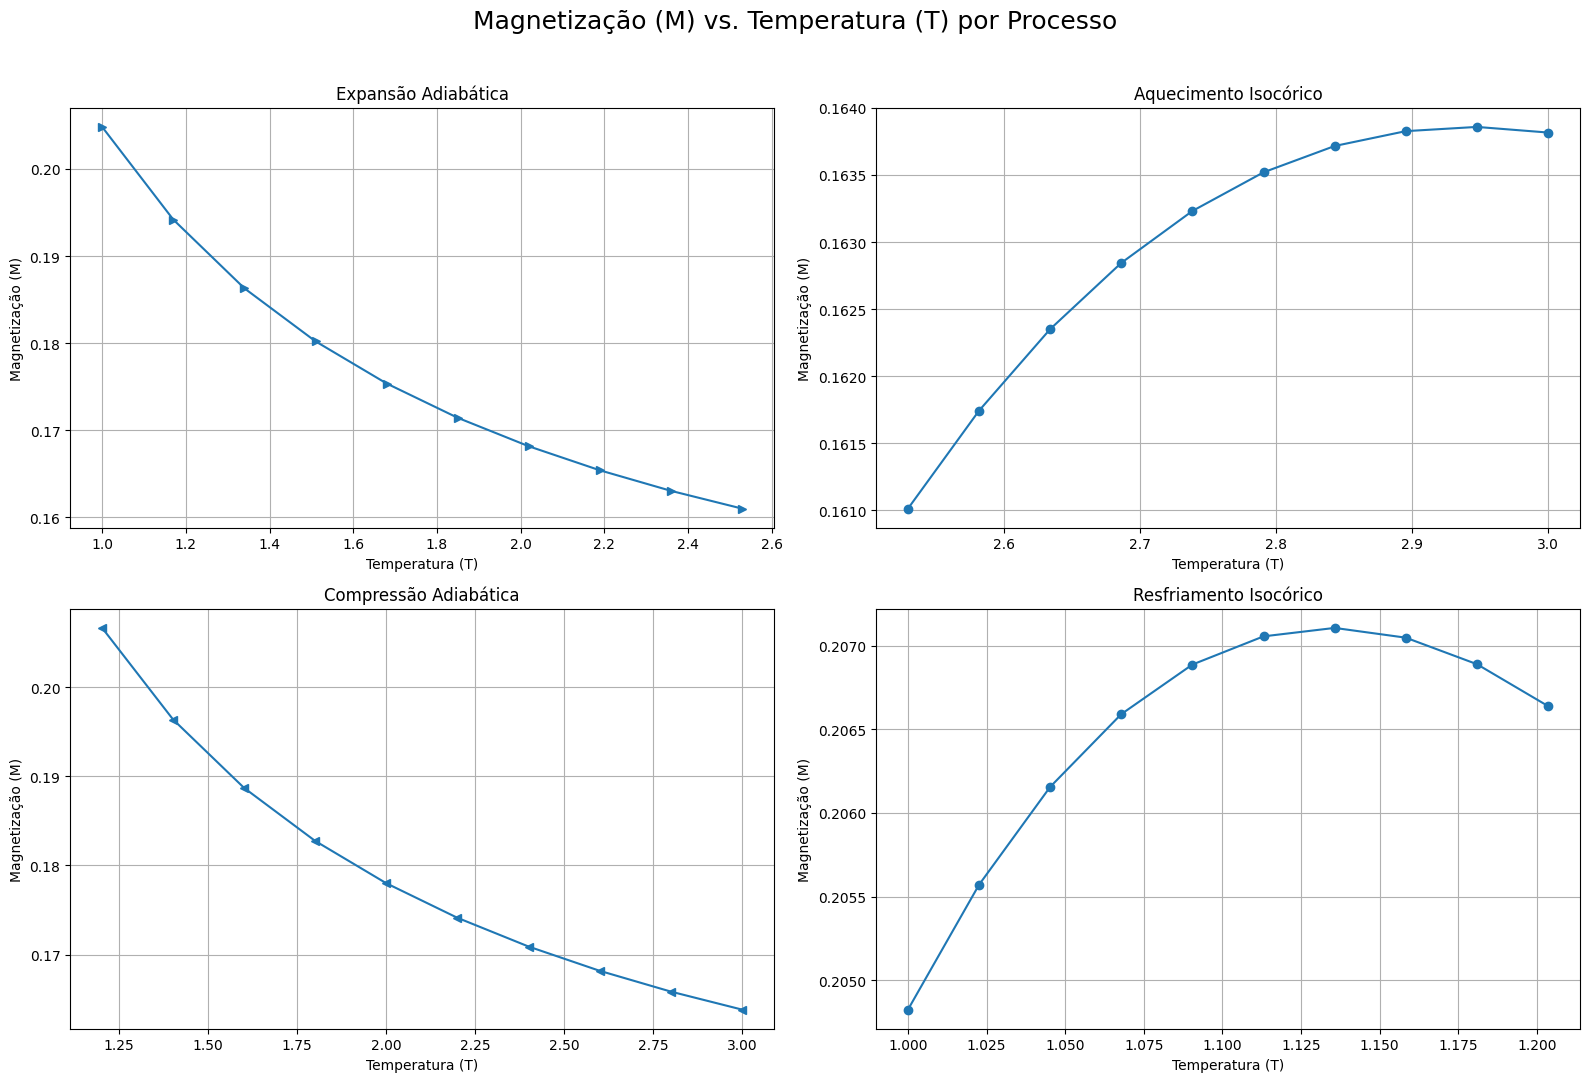

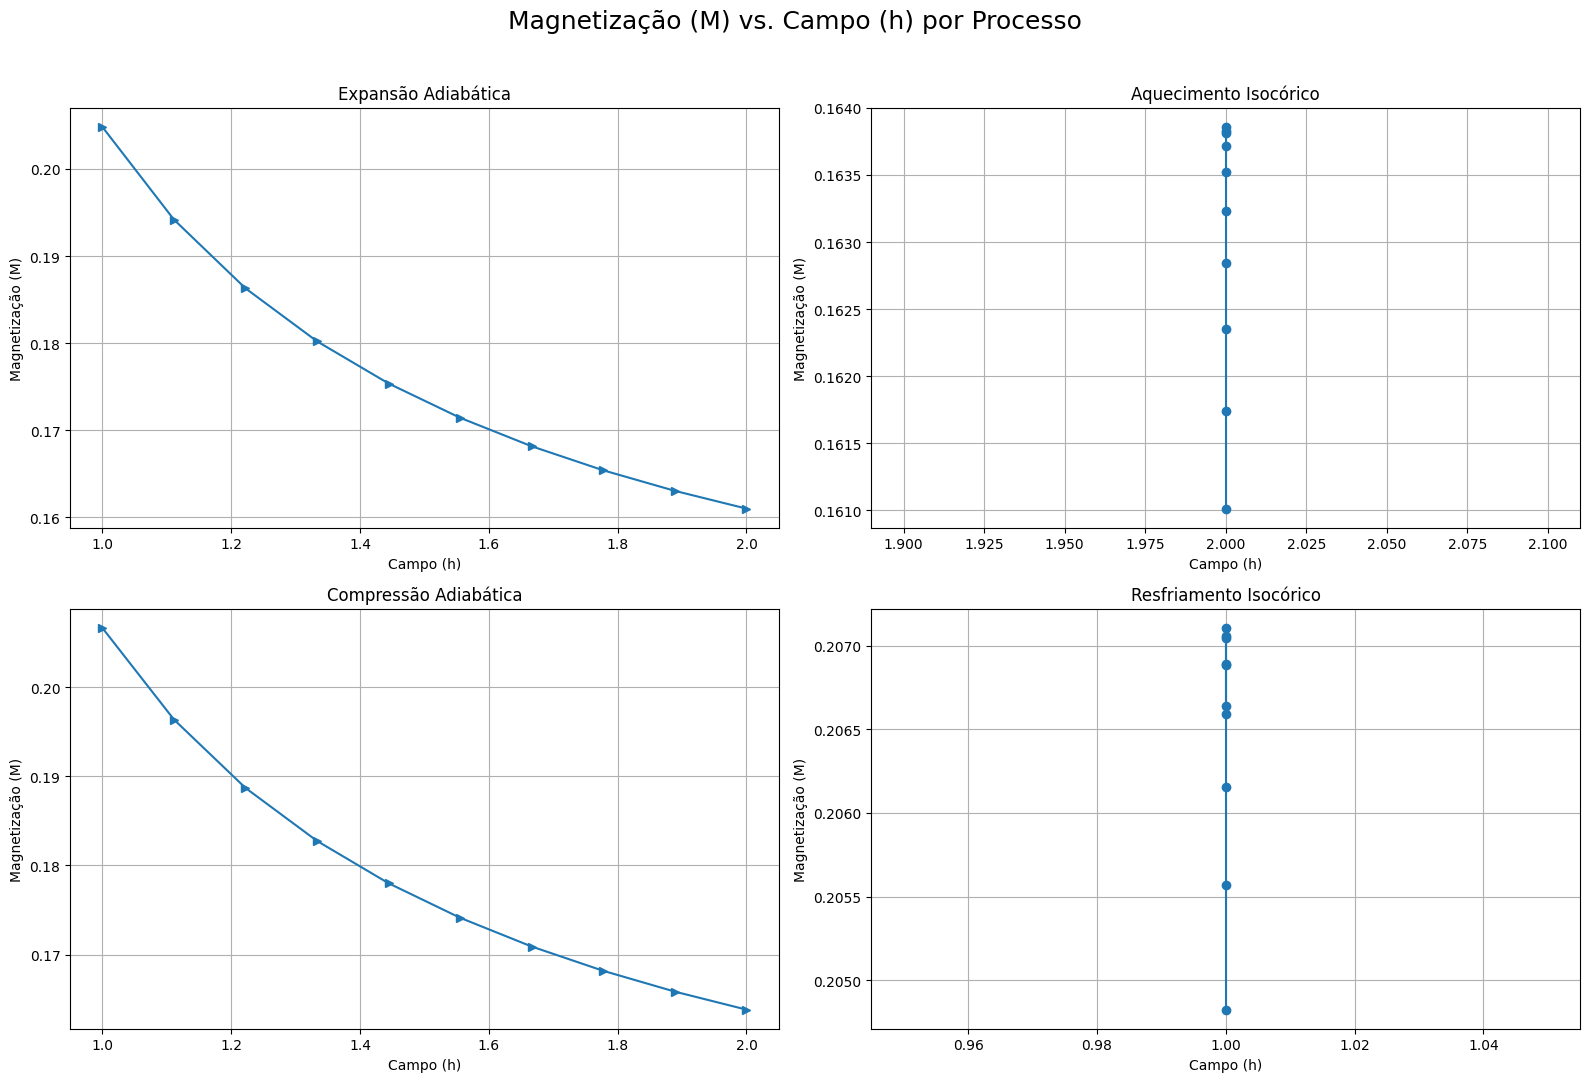

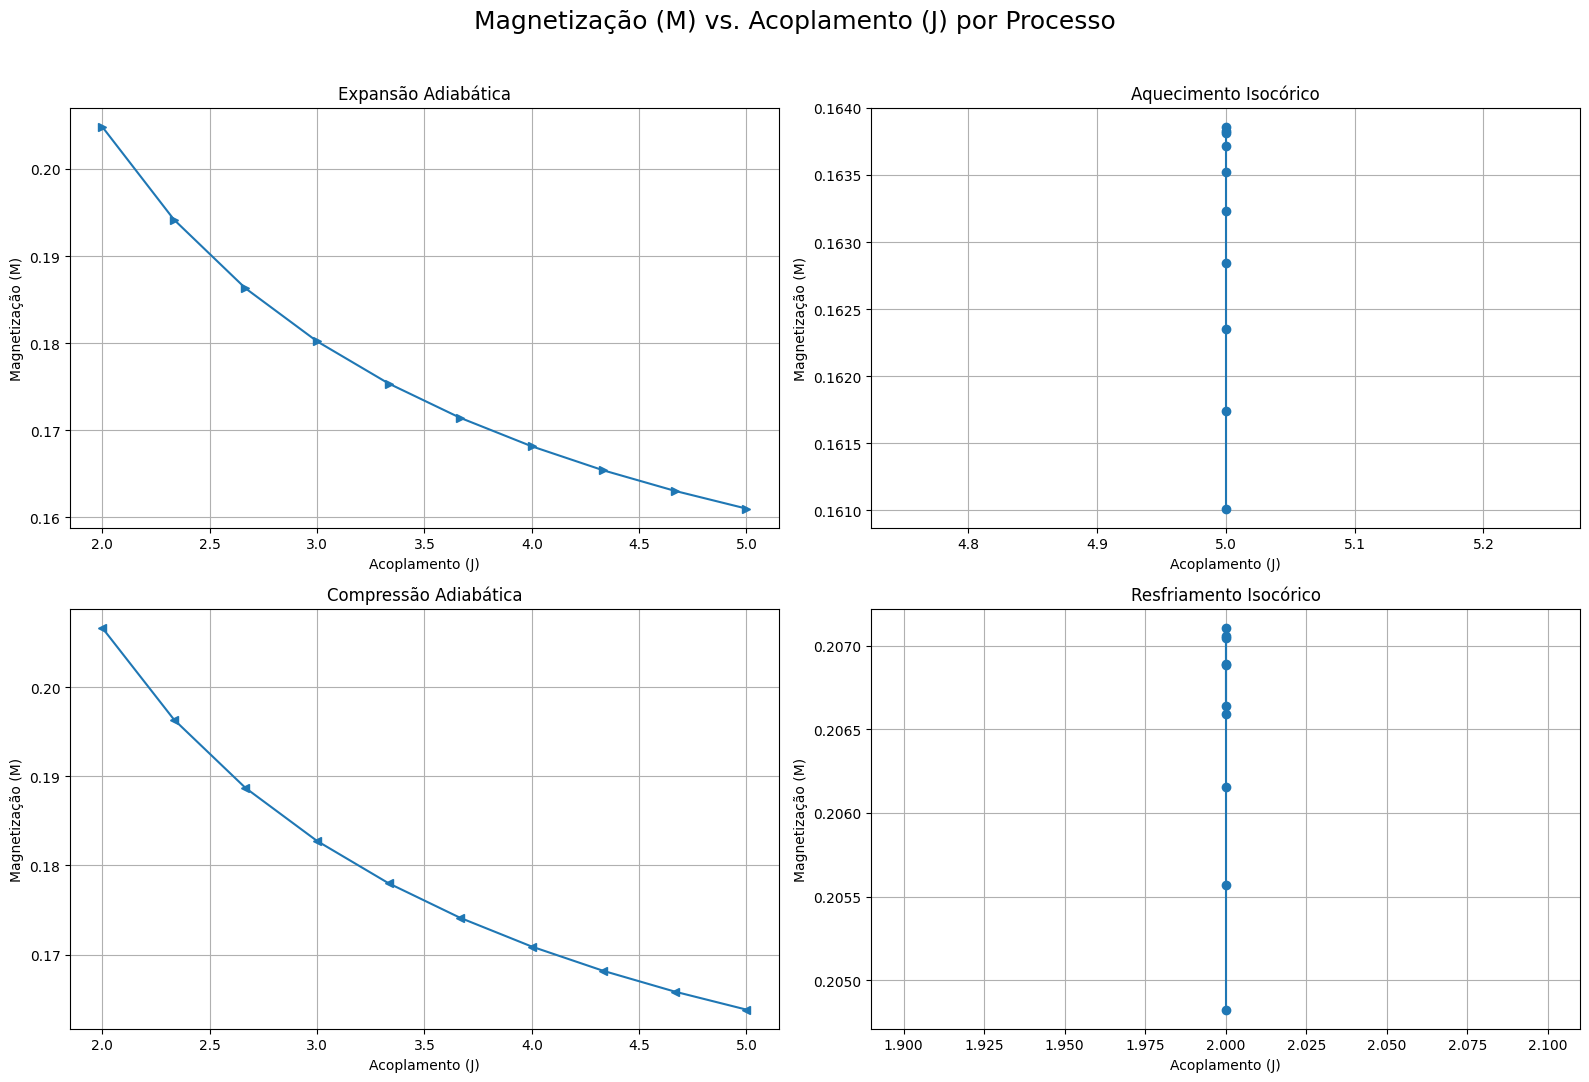

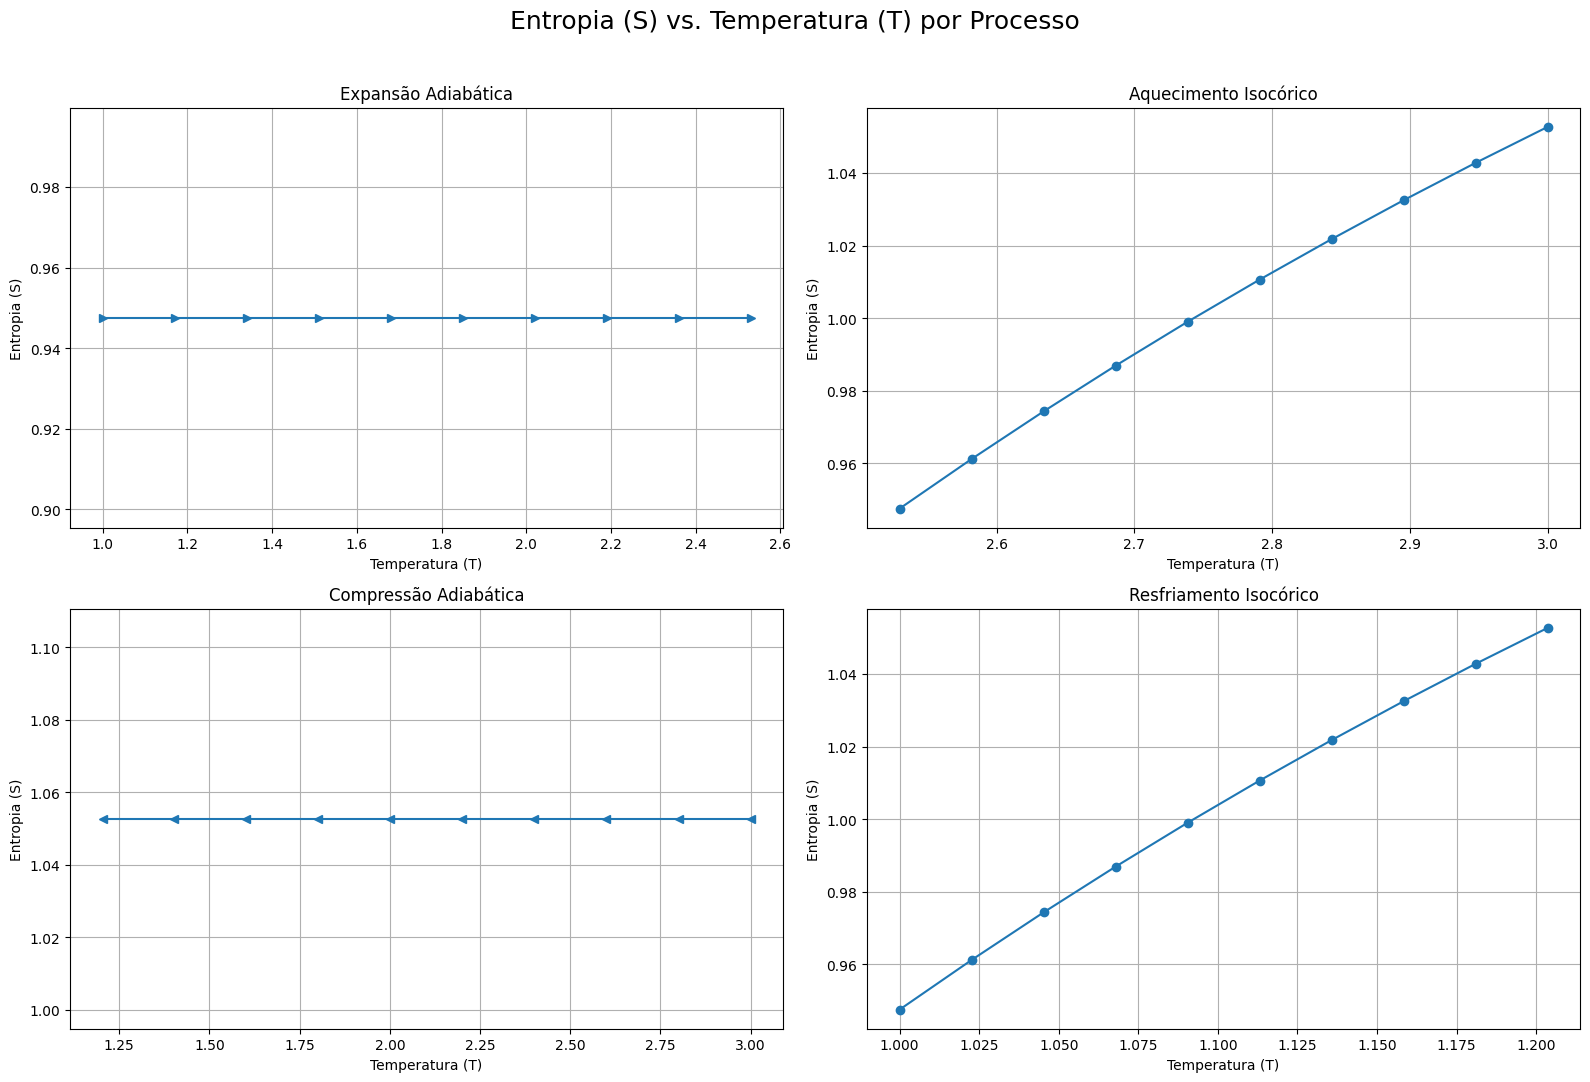

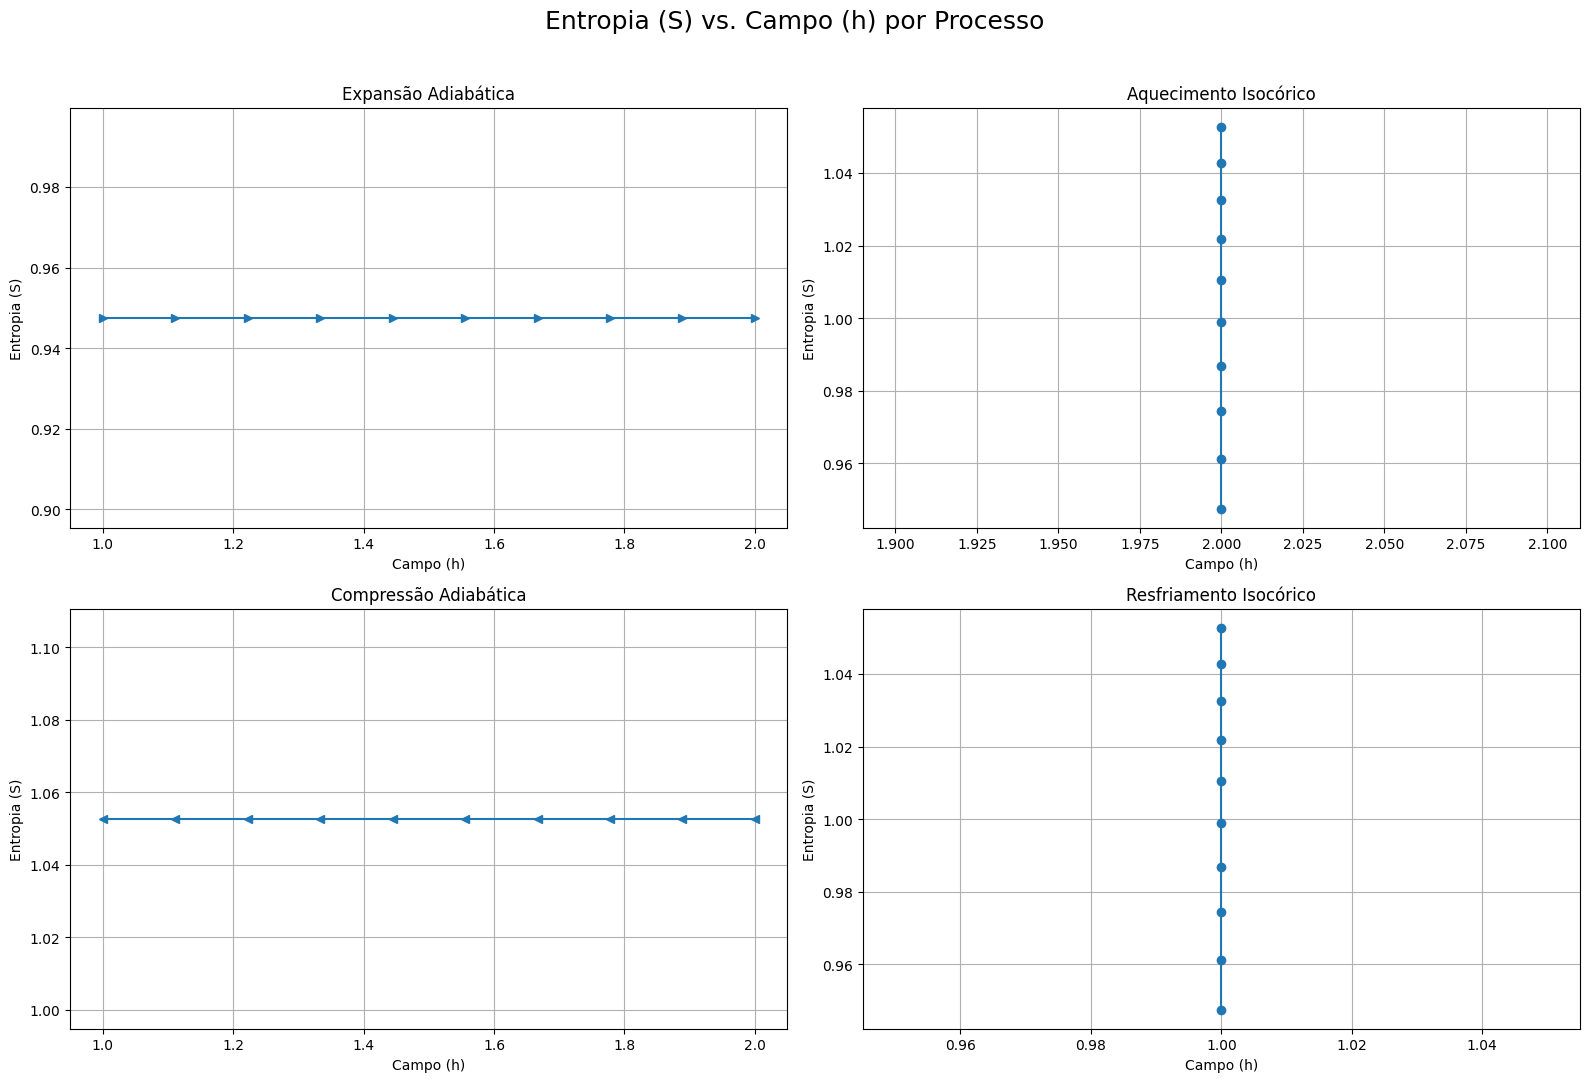

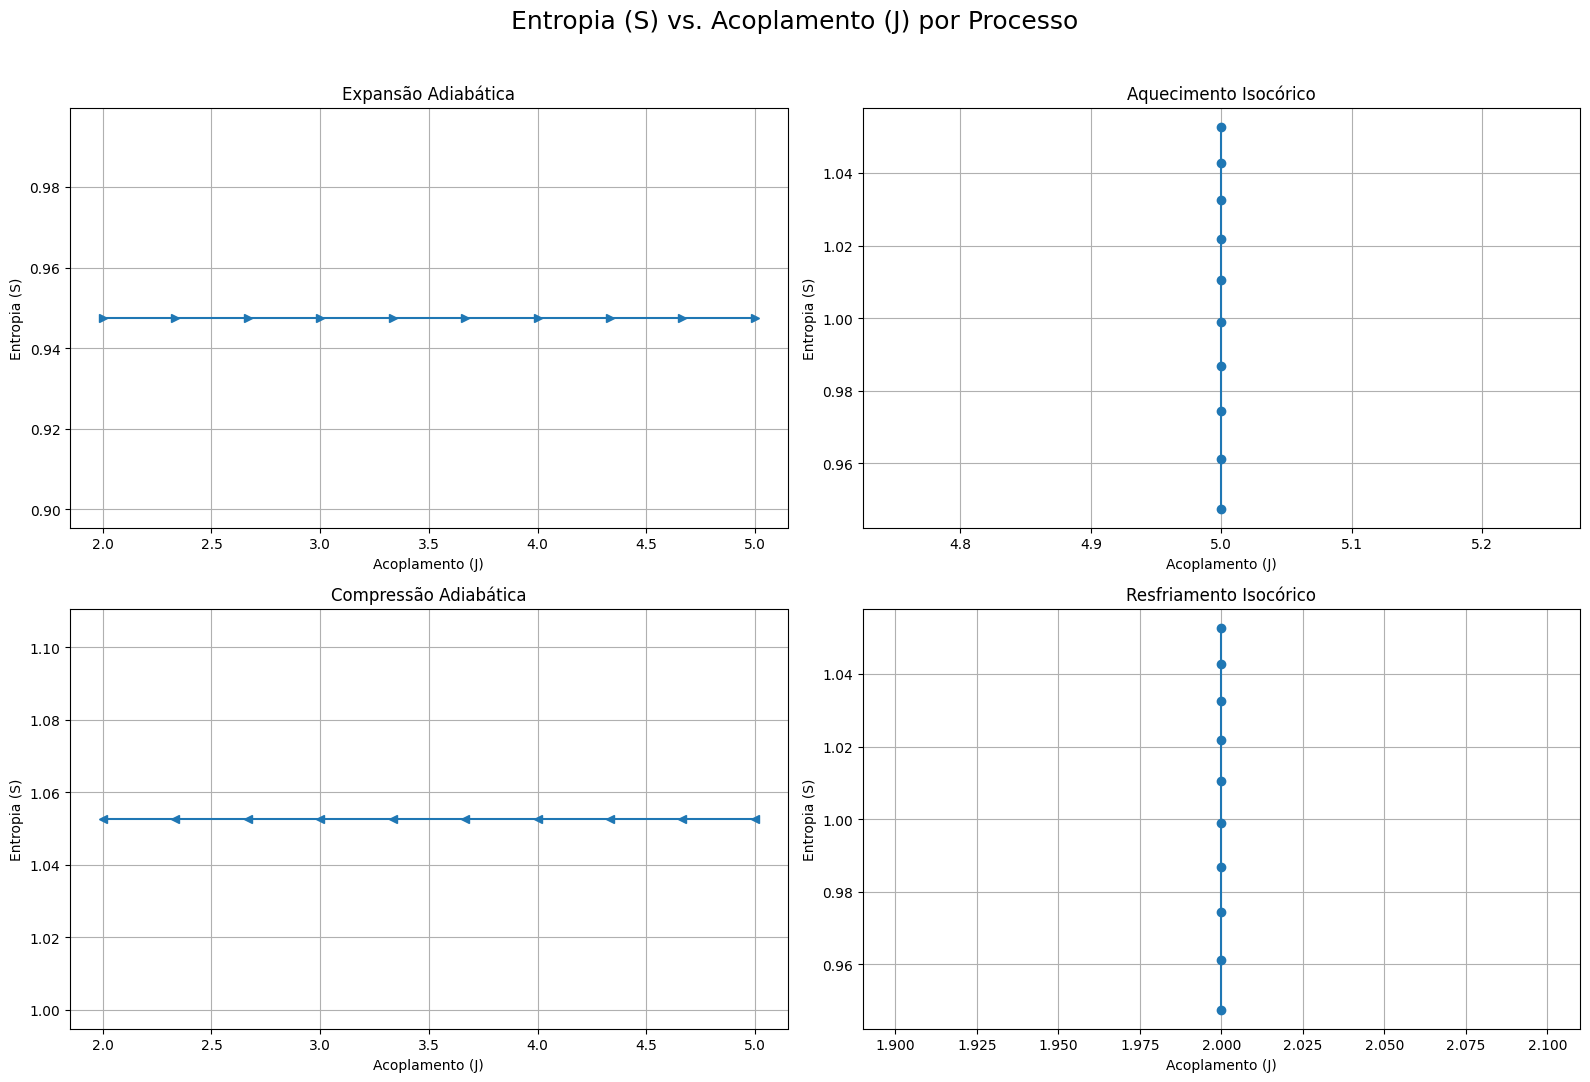

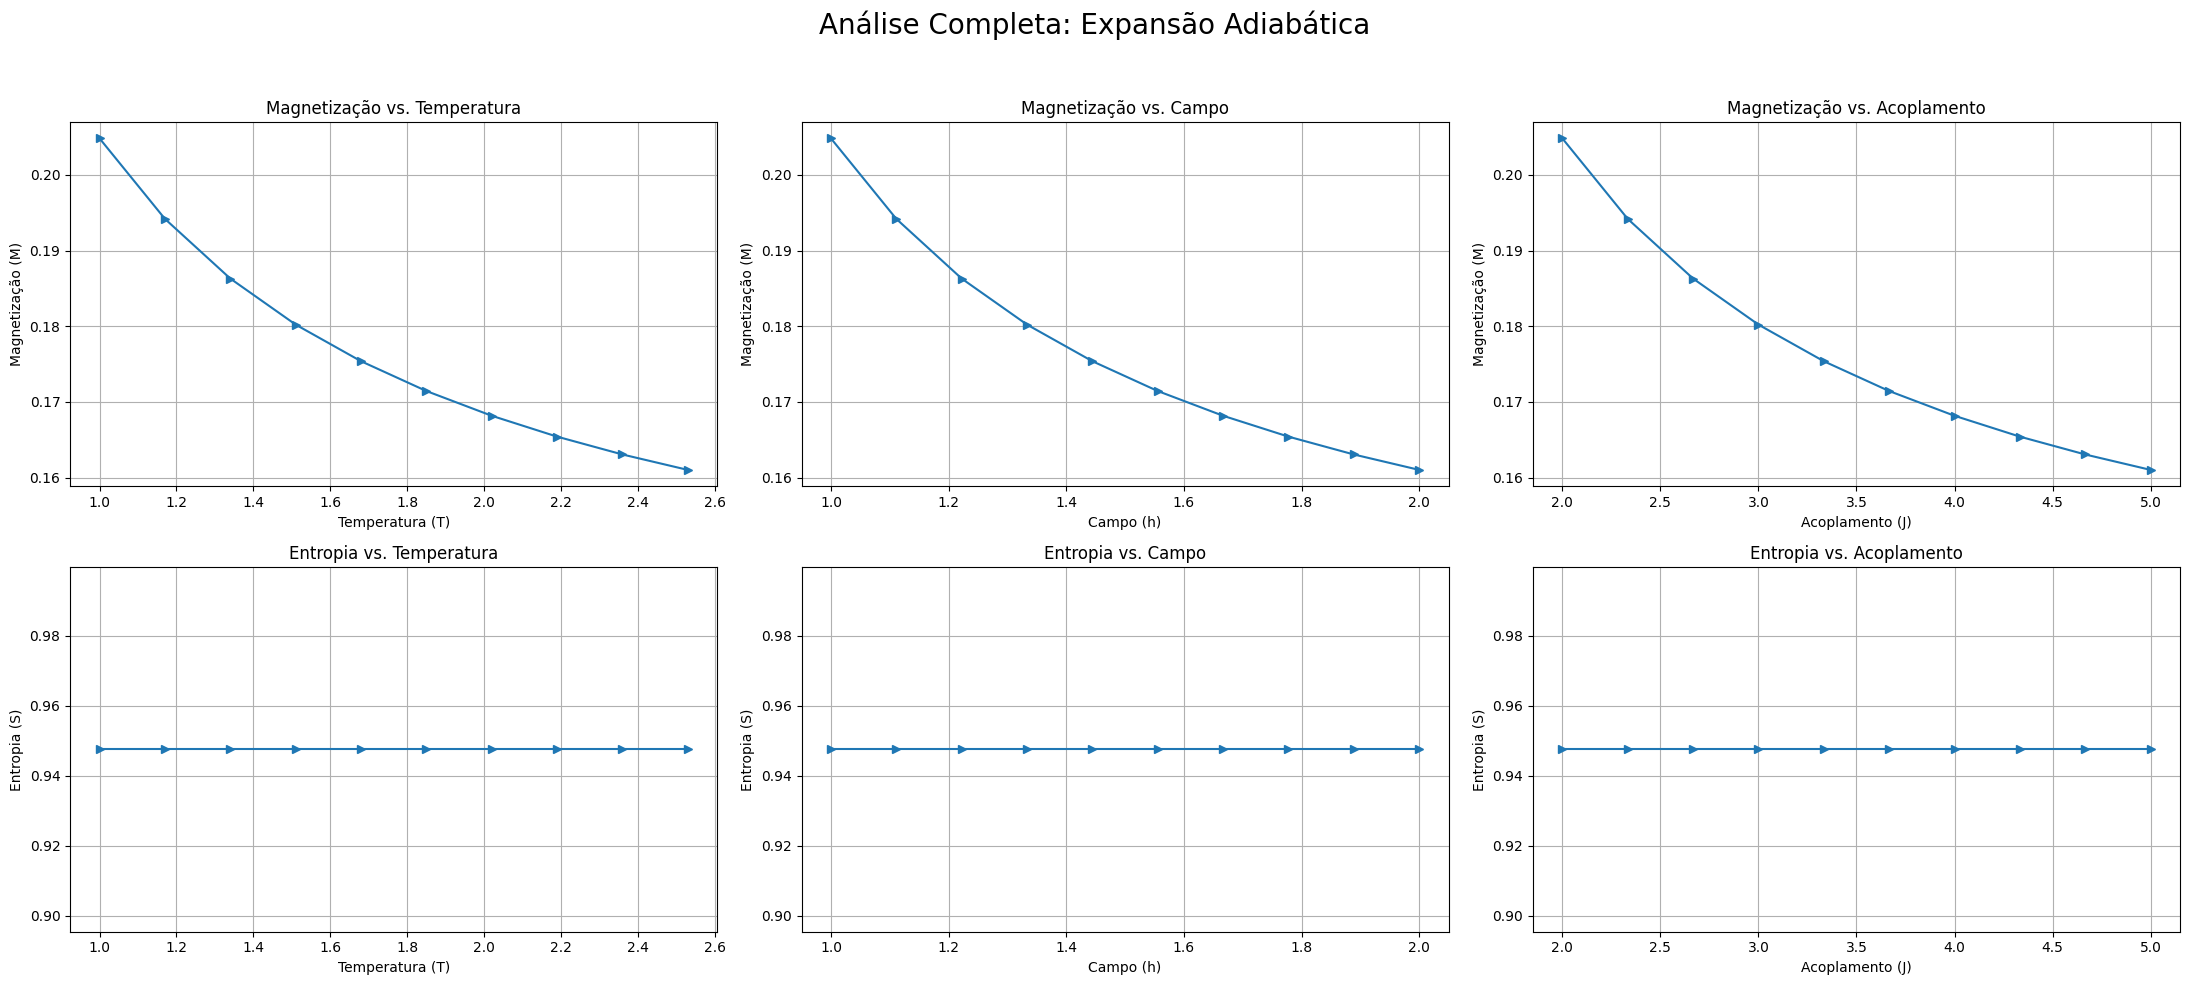

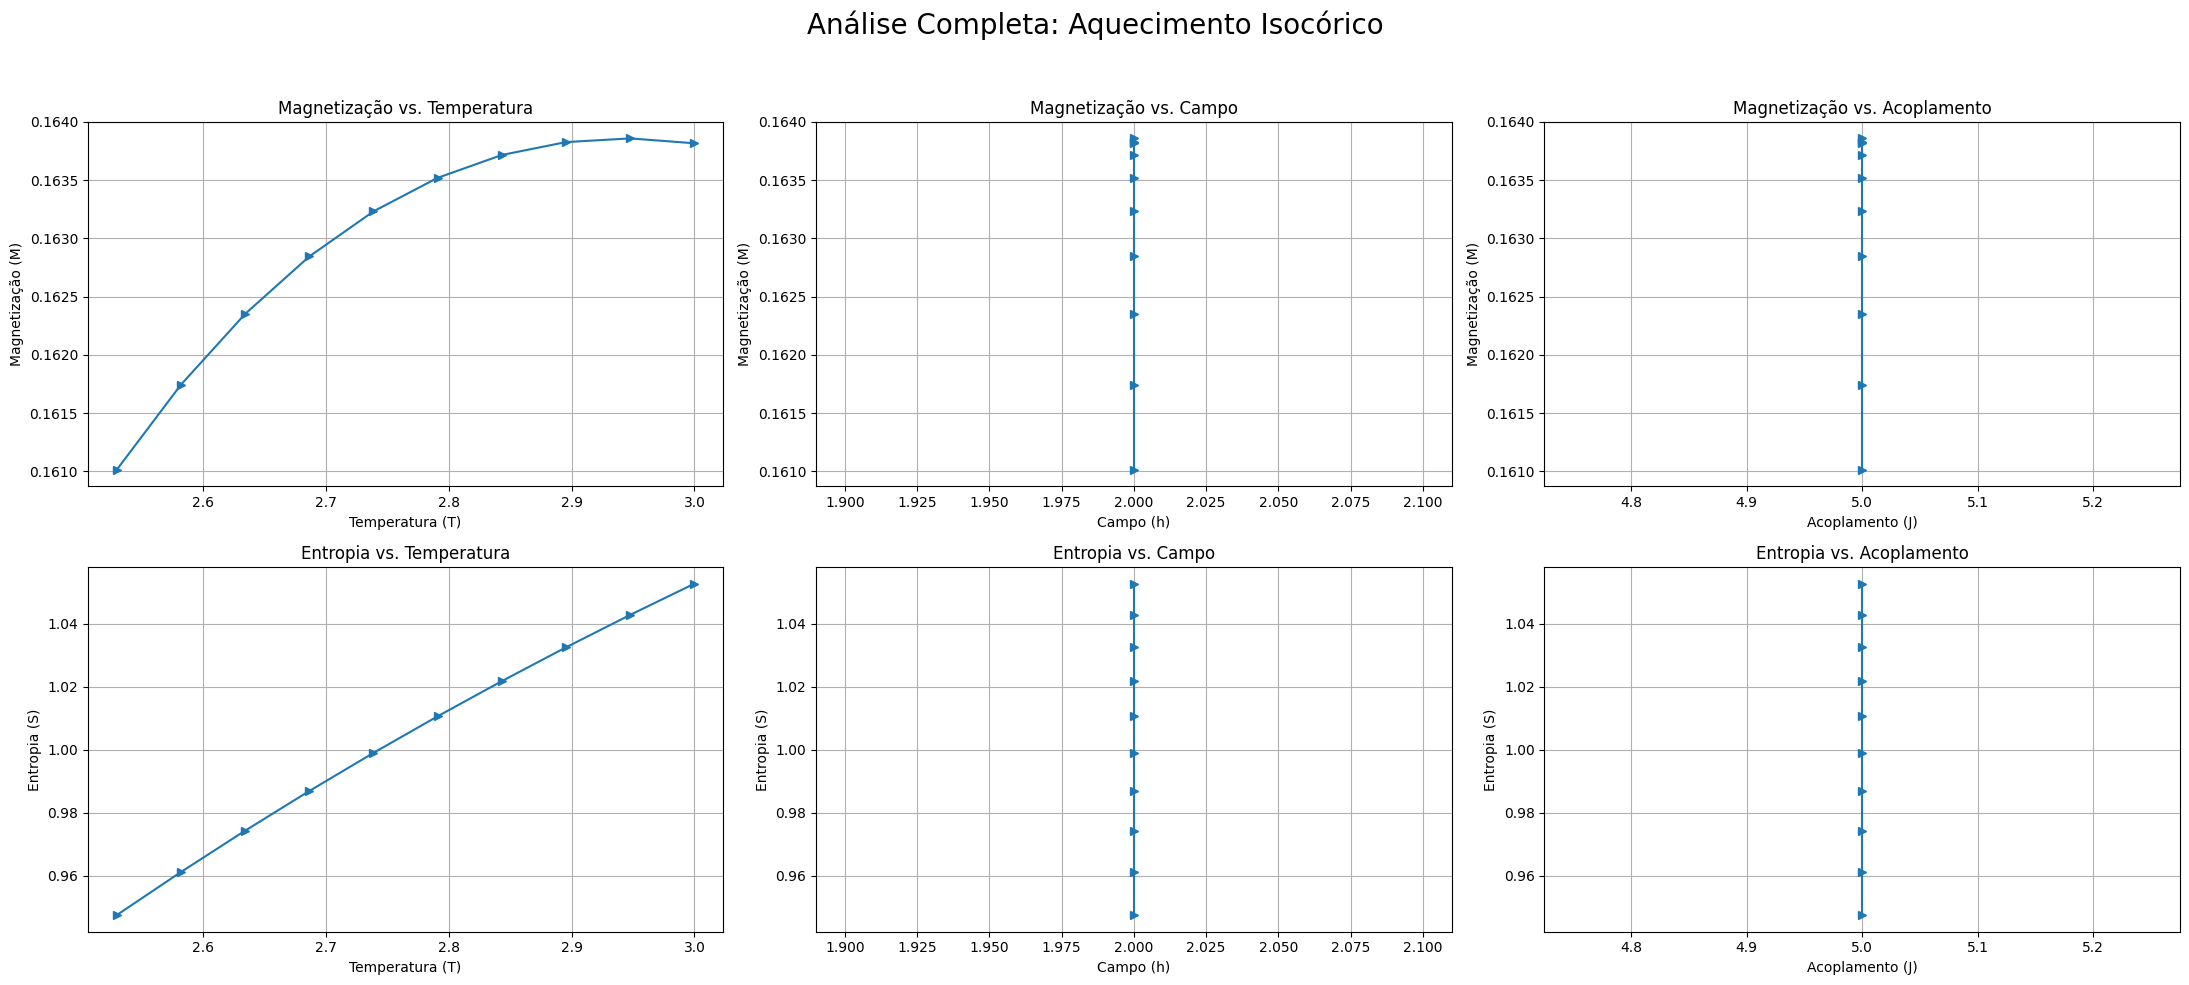

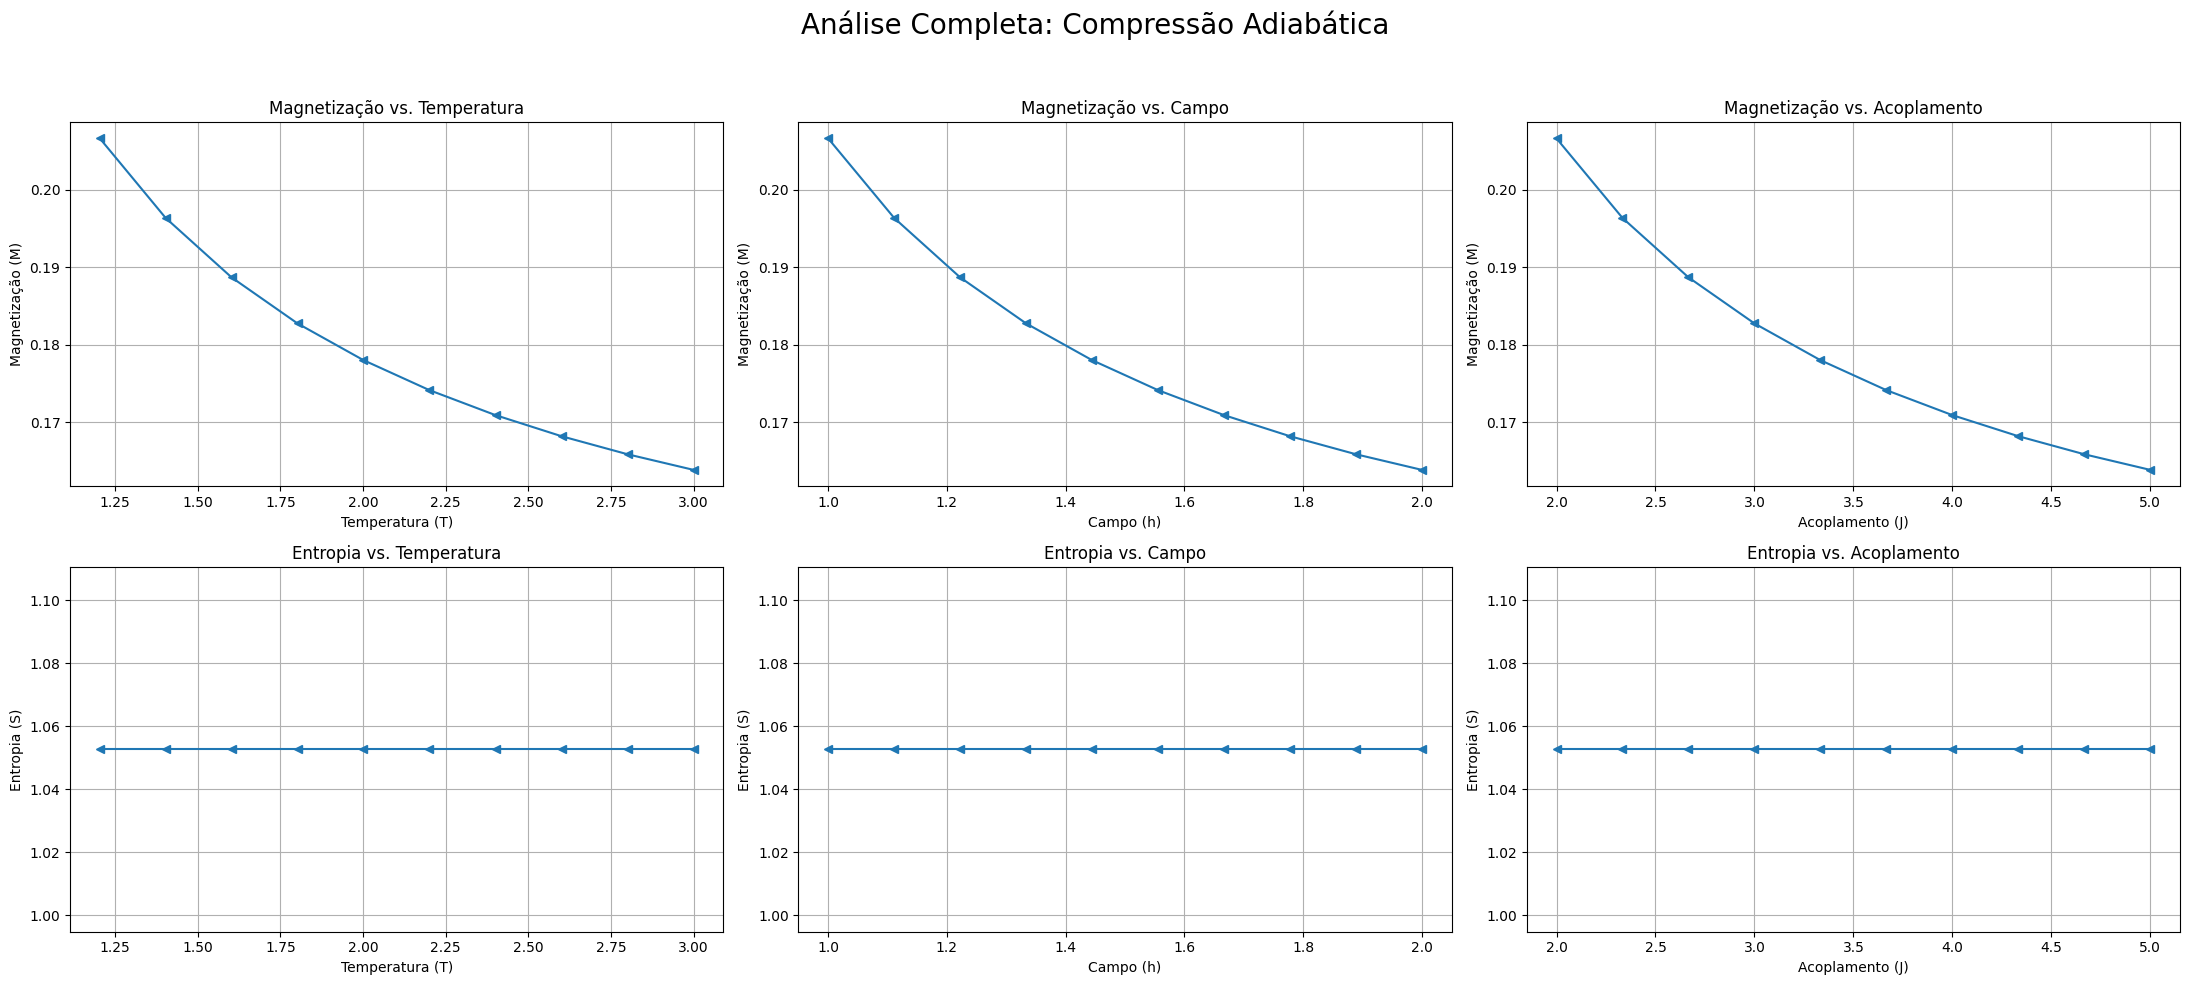

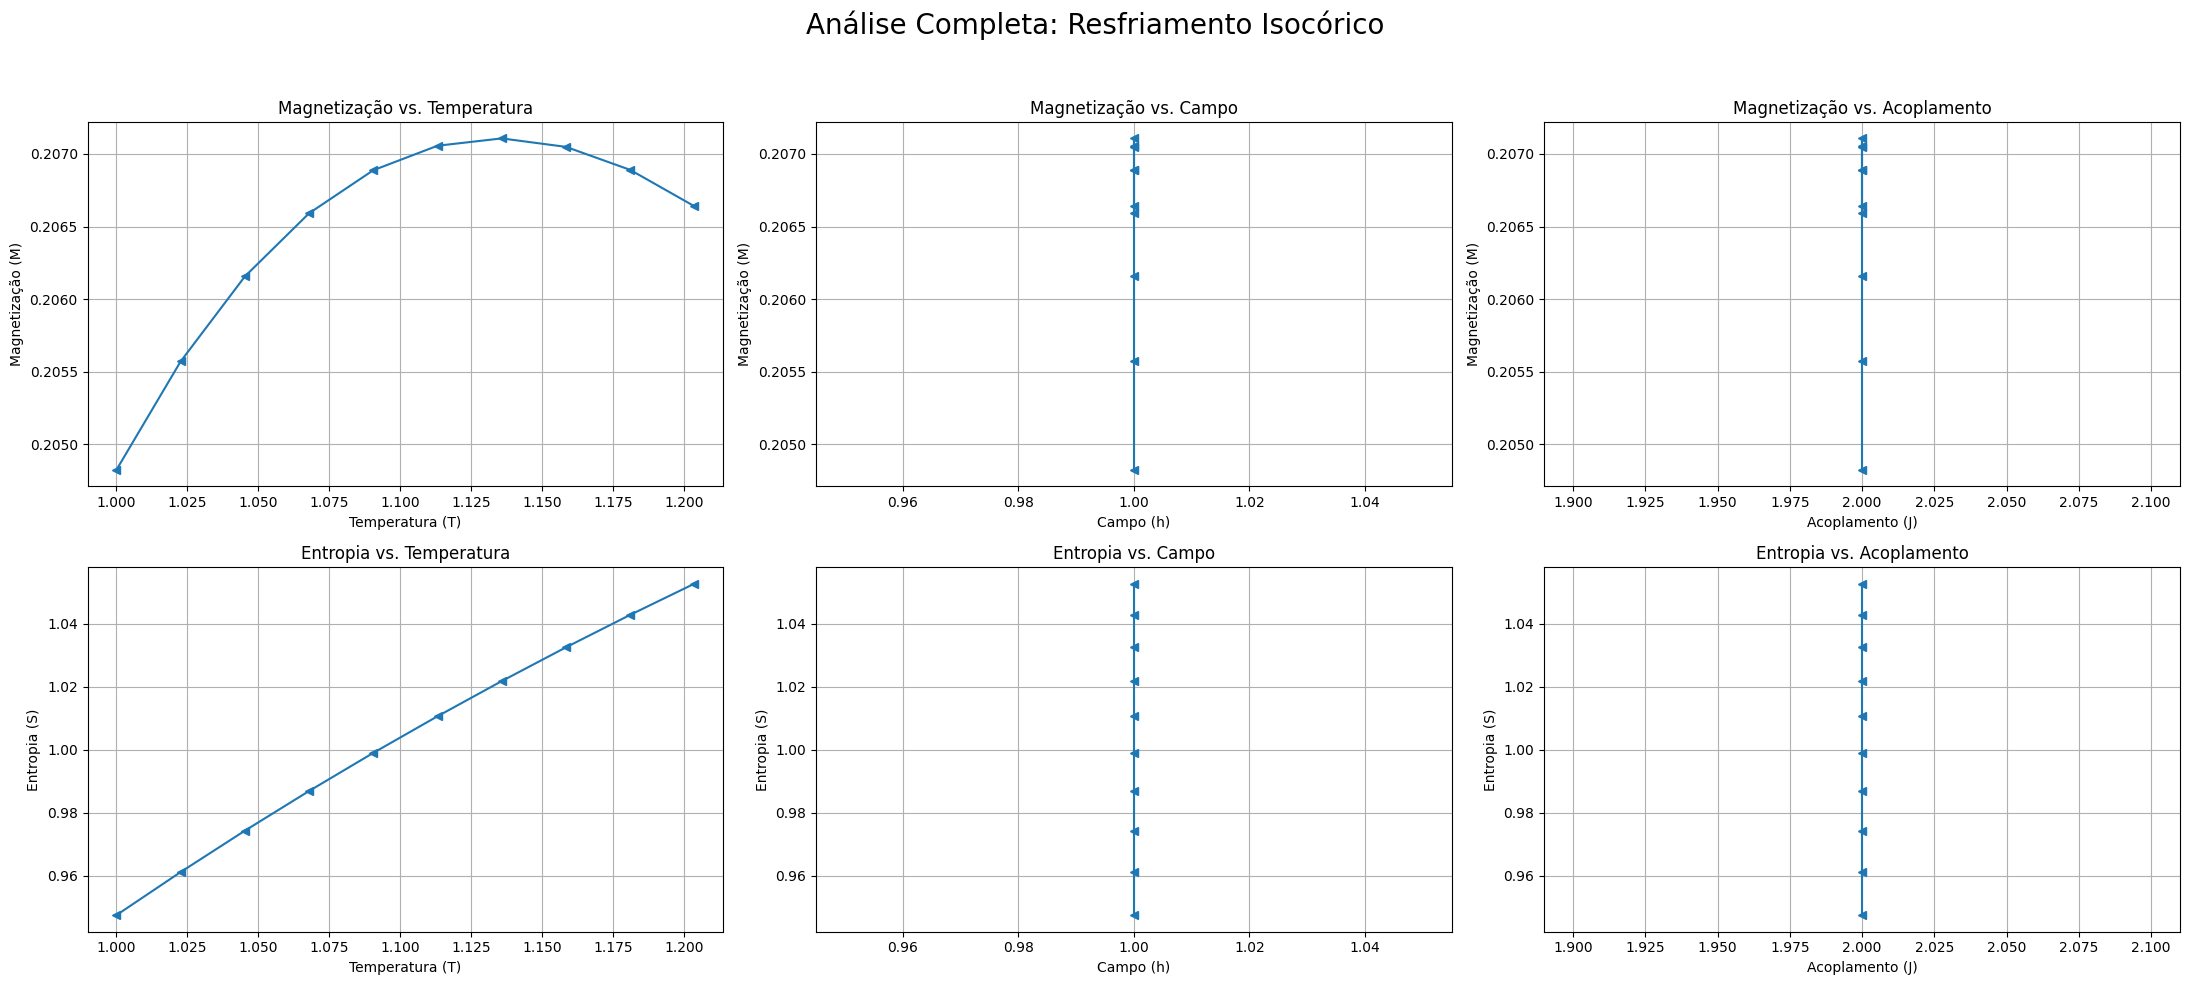

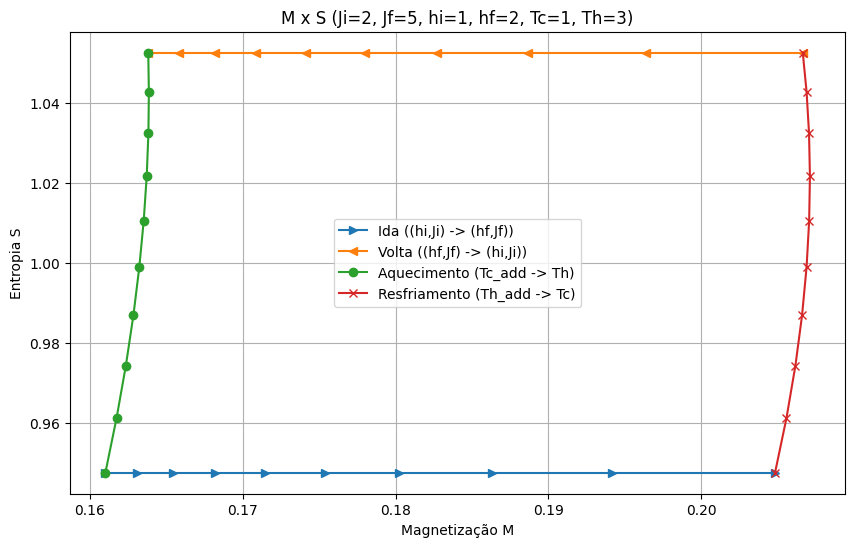

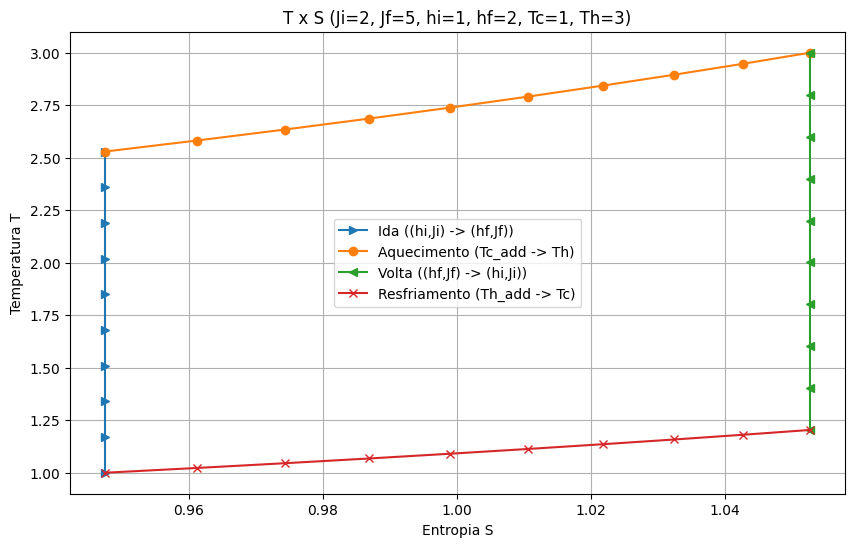

In [18]:
Ji = 2; Jf= 5; hi = 1; hf = 2; Tc=1; Th=3; PASSOS = 10
# Chamando a função para calcular os valores das funções e populações
# Função retorna:
[J_values_i, h_values_i,
    J_values_f, h_values_f,
    valores,
    Exp_add_values,
    populacoes_Exp_ADD,
    Aqu_ISO_values,
    populacoes_Aqu_ISO,
    Com_ADD_values,
    populacoes_Com_ADD,
    Res_ISO_values,
    populacoes_Res_ISO,
    Win, Wout, Qin, Qout, eff] = functions_values(Ji, Jf, hi, hf, Tc, Th, PASSOS)

## Desempacotando os valores retornados
Tc_add, T_values_i, T_cooling_values, Th_add, T_values_f, T_heating_values = valores

plot_populacoes_separadas(T_values_i, T_values_f, T_cooling_values, T_heating_values, populacoes_Exp_ADD, populacoes_Aqu_ISO, populacoes_Com_ADD, populacoes_Res_ISO)
plot_niveis_energia(T_values_i, T_values_f, T_cooling_values, T_heating_values,
                        h_values_i, J_values_i,
                        h_values_f, J_values_f,
                        Ji, Jf, hi, hf)
M_values_Exp_ADD = Exp_add_values[3]
S_values_Exp_ADD = Exp_add_values[2]
M_values_hot_ISO = Aqu_ISO_values[3]
S_values_hot_ISO = Aqu_ISO_values[2]
M_values_Com_ADD = Com_ADD_values[3]
S_values_Com_ADD = Com_ADD_values[2]
M_values_cold_ISO = Res_ISO_values[3]
S_values_cold_ISO = Res_ISO_values[2]


plot_magnetizacao_ciclo(
    # Dados da Expansão Adiabática
    T_values_i, h_values_i, J_values_i, M_values_Exp_ADD,
    # Dados do Aquecimento Isocórico (hf, Jf são constantes)
    T_heating_values, hf, Jf, M_values_hot_ISO,
    # Dados da Compressão Adiabática
    T_values_f, h_values_f, J_values_f, M_values_Com_ADD,
    # Dados do Resfriamento Isocórico (hi, Ji são constantes)
    T_cooling_values, hi, Ji, M_values_cold_ISO,
)

plot_entropia_ciclo(
    # Dados da Expansão Adiabática
    T_values_i, h_values_i, J_values_i, S_values_Exp_ADD,
    # Dados do Aquecimento Isocórico (hf, Jf são constantes)
    T_heating_values, hf, Jf, S_values_hot_ISO,
    # Dados da Compressão Adiabática
    T_values_f, h_values_f, J_values_f, S_values_Com_ADD,
    # Dados do Resfriamento Isocórico (hi, Ji são constantes)
    T_cooling_values, hi, Ji, S_values_cold_ISO,
)


#Expansão Adiabática
plot_analise_processo(
    titulo_processo = 'Expansão Adiabática',
    T_data = T_values_i,
    h_data = h_values_i,
    J_data = J_values_i,
    M_data = M_values_Exp_ADD,
    S_data = S_values_Exp_ADD,
    marker_style='>-'
)


#Expansão Aquecimento Isocórico
plot_analise_processo(
    titulo_processo = 'Aquecimento Isocórico',
    T_data = T_heating_values,
    h_data = np.linspace(hf, hf, len(T_heating_values)),
    J_data = np.linspace(Jf, Jf, len(T_heating_values)),
    M_data = M_values_hot_ISO,
    S_data = S_values_hot_ISO,
    marker_style='>-'
)

#Compressão Adiabática
plot_analise_processo(
    titulo_processo = 'Compressão Adiabática',
    T_data = T_values_f,
    h_data = h_values_f,
    J_data = J_values_f,
    M_data = M_values_Com_ADD,
    S_data = S_values_Com_ADD,
    marker_style='<-'
)

#Resfriamento Isocórico
plot_analise_processo(
    titulo_processo = 'Resfriamento Isocórico',
    T_data = T_cooling_values,
    h_data = np.linspace(hi, hi, len(T_cooling_values)),
    J_data = np.linspace(Ji, Ji, len(T_cooling_values)),
    M_data = M_values_cold_ISO,
    S_data = S_values_cold_ISO,
    marker_style='<-'
)

plot_ciclo_M(M_values_Exp_ADD,
              S_values_Exp_ADD,
                M_values_Com_ADD,
                  S_values_Com_ADD,
                    M_values_hot_ISO,
                      S_values_hot_ISO,
                        M_values_cold_ISO,
                          S_values_cold_ISO,
                            f'M x S (Ji={Ji}, Jf={Jf}, hi={hi}, hf={hf}, Tc={Tc}, Th={Th})')
plot_ciclo_T(T_values_i,
              T_values_f,
                T_heating_values,
                  T_cooling_values,
                    S_values_Exp_ADD,
                      S_values_Com_ADD,
                        S_values_hot_ISO,
                          S_values_cold_ISO,
                            f'T x S (Ji={Ji}, Jf={Jf}, hi={hi}, hf={hf}, Tc={Tc}, Th={Th})')

---------------------

Agora plotaremos o Ciclo completo M x S, M x T

In [ ]:
def plot_ciclo_M(M_values_i, S_values_i, M_values_f, S_values_f, M_values_heating, S_values_heating, M_values_cooling, S_values_cooling, titulo):

    plt.figure(figsize=(10, 6))
    # Plotando a magnetização para o ciclo de Otto
    plt.plot(M_values_i,S_values_i, label='Ida ((hi,Ji) -> (hf,Jf))', marker='>')
    plt.plot(M_values_f, S_values_f, label='Volta ((hf,Jf) -> (hi,Ji))', marker='<')
    plt.plot(M_values_heating, S_values_heating, label='Aquecimento (Tc_add -> Th)', marker='o') 
    plt.plot(M_values_cooling, S_values_cooling, label='Resfriamento (Th_add -> Tc)', marker='x')


    plt.xlabel('Magnetização M')
    plt.ylabel('Entropia S')
    plt.title(f'{titulo}')
    plt.grid(True)
    plt.legend()
    plt.show()



def plot_ciclo_T(T_values_i, T_values_f, T_heating_values, T_cooling_values, S_values_i, S_values_f, S_values_heating, S_values_cooling, titulo):

    plt.figure(figsize=(10, 6))
    # Plotando a magnetização para o ciclo de Otto
    plt.plot(S_values_i, T_values_i, label='Ida ((hi,Ji) -> (hf,Jf))', marker='>') 
    plt.plot(S_values_heating, T_heating_values,  label='Aquecimento (Tc_add -> Th)', marker='o') 
    plt.plot(S_values_f, T_values_f, label='Volta ((hf,Jf) -> (hi,Ji))', marker='<')
    plt.plot(S_values_cooling, T_cooling_values, label='Resfriamento (Th_add -> Tc)', marker='x')


    plt.xlabel('Entropia S')
    plt.ylabel('Temperatura T')
    plt.title(f'{titulo}')
    plt.grid(True)
    plt.legend()
    plt.show()
    



def plot_ciclo_MxT(T_values_i, T_values_f, T_heating_values, T_cooling_values, M_values_Exp_ADD, M_values_Com_ADD, M_values_hot_ISO, M_values_cold_ISO, titulo):

    plt.figure(figsize=(10, 6))
    # Plotando a magnetização para o ciclo de Otto
    plt.plot(T_values_i, M_values_Exp_ADD, label='Expansão Adiabática', marker='>')
    plt.plot(T_heating_values, M_values_hot_ISO, label='Aquecimento Isocórico', marker='o')
    plt.plot(T_values_f, M_values_Com_ADD, label='Compressão Adiabática', marker='<')
    plt.plot(T_cooling_values, M_values_cold_ISO, label='Resfriamento Isocórico', marker='x')

    plt.xlabel('Temperatura T')
    plt.ylabel('Magnetização M')
    plt.title(f'{titulo}')
    plt.grid(True)
    plt.legend()
    plt.show()
    
def plot_ciclo_UxT(T_values_i, T_values_f, T_heating_values, T_cooling_values, U_values_Exp_ADD, U_values_Com_ADD, U_values_hot_ISO, U_values_cold_ISO, titulo):

    plt.figure(figsize=(10, 6))
    # Plotando a energia interna para o ciclo de Otto
    plt.plot(T_values_i, U_values_Exp_ADD, label='Expansão Adiabática', marker='>')
    plt.plot(T_heating_values, U_values_hot_ISO, label='Aquecimento Isocórico', marker='o')
    plt.plot(T_values_f, U_values_Com_ADD, label='Compressão Adiabática', marker='<')
    plt.plot(T_cooling_values, U_values_cold_ISO, label='Resfriamento Isocórico', marker='x')

    plt.xlabel('Temperatura T')
    plt.ylabel('Energia Interna U')
    plt.title(f'{titulo}')
    plt.grid(True)
    plt.legend()
    plt.show()

Temperatures Range:
1 -> 2 (Tc -> Tc_add): Tc: 1, Tc_add: [2.52958085]
2 -> 3 (T_heating): Tc_add: [2.52958085] Th: 3
3 -> 4 (Th -> Th_add): Th: 3, Th_add: [1.20357409]
4 -> 1 (T_cooling): Th_add: [1.20357409], Tc: 1


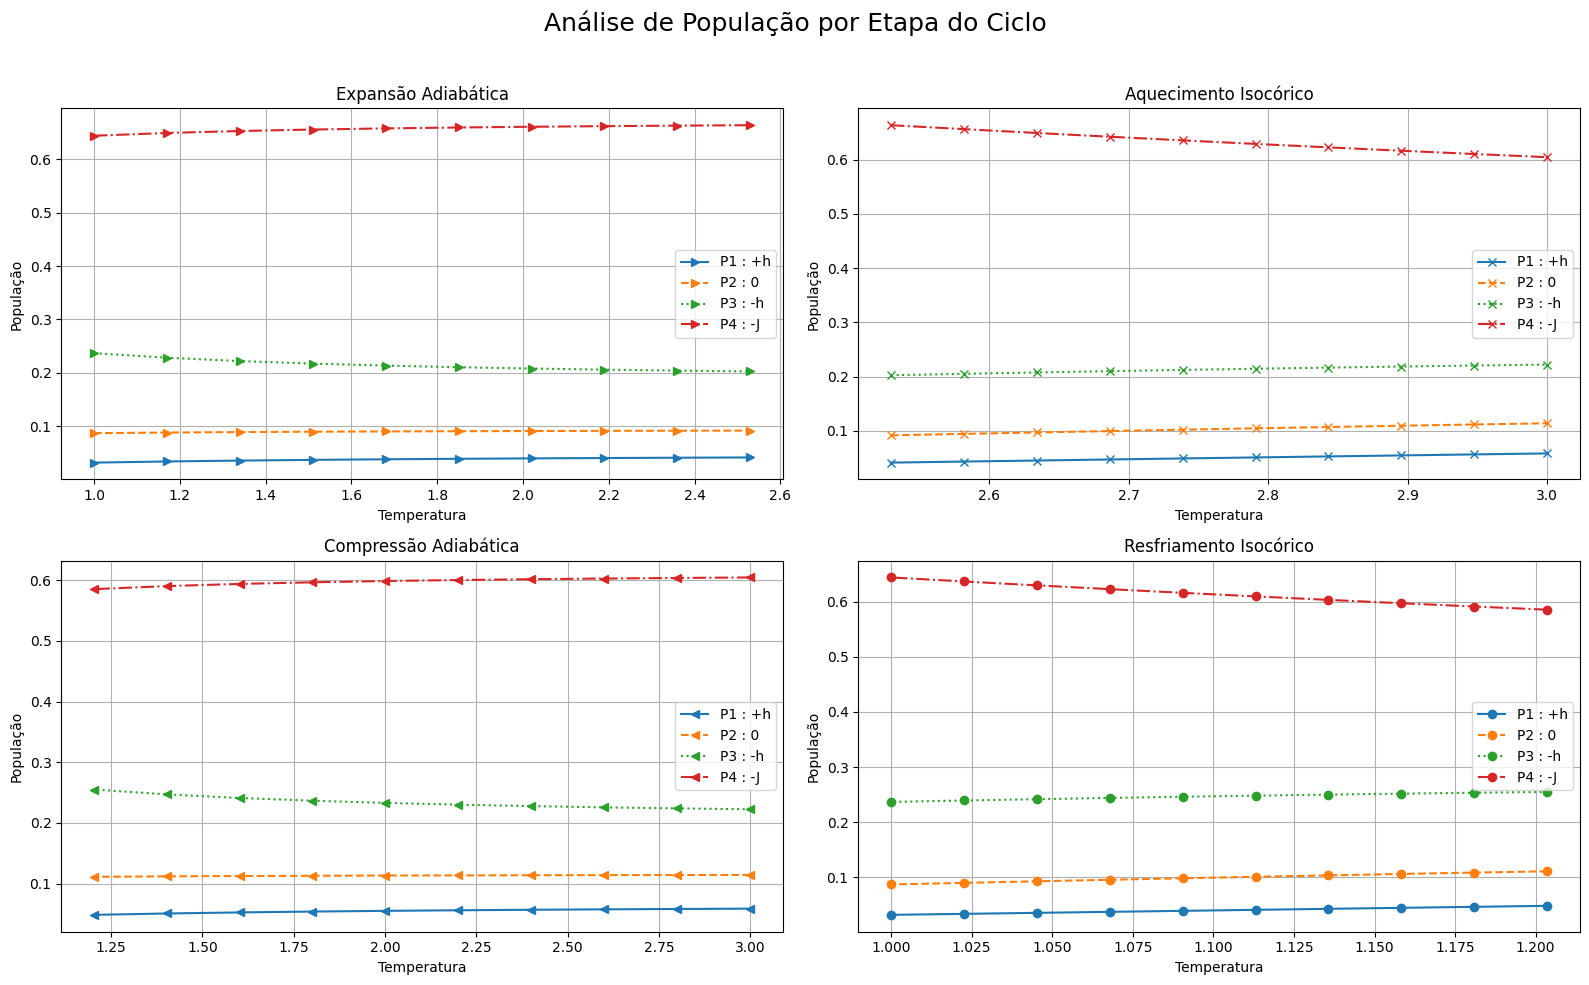

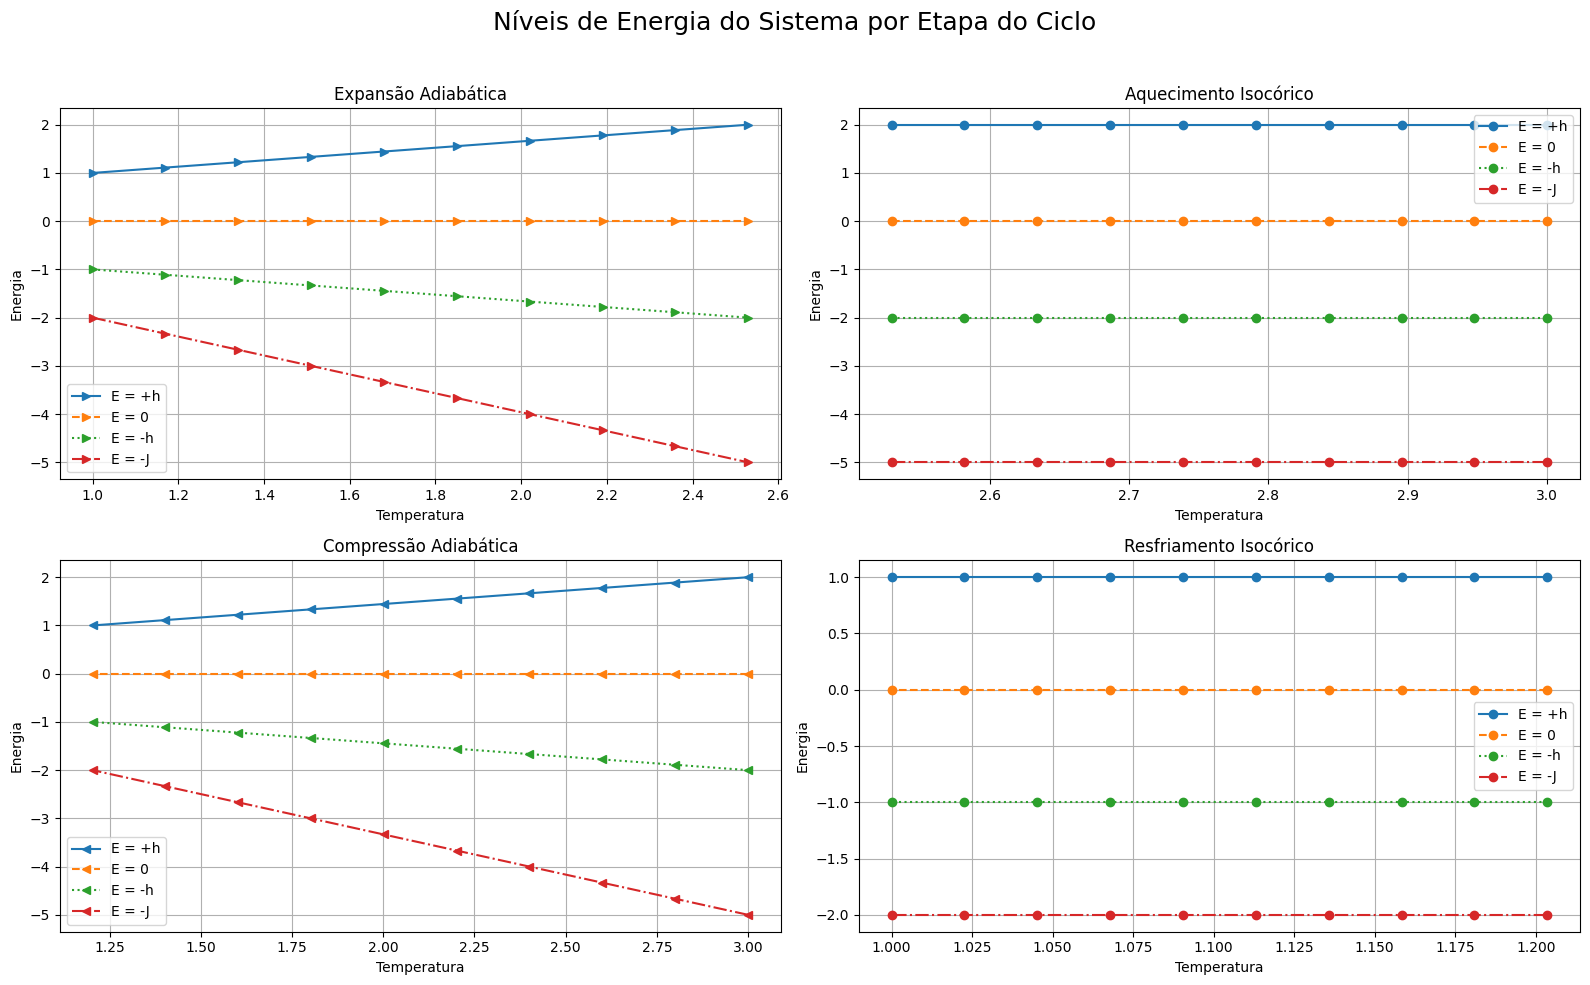

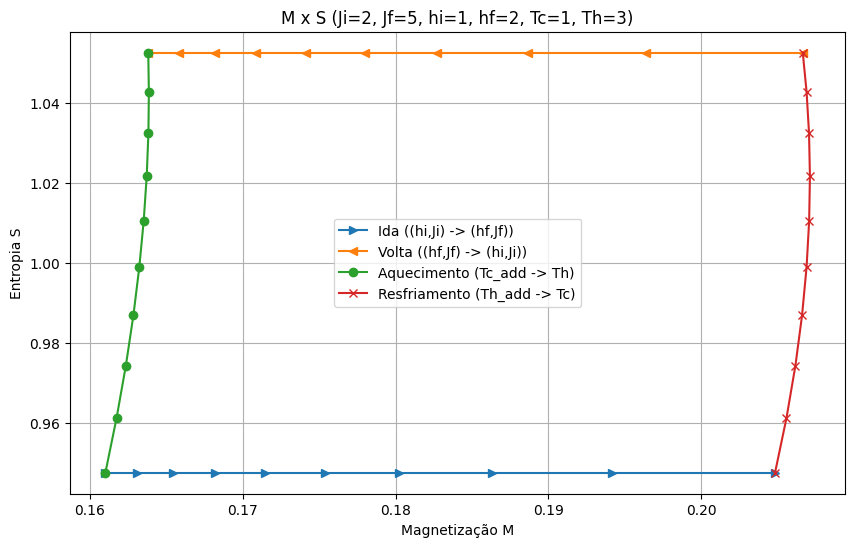

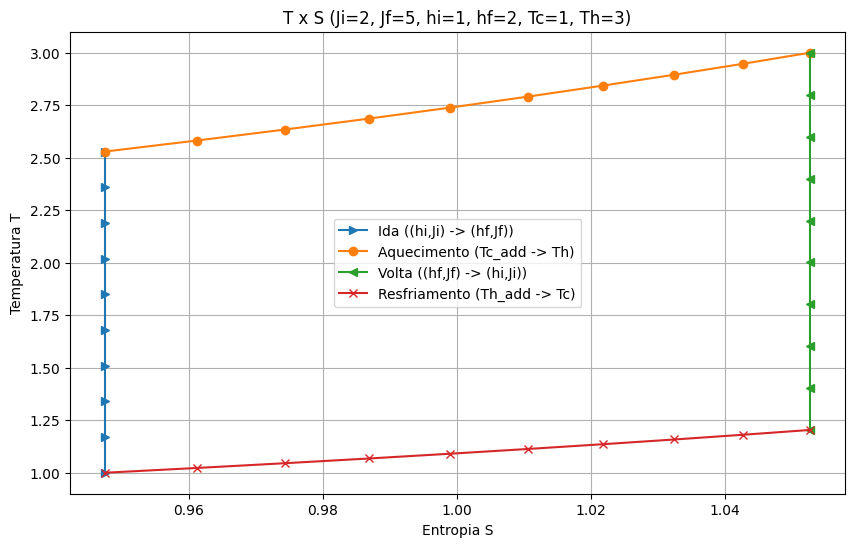

In [32]:
Ji = 2; Jf= 5; hi = 1; hf = 2; Tc=1; Th=3; PASSOS = 10
# Chamando a função para calcular os valores das funções e populações
# Função retorna:
[J_values_i, h_values_i,
    J_values_f, h_values_f,
    valores,
    Exp_add_values,
    populacoes_Exp_ADD,
    Aqu_ISO_values,
    populacoes_Aqu_ISO,
    Com_ADD_values,
    populacoes_Com_ADD,
    Res_ISO_values,
    populacoes_Res_ISO,
    Win, Wout, Qin, Qout, eff] = functions_values(Ji, Jf, hi, hf, Tc, Th, PASSOS)

## Desempacotando os valores retornados
Tc_add, T_values_i, T_cooling_values, Th_add, T_values_f, T_heating_values = valores

plot_populacoes_separadas(T_values_i, T_values_f, T_cooling_values, T_heating_values, populacoes_Exp_ADD, populacoes_Aqu_ISO, populacoes_Com_ADD, populacoes_Res_ISO)
plot_niveis_energia(T_values_i, T_values_f, T_cooling_values, T_heating_values,
                        h_values_i, J_values_i,
                        h_values_f, J_values_f,
                        Ji, Jf, hi, hf)

M_values_Exp_ADD = Exp_add_values[3]
S_values_Exp_ADD = Exp_add_values[2]
M_values_hot_ISO = Aqu_ISO_values[3]
S_values_hot_ISO = Aqu_ISO_values[2]
M_values_Com_ADD = Com_ADD_values[3]
S_values_Com_ADD = Com_ADD_values[2]
M_values_cold_ISO = Res_ISO_values[3]
S_values_cold_ISO = Res_ISO_values[2]


plot_ciclo_M(M_values_Exp_ADD,
              S_values_Exp_ADD,
                M_values_Com_ADD,
                  S_values_Com_ADD,
                    M_values_hot_ISO,
                      S_values_hot_ISO,
                        M_values_cold_ISO,
                          S_values_cold_ISO,
                          f'M x S (Ji={Ji}, Jf={Jf}, hi={hi}, hf={hf}, Tc={Tc}, Th={Th})')
plot_ciclo_T(T_values_i,
              T_values_f,
                T_heating_values,
                  T_cooling_values,
                    S_values_Exp_ADD,
                      S_values_Com_ADD,
                        S_values_hot_ISO,
                          S_values_cold_ISO,
                            f'T x S (Ji={Ji}, Jf={Jf}, hi={hi}, hf={hf}, Tc={Tc}, Th={Th})')

Temperatures Range:
1 -> 2 (Tc -> Tc_add): Tc: 1, Tc_add: [2.52958085]
2 -> 3 (T_heating): Tc_add: [2.52958085] Th: 3
3 -> 4 (Th -> Th_add): Th: 3, Th_add: [1.20357409]
4 -> 1 (T_cooling): Th_add: [1.20357409], Tc: 1


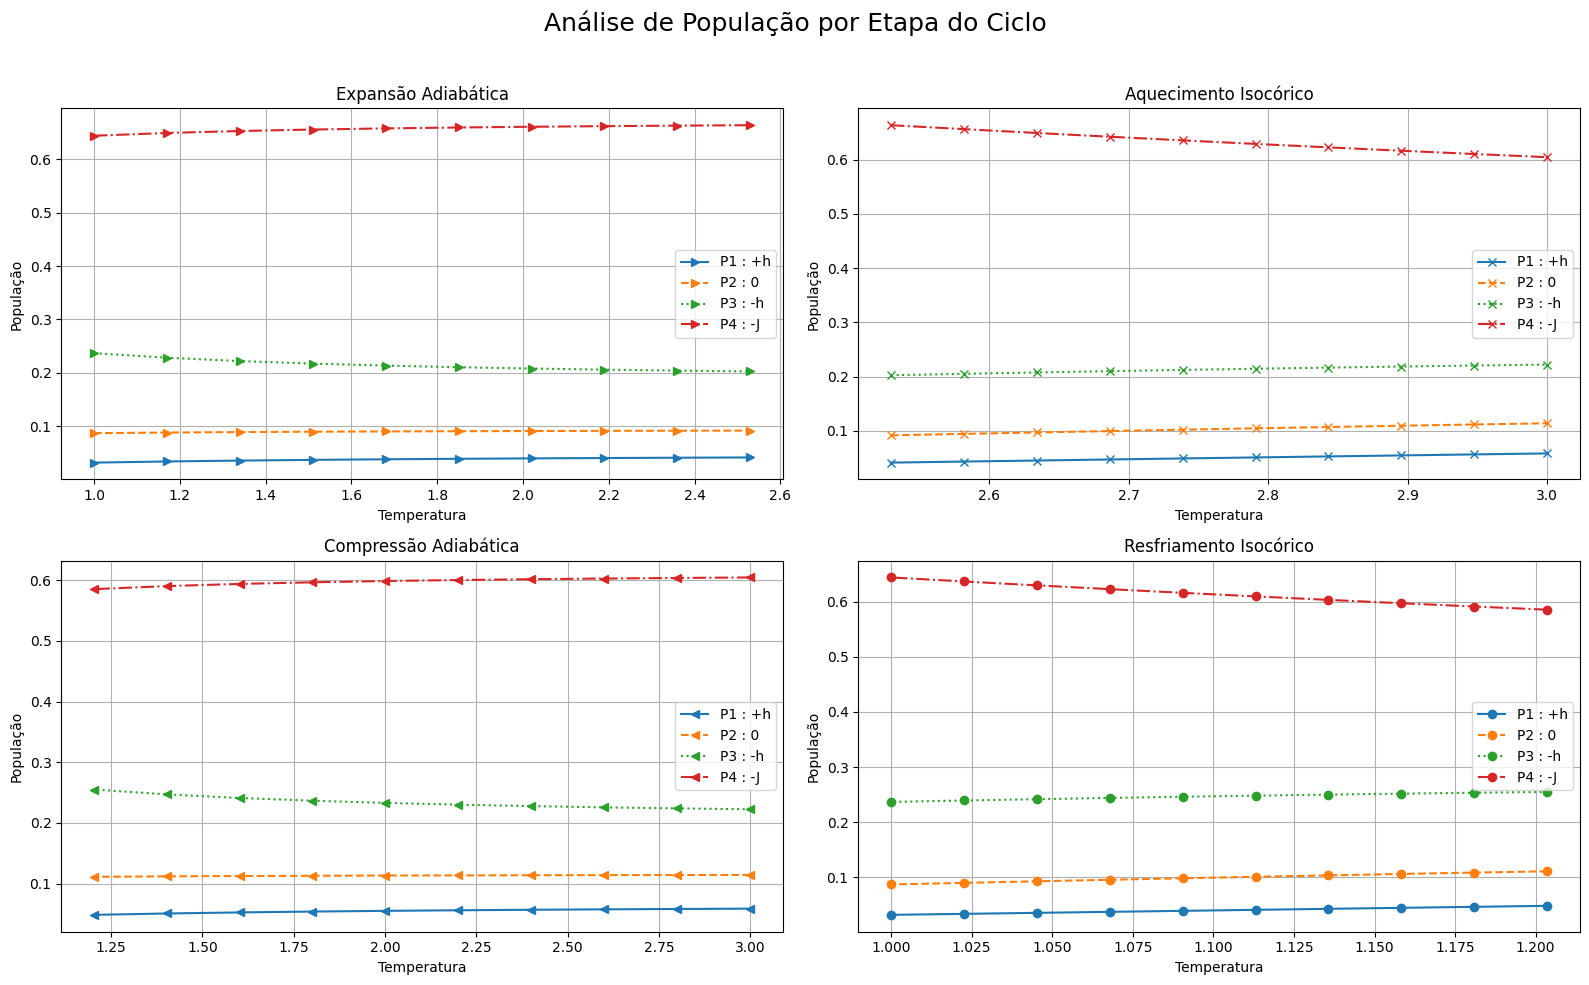

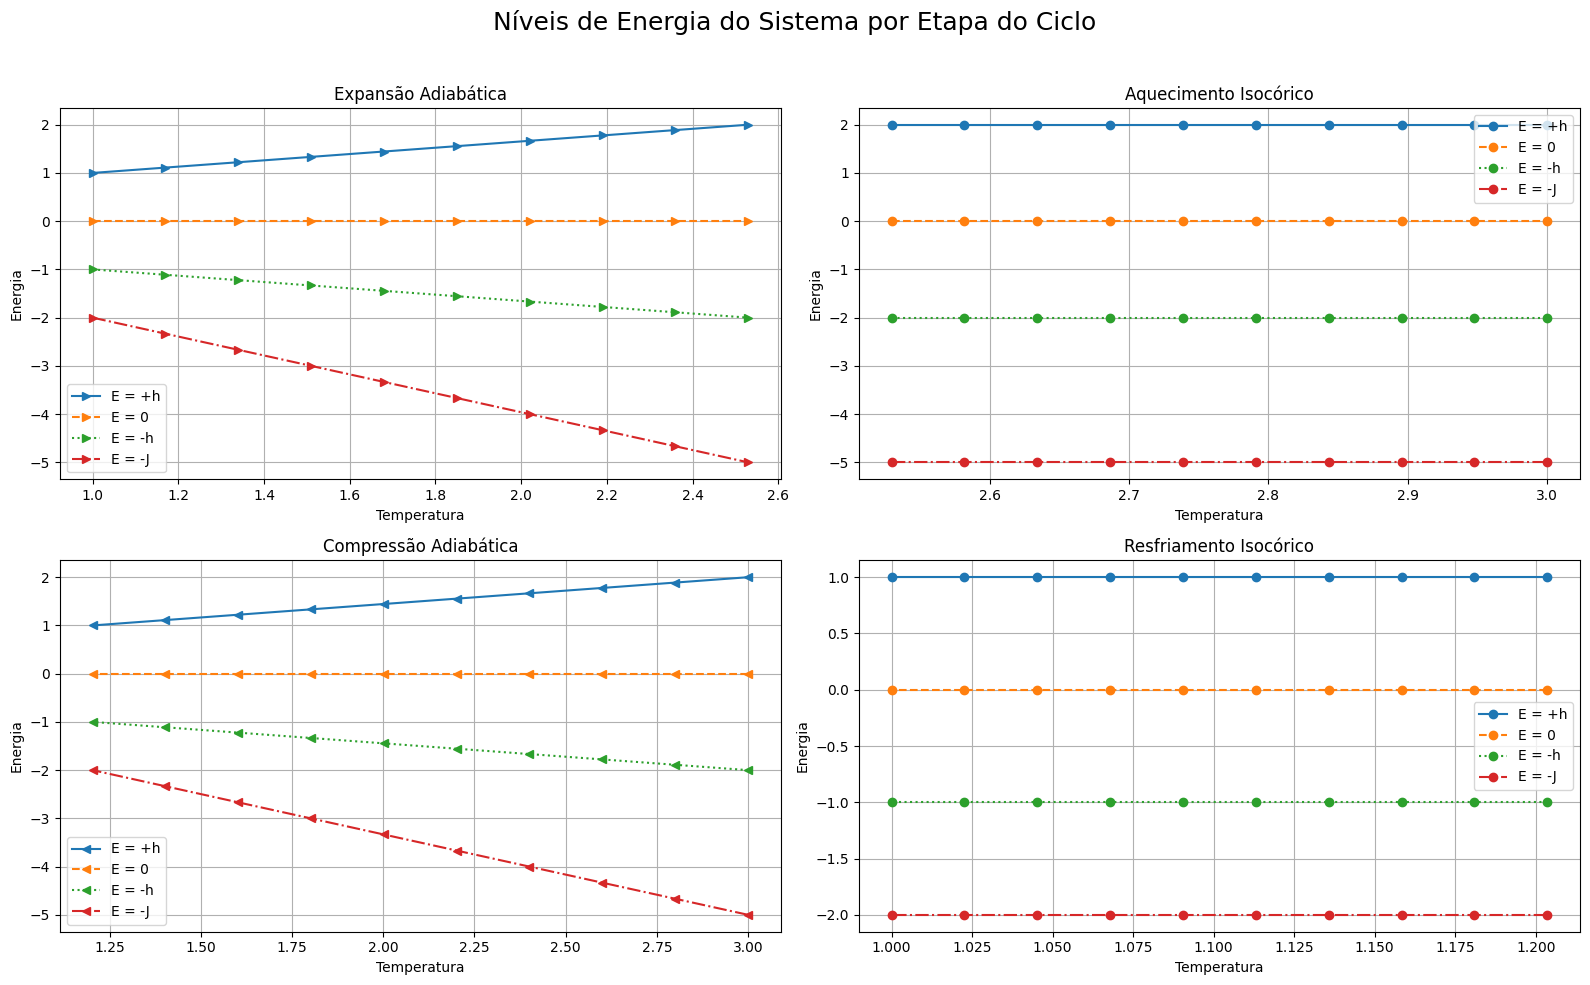

Máquina!
ETA = abs(W) /abs(Qhot) ETA=Eff???: [0.60167363]
Win: [1.97363298], Wout: [-2.14761202], Qint: [0.28915849], Qout: [-0.11517945], eff: [0.60167363]


In [19]:
Ji = 2; Jf= 5; hi = 1; hf = 2; Tc=1; Th=3; PASSOS = 10
# Chamando a função para calcular os valores das funções e populações
# Função retorna:
[J_values_i, h_values_i,
    J_values_f, h_values_f,
    valores,
    Exp_add_values,
    populacoes_Exp_ADD,
    Aqu_ISO_values,
    populacoes_Aqu_ISO,
    Com_ADD_values,
    populacoes_Com_ADD,
    Res_ISO_values,
    populacoes_Res_ISO,
    Win, Wout, Qin, Qout, eff] = functions_values(Ji, Jf, hi, hf, Tc, Th, PASSOS)

## Desempacotando os valores retornados
Tc_add, T_values_i, T_cooling_values, Th_add, T_values_f, T_heating_values = valores

plot_populacoes_separadas(T_values_i, T_values_f, T_cooling_values, T_heating_values, populacoes_Exp_ADD, populacoes_Aqu_ISO, populacoes_Com_ADD, populacoes_Res_ISO)
plot_niveis_energia(T_values_i, T_values_f, T_cooling_values, T_heating_values,
                        h_values_i, J_values_i,
                        h_values_f, J_values_f,
                        Ji, Jf, hi, hf)

M_values_Exp_ADD = Exp_add_values[3]
S_values_Exp_ADD = Exp_add_values[2]
M_values_hot_ISO = Aqu_ISO_values[3]
S_values_hot_ISO = Aqu_ISO_values[2]
M_values_Com_ADD = Com_ADD_values[3]
S_values_Com_ADD = Com_ADD_values[2]
M_values_cold_ISO = Res_ISO_values[3]
S_values_cold_ISO = Res_ISO_values[2]

engineOrWhat(Win, Wout, Qin, Qout, Tc, Th, eff)

In [ ]:
import matplotlib.pyplot as plt
def main(Ji, Jf, hi, hf, Tc, Th, PASSOS, detalhe):
    [J_values_i, h_values_i,
    J_values_f, h_values_f,
    valores,
    Exp_add_values,
    populacoes_Exp_ADD,
    Aqu_ISO_values,
    populacoes_Aqu_ISO,
    Com_ADD_values,
    populacoes_Com_ADD,
    Res_ISO_values,
    populacoes_Res_ISO,
    Win, Wout, Qin, Qout, eff] = functions_values(Ji, Jf, hi, hf, Tc, Th, PASSOS)

    ## Desempacotando os valores retornados
    #[Tc_add, T_values_i, T_cooling_values, Th_add, T_values_f, T_heating_values] = valores

    Tc_add = valores[0]
    T_values_i = valores[1]
    T_cooling_values = valores[2]
    Th_add = valores[3]
    T_values_f = valores[4]
    T_heating_values = valores[5]
    

    M_values_Exp_ADD = Exp_add_values[3]
    S_values_Exp_ADD = Exp_add_values[2]
    M_values_hot_ISO = Aqu_ISO_values[3]
    S_values_hot_ISO = Aqu_ISO_values[2]
    M_values_Com_ADD = Com_ADD_values[3]
    S_values_Com_ADD = Com_ADD_values[2]
    M_values_cold_ISO = Res_ISO_values[3]
    S_values_cold_ISO = Res_ISO_values[2]
    
    U_values_Exp_ADD = Exp_add_values[1]
    U_values_hot_ISO = Aqu_ISO_values[1]
    U_values_Com_ADD = Com_ADD_values[1]
    U_values_cold_ISO = Res_ISO_values[1]


    engineOrWhat(Win, Wout, Qin, Qout, Tc, Th, eff)
    plot_populacoes_separadas(T_values_i, T_values_f,
                            T_cooling_values, T_heating_values, populacoes_Exp_ADD,
                                populacoes_Aqu_ISO, populacoes_Com_ADD, populacoes_Res_ISO)
    plot_niveis_energia(T_values_i, T_values_f, T_cooling_values, T_heating_values,
                            h_values_i, J_values_i,
                            h_values_f, J_values_f,
                            Ji, Jf, hi, hf)

    if detalhe == True:
        #Compressão Adiabática
        plot_analise_processo(
            titulo_processo = 'Expansão Adiabática',
            T_data = T_values_i,
            h_data = h_values_i,
            J_data = J_values_i,
            M_data = M_values_Exp_ADD,
            S_data = S_values_Exp_ADD,
            marker_style='>-'
        )

        #Expansão Aquecimento Isocórico        
        plot_analise_processo(
            titulo_processo = 'Aquecimento Isocórico',
            T_data = T_heating_values,
            h_data = np.linspace(hf, hf, len(T_heating_values)),
            J_data = np.linspace(Jf, Jf, len(T_heating_values)),
            M_data = M_values_hot_ISO,
            S_data = S_values_hot_ISO,
            marker_style='>-'
        )

        #Expansão Adiabática
        plot_analise_processo(
            titulo_processo = 'Compressão Adiabática',
            T_data = T_values_f,
            h_data = h_values_f,
            J_data = J_values_f,
            M_data = M_values_Com_ADD,
            S_data = S_values_Com_ADD,
            marker_style='<-'
        )

        #Resfriamento Isocórico
        plot_analise_processo(
            titulo_processo = 'Resfriamento Isocórico',
            T_data = T_cooling_values,
            h_data = np.linspace(hi, hi, len(T_cooling_values)),
            J_data = np.linspace(Ji, Ji, len(T_cooling_values)),
            M_data = M_values_cold_ISO,
            S_data = S_values_cold_ISO,
            marker_style='<-'
        )
    elif detalhe == False:
        #Plotando os gráficos de magnetização e entropia para o ciclo de Otto
        #Compressão Adiabática
        plot_analise_processo_simples(
            titulo_processo = 'Expansão Adiabática',
            T_data = T_values_i,
            h_data = h_values_i,
            J_data = J_values_i,
            M_data = M_values_Exp_ADD,
            S_data = S_values_Exp_ADD,
            marker_style='>-'
        )

        #Expansão Aquecimento Isocórico
        plot_analise_processo_simples(
            titulo_processo = 'Aquecimento Isocórico',
            T_data = T_heating_values,
            h_data = np.linspace(hf, hf, len(T_heating_values)),
            J_data = np.linspace(Jf, Jf, len(T_heating_values)),
            M_data = M_values_hot_ISO,
            S_data = S_values_hot_ISO,
            marker_style='>-'
        )

        #Expansão Adiabática
        plot_analise_processo_simples(
            titulo_processo = 'Compressão Adiabática',
            T_data = T_values_f,
            h_data = h_values_f,
            J_data = J_values_f,
            M_data = M_values_Com_ADD,
            S_data = S_values_Com_ADD,
            marker_style='<-'
        )

        #Resfriamento Isocórico
        plot_analise_processo_simples(
            titulo_processo = 'Resfriamento Isocórico',
            T_data = T_cooling_values,
            h_data = np.linspace(hi, hi, len(T_cooling_values)),
            J_data = np.linspace(Ji, Ji, len(T_cooling_values)),
            M_data = M_values_cold_ISO,
            S_data = S_values_cold_ISO,
            marker_style='<-'
        )
    else:
        print("Opção inválida para detalhe. Use True ou False.")

    plot_ciclo_M(M_values_Exp_ADD,
            S_values_Exp_ADD,
                M_values_Com_ADD,
                    S_values_Com_ADD,
                        M_values_hot_ISO,
                            S_values_hot_ISO,
                                M_values_cold_ISO,
                                    S_values_cold_ISO,
                                        f'M x S (Ji={Ji}, Jf={Jf}, hi={hi}, hf={hf}, Tc={Tc}, Th={Th})')
    plot_ciclo_T(T_values_i,
                T_values_f,
                    T_heating_values,
                        T_cooling_values,
                            S_values_Exp_ADD,
                                    S_values_Com_ADD,
                                        S_values_hot_ISO,
                                            S_values_cold_ISO,
                                                f'T x S (Ji={Ji}, Jf={Jf}, hi={hi}, hf={hf}, Tc={Tc}, Th={Th})')
    
    plot_ciclo_MxT(T_values_i,
            T_values_f,
                T_heating_values,
                        T_cooling_values,
                            M_values_Exp_ADD,
                                M_values_Com_ADD,
                                    M_values_hot_ISO,
                                        M_values_cold_ISO,
                                                f'M x T (Ji={Ji}, Jf={Jf}, hi={hi}, hf={hf}, Tc={Tc}, Th={Th})')
    
    
    
    plot_ciclo_UxT(T_values_i,
                    T_values_f,
                T_heating_values,
                        T_cooling_values,
                            U_values_Exp_ADD,
                                U_values_Com_ADD,
                                    U_values_hot_ISO,
                                        U_values_cold_ISO,
                                                f'U x T (Ji={Ji}, Jf={Jf}, hi={hi}, hf={hf}, Tc={Tc}, Th={Th})')       

Temperatures Range:
1 -> 2 (Tc -> Tc_add): Tc: 1, Tc_add: [1.47533932]
2 -> 3 (T_heating): Tc_add: [1.47533932] Th: 3
3 -> 4 (Th -> Th_add): Th: 3, Th_add: [1.86778397]
4 -> 1 (T_cooling): Th_add: [1.86778397], Tc: 1
Máquina!
ETA = abs(W) /abs(Qhot) ETA=Eff???: [0.35436969]
Win: [0.66366459], Wout: [-0.86807577], Qint: [0.57683031], Qout: [-0.37241913], eff: [0.35436969]


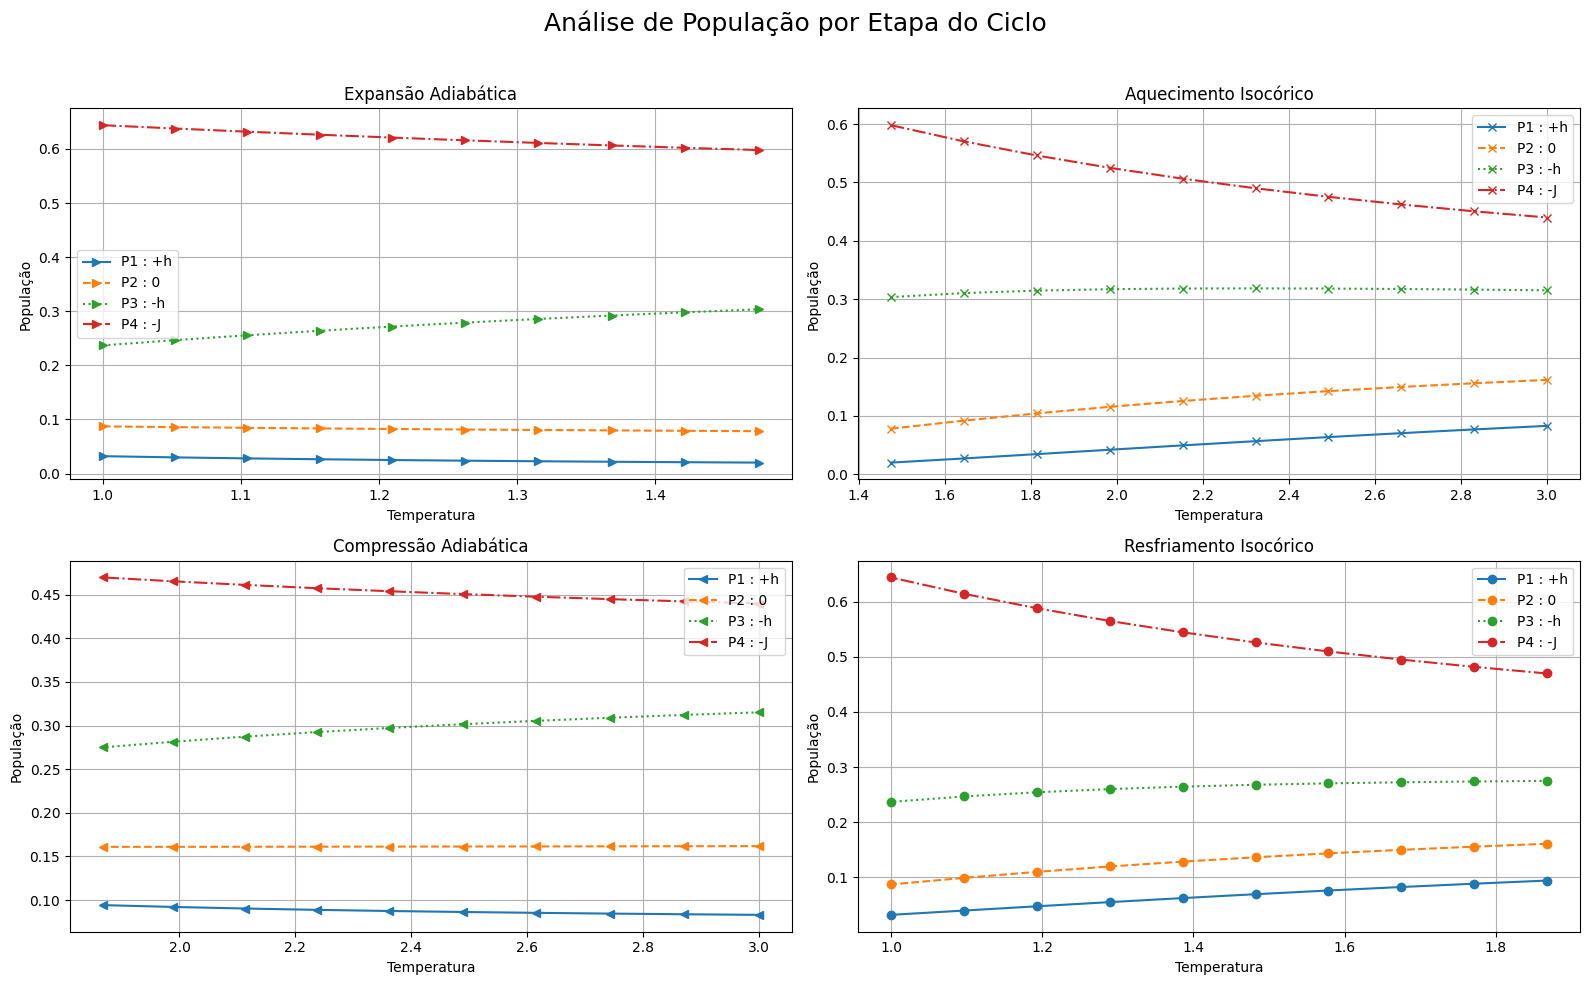

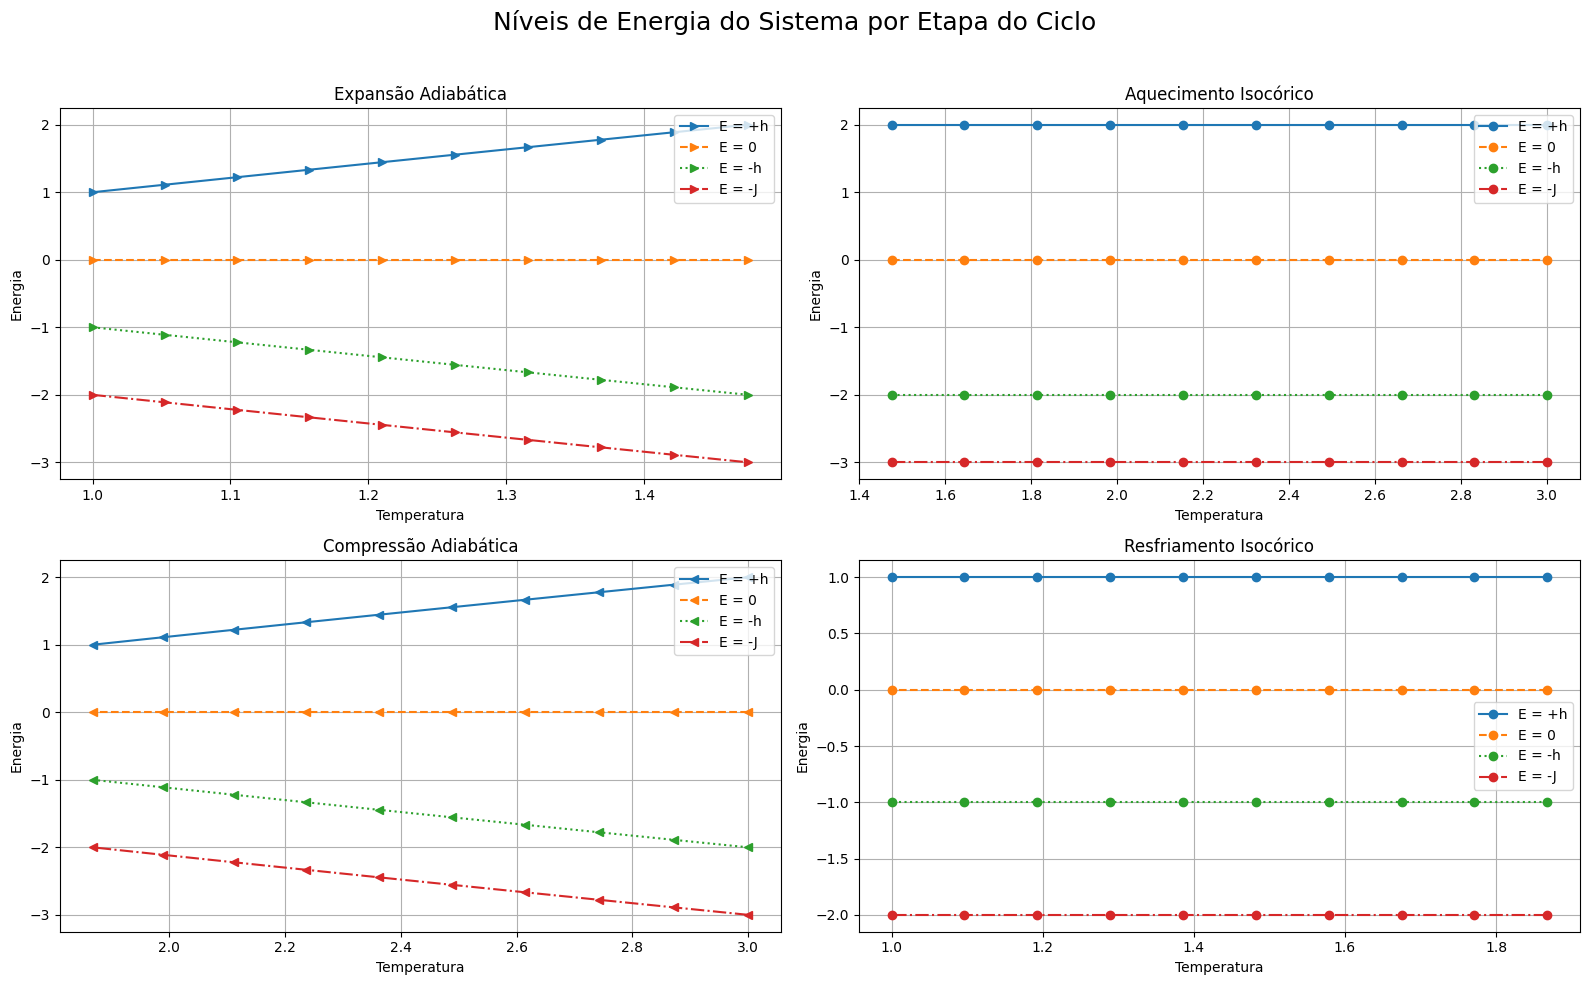

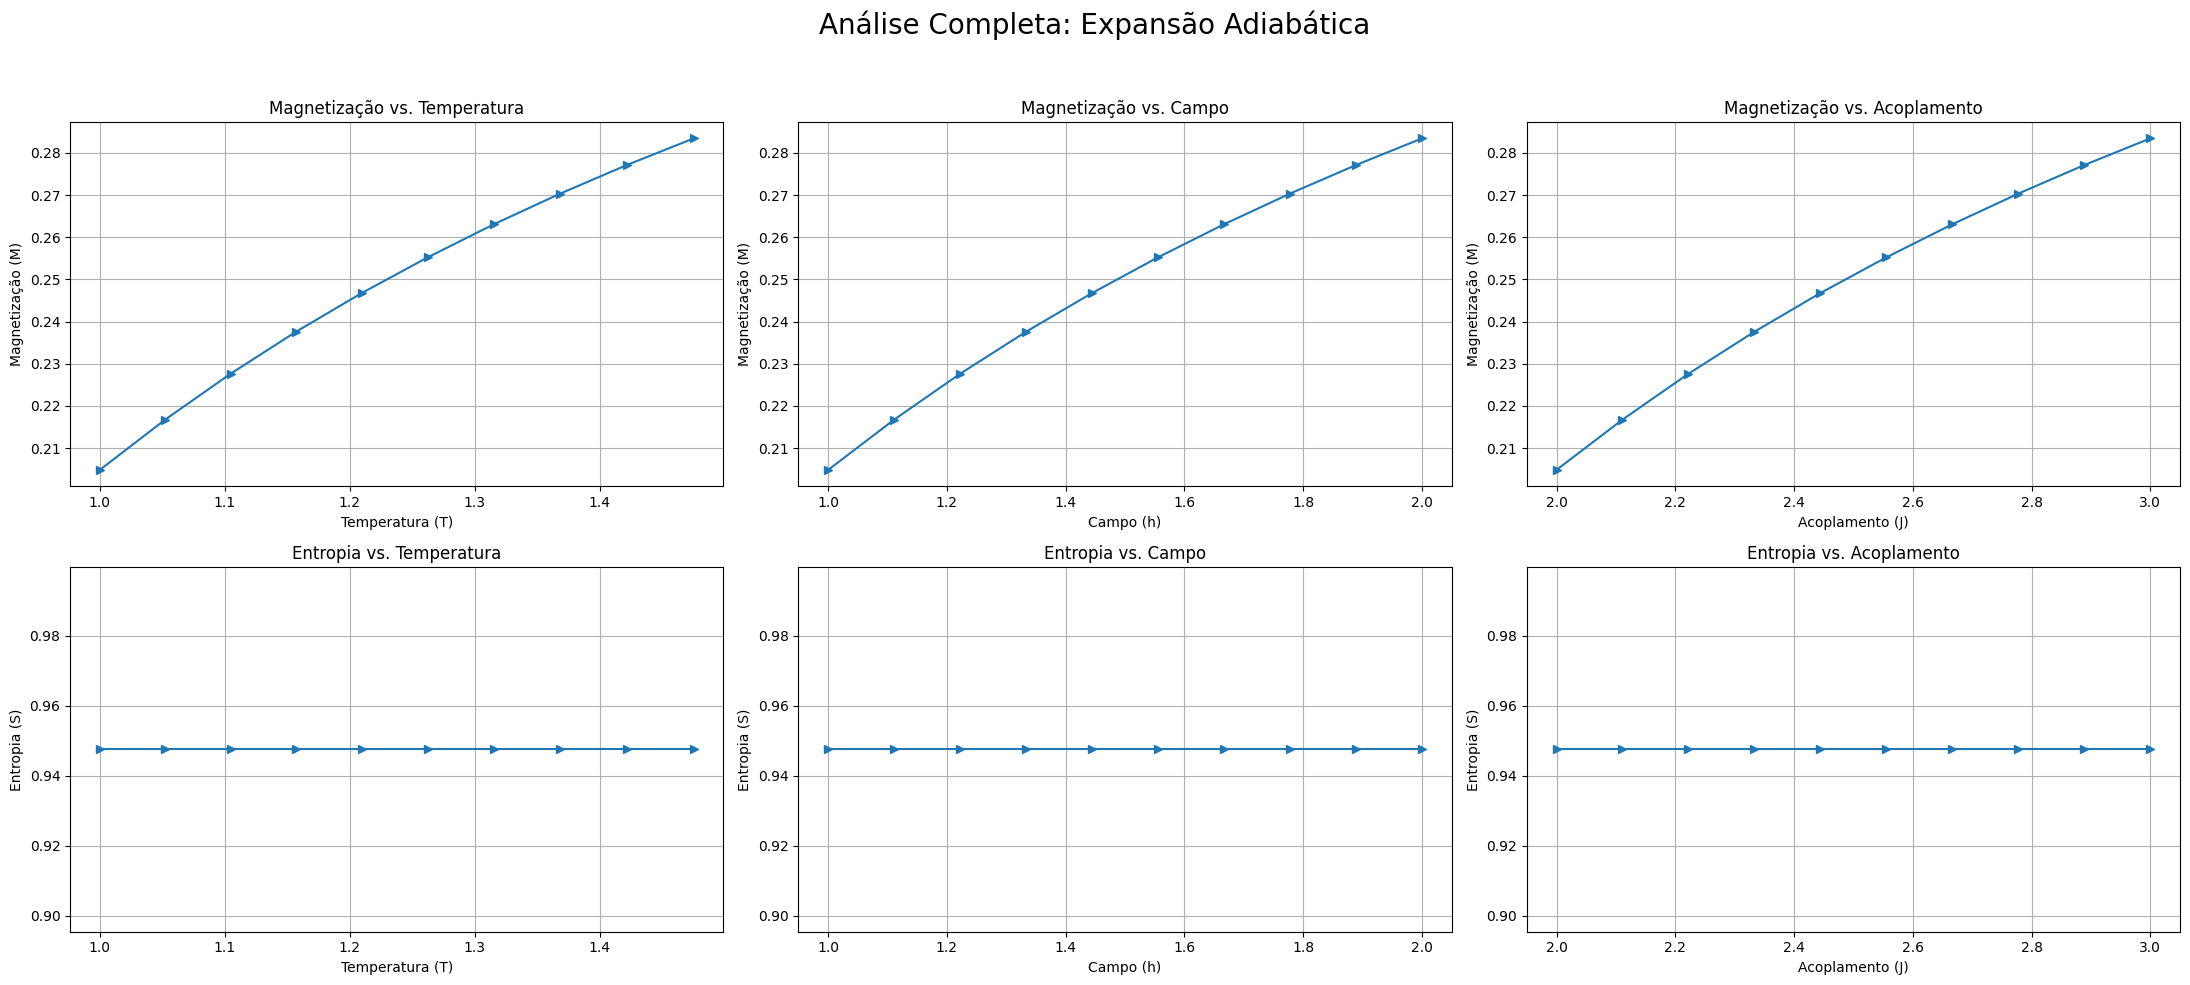

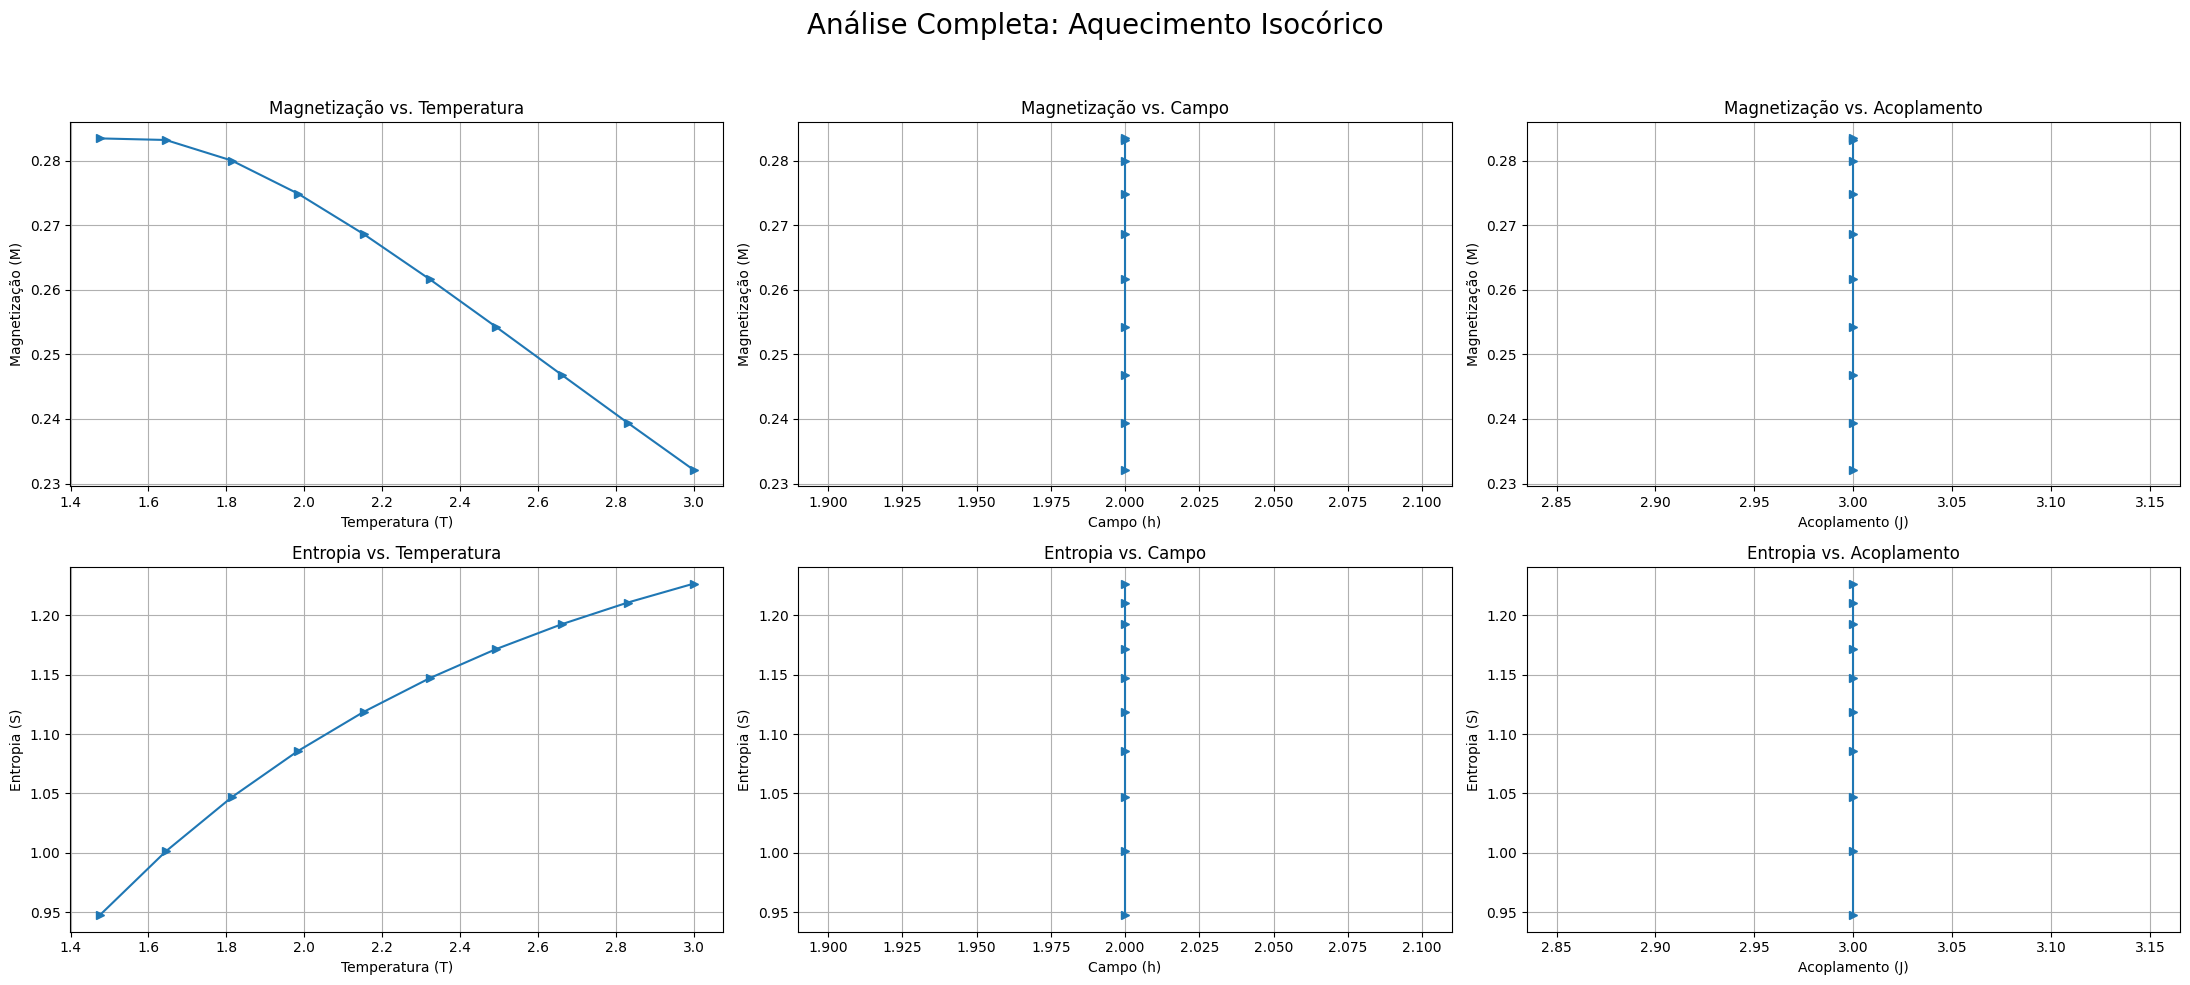

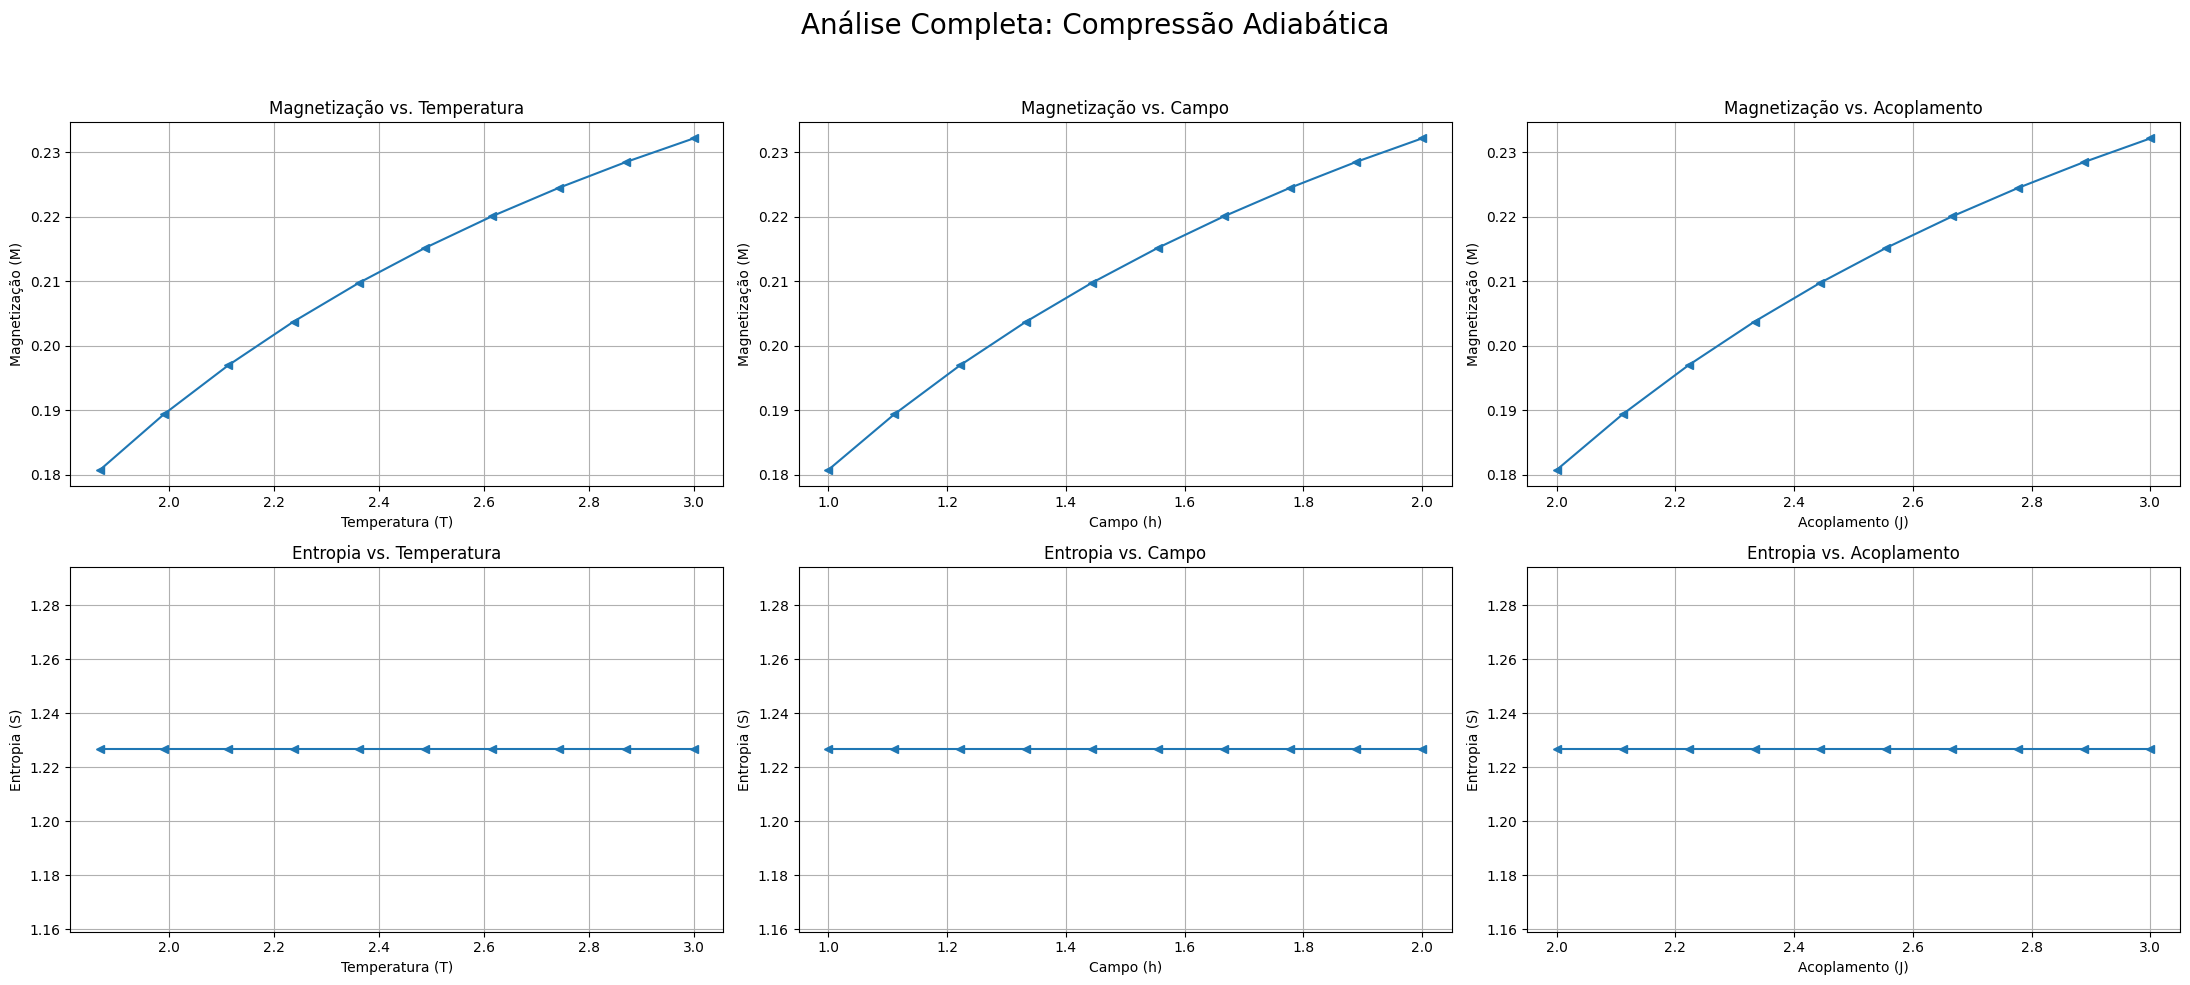

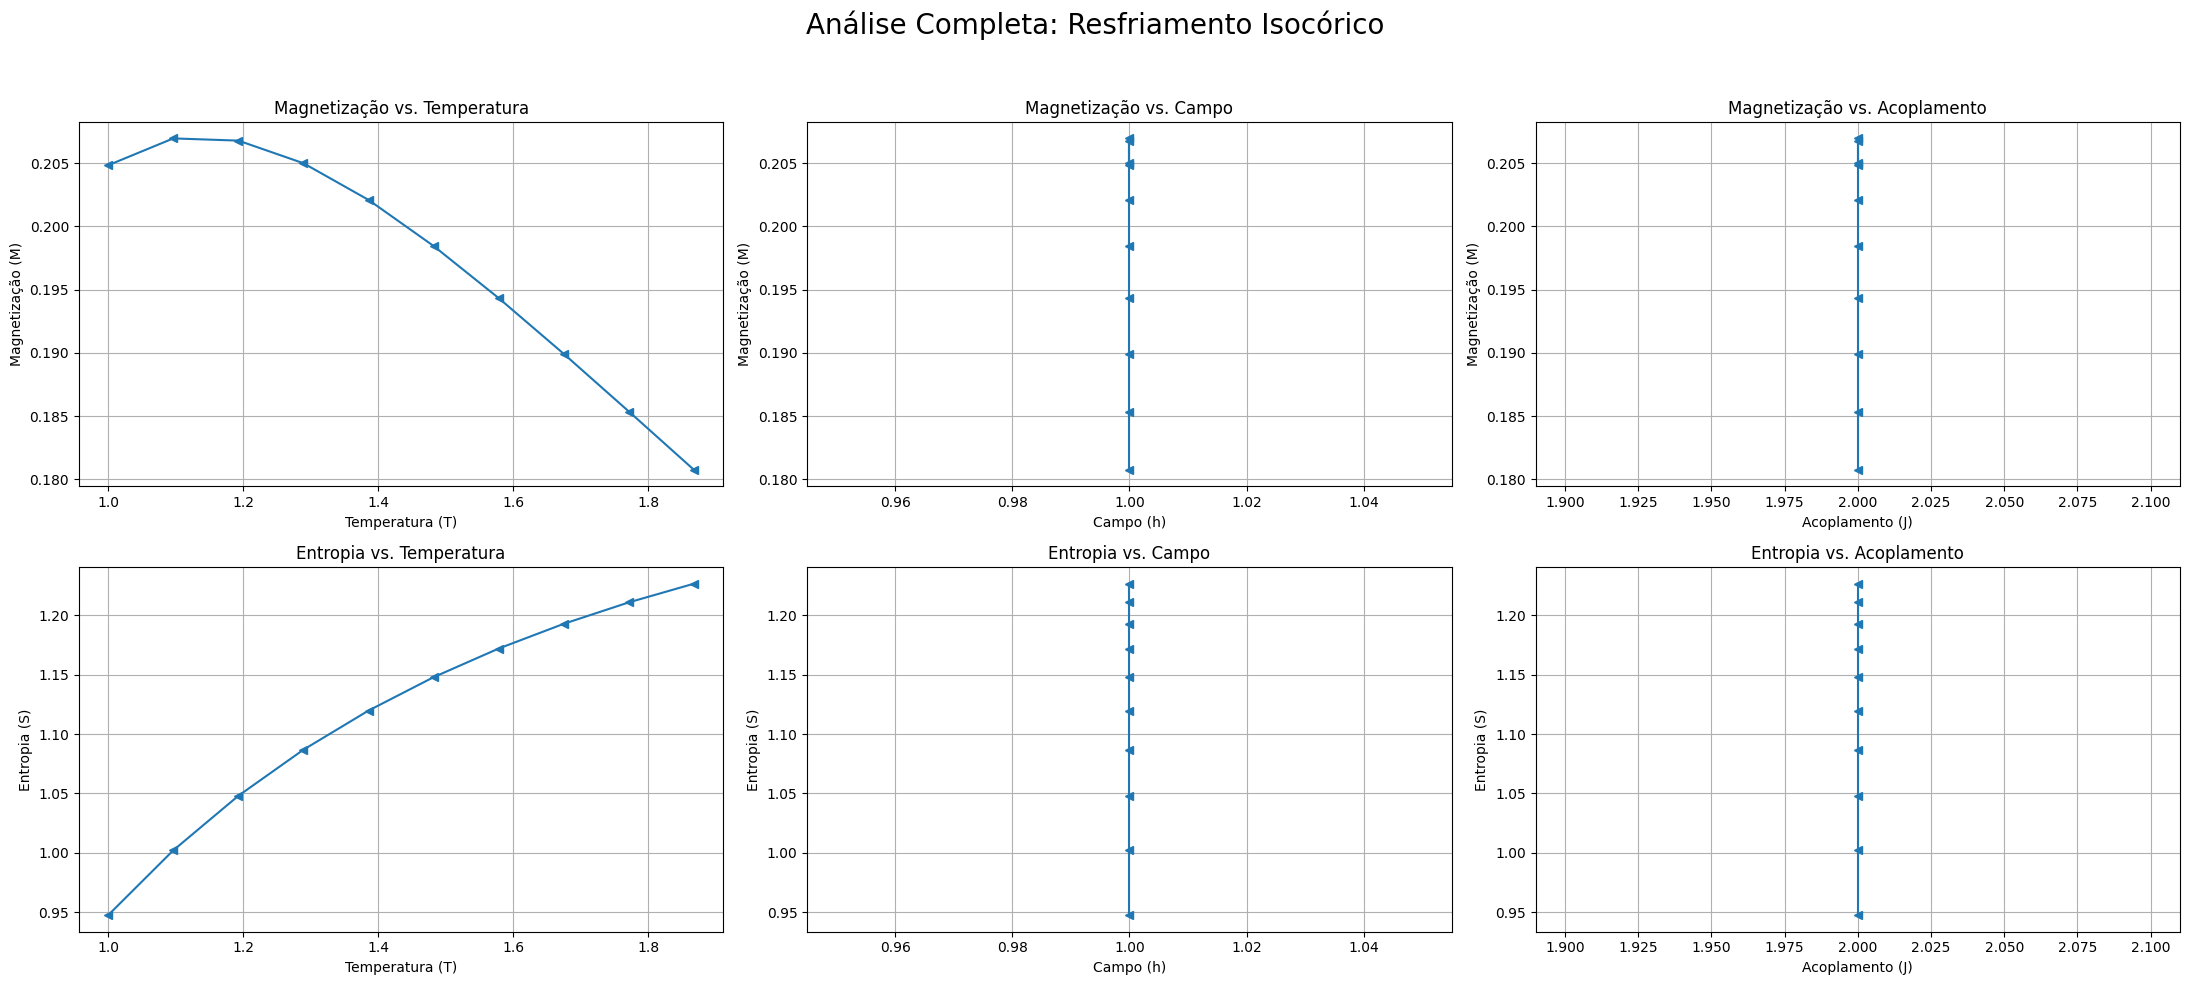

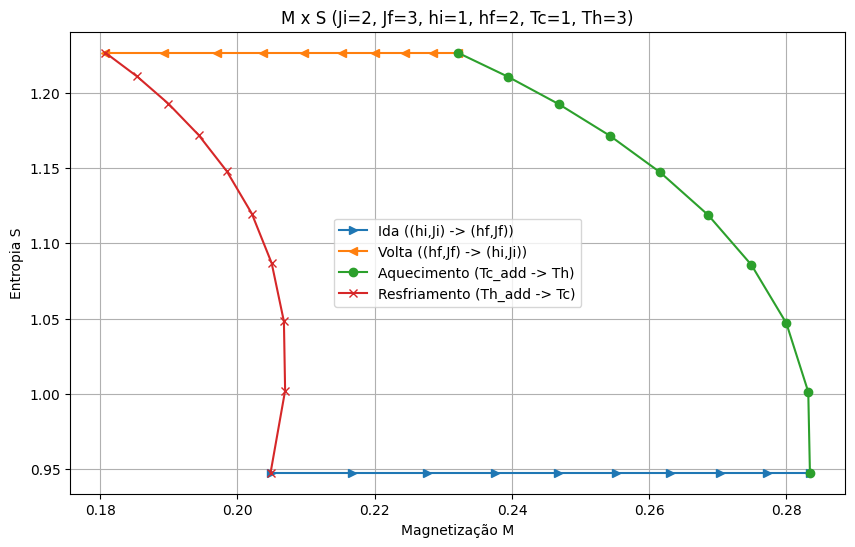

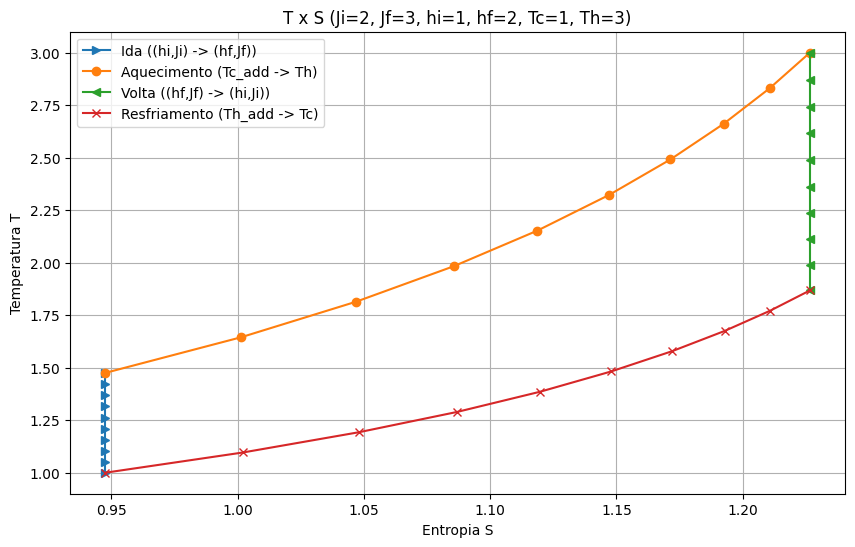

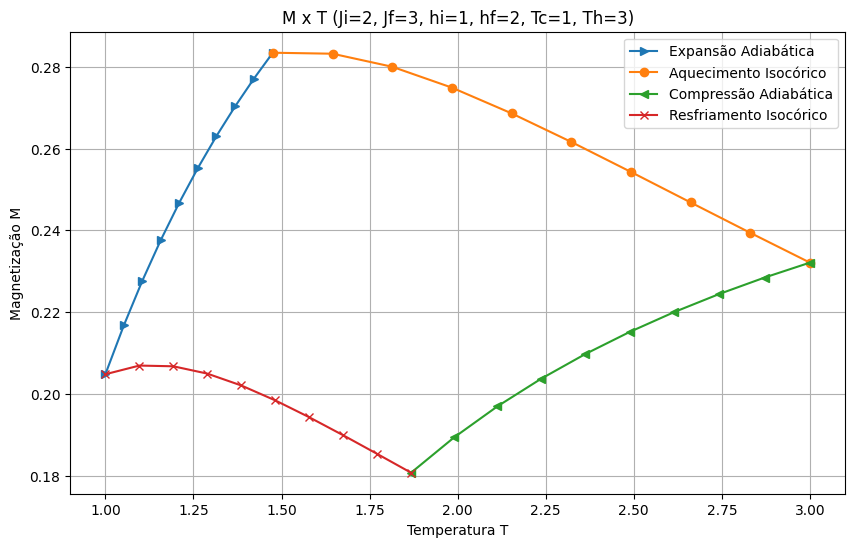

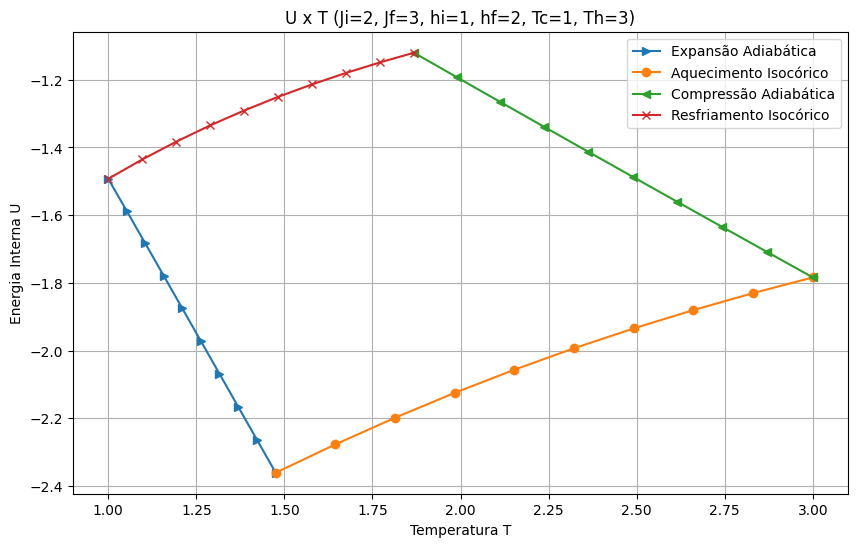

In [113]:
Ji = 2; Jf = 3; hi = 1; hf = 2; Tc = 1; Th = 3; PASSOS = 10

# Chamando a função principal para executar o ciclo
main(Ji, Jf, hi, hf, Tc, Th, PASSOS, True)

Temperatures Range:
1 -> 2 (Tc -> Tc_add): Tc: 1, Tc_add: [10.]
2 -> 3 (T_heating): Tc_add: [10.] Th: 10.101010101
3 -> 4 (Th -> Th_add): Th: 10.101010101, Th_add: [1.01010101]
4 -> 1 (T_cooling): Th_add: [1.01010101], Tc: 1
Máquina!
ETA = abs(W) /abs(Qhot) ETA=Eff???: [0.9]
Win: [6.67718768], Wout: [-6.70417215], Qint: [0.02998275], Qout: [-0.00299828], eff: [0.9]


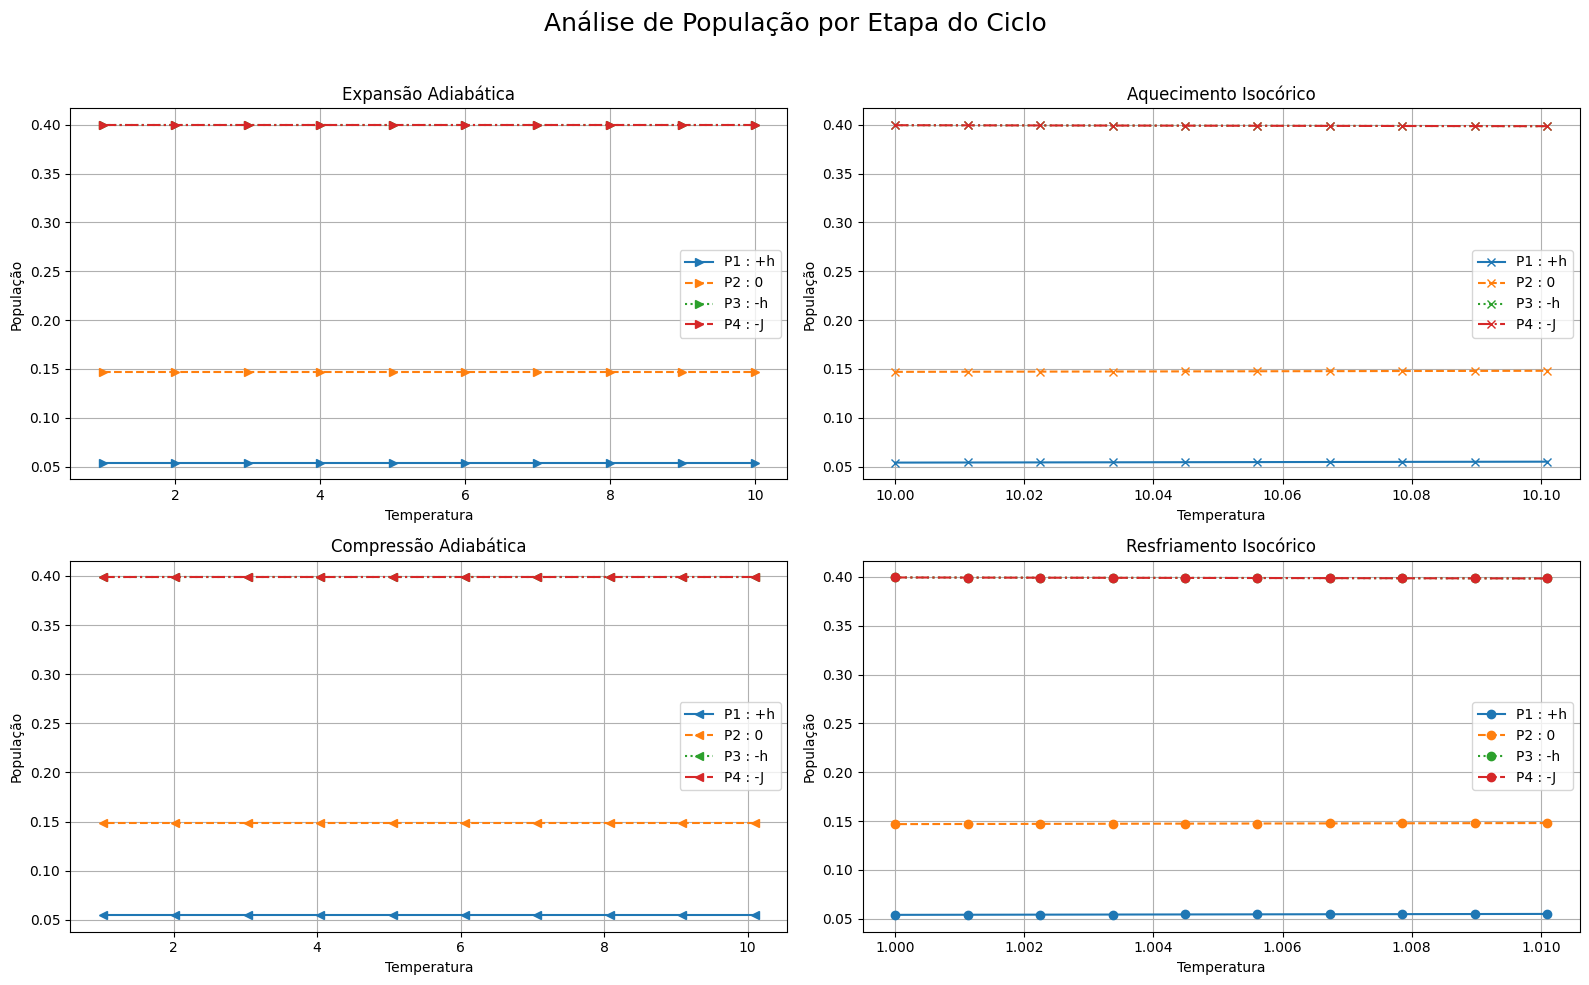

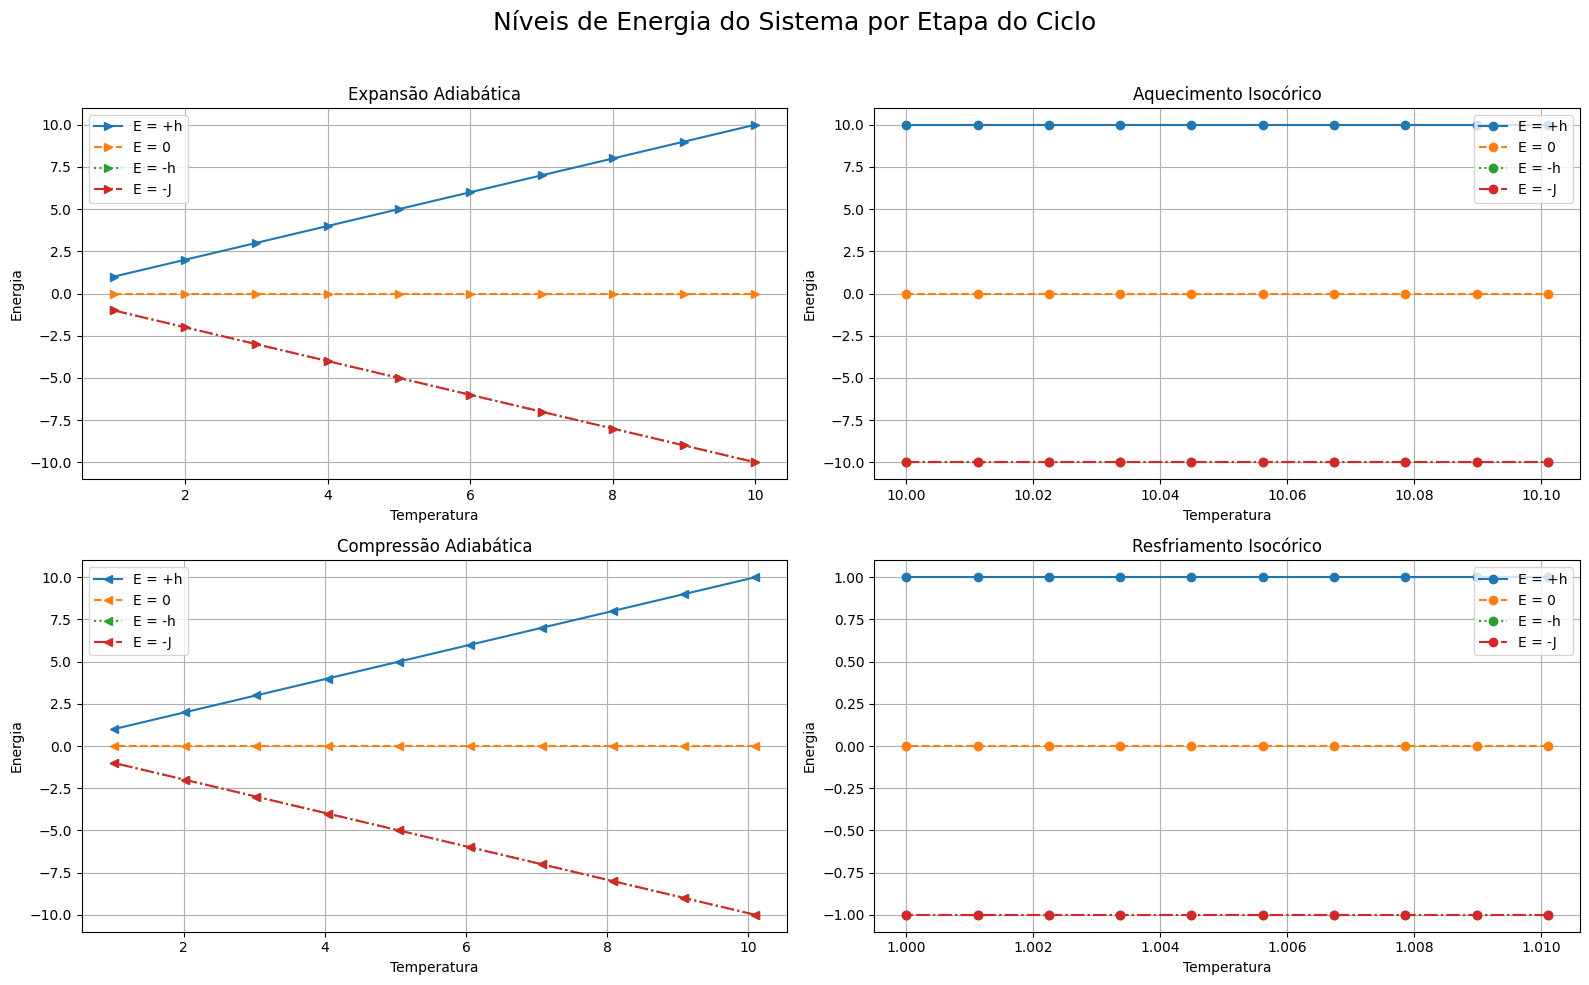

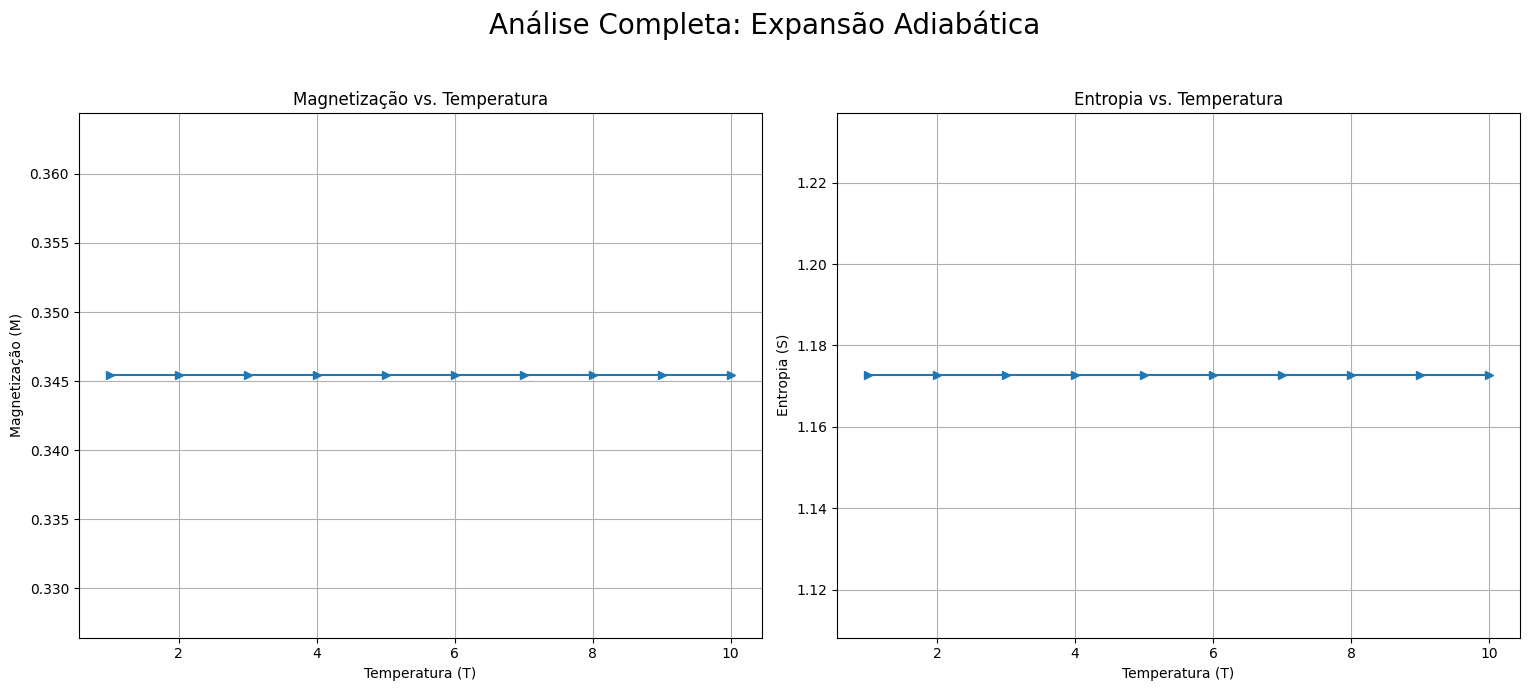

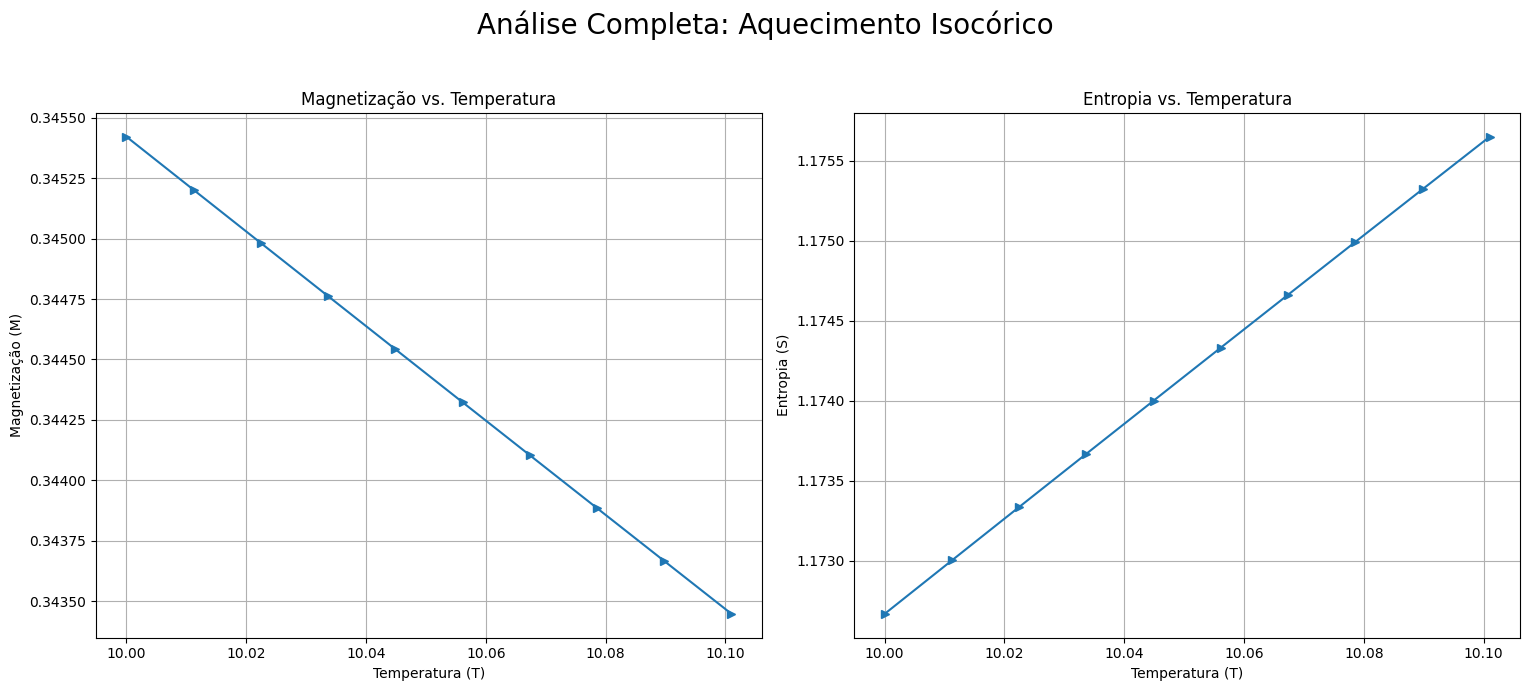

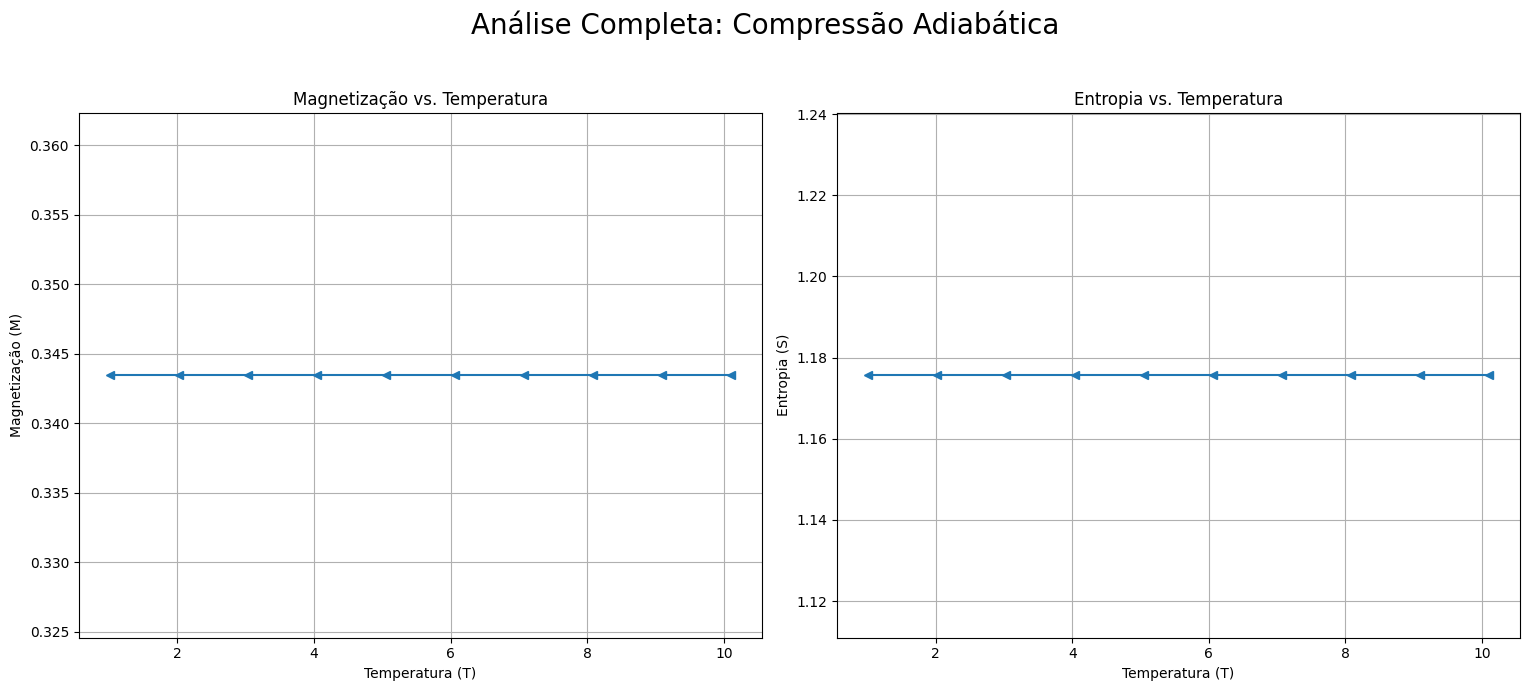

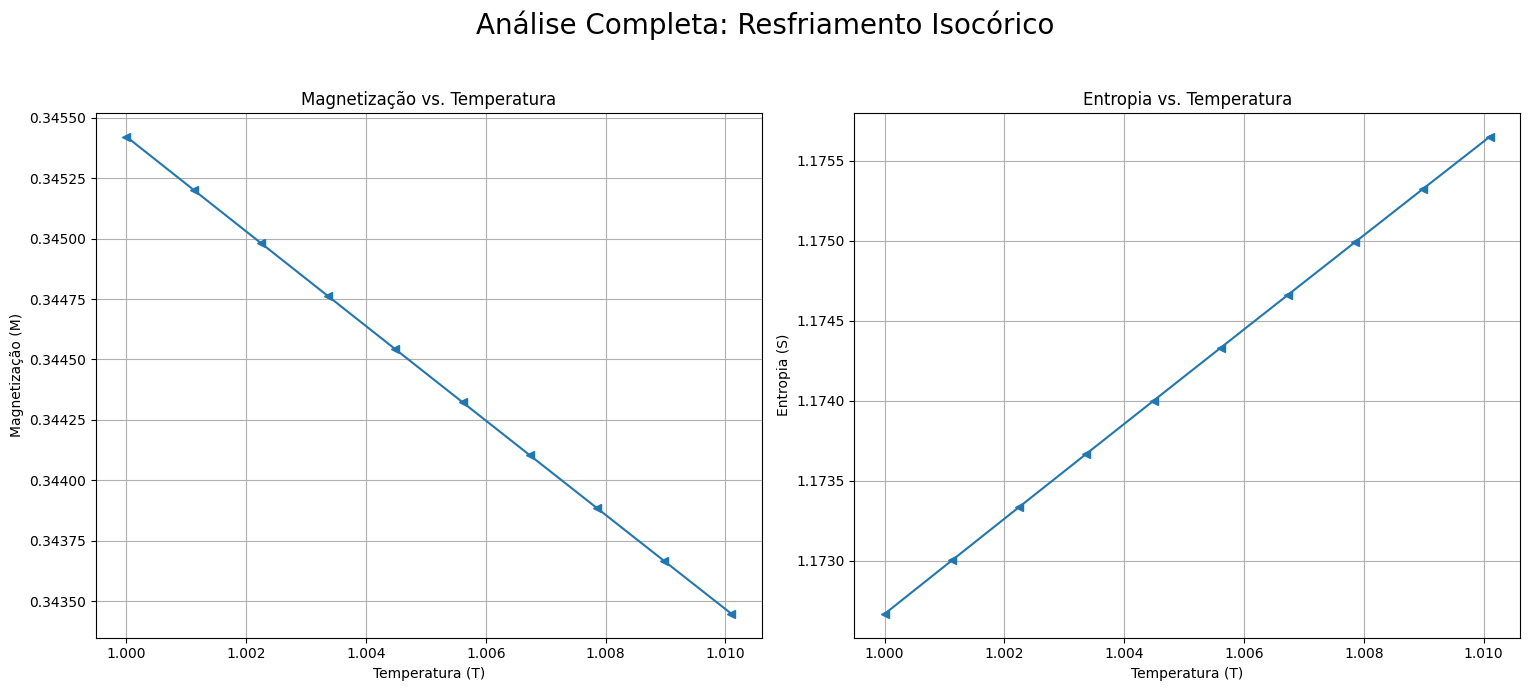

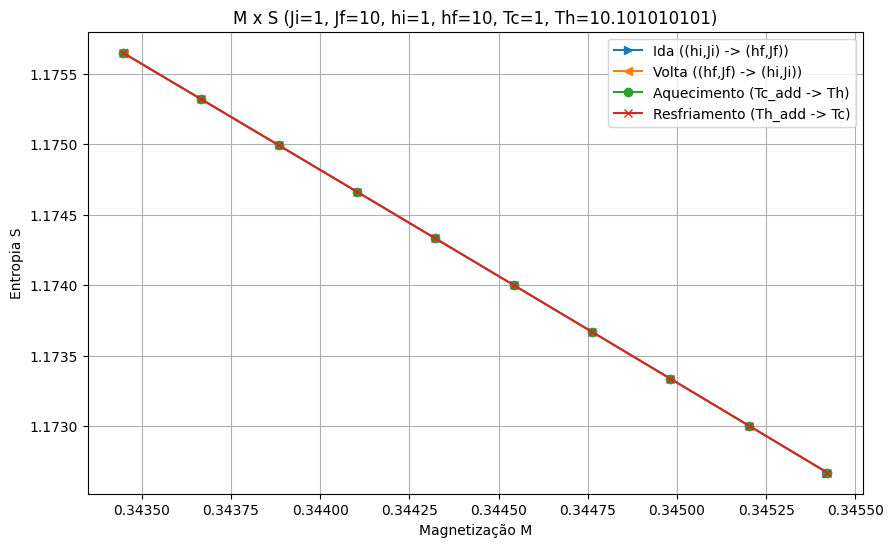

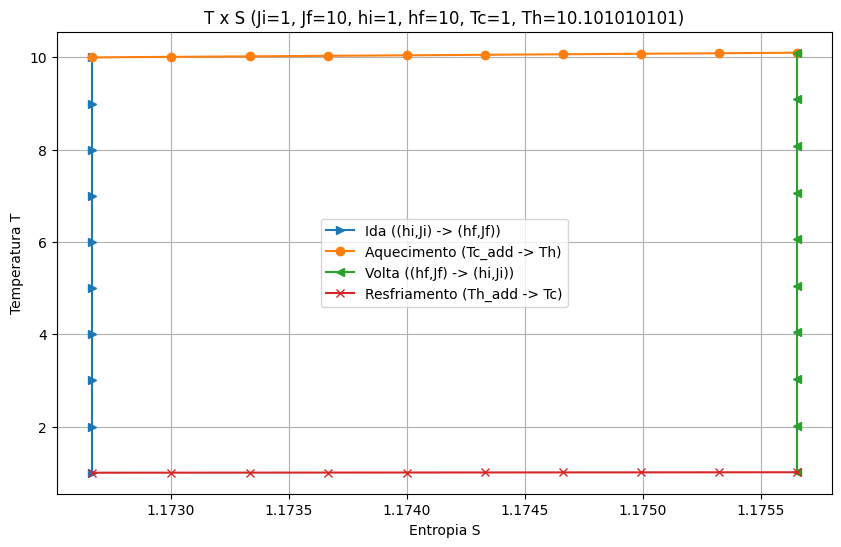

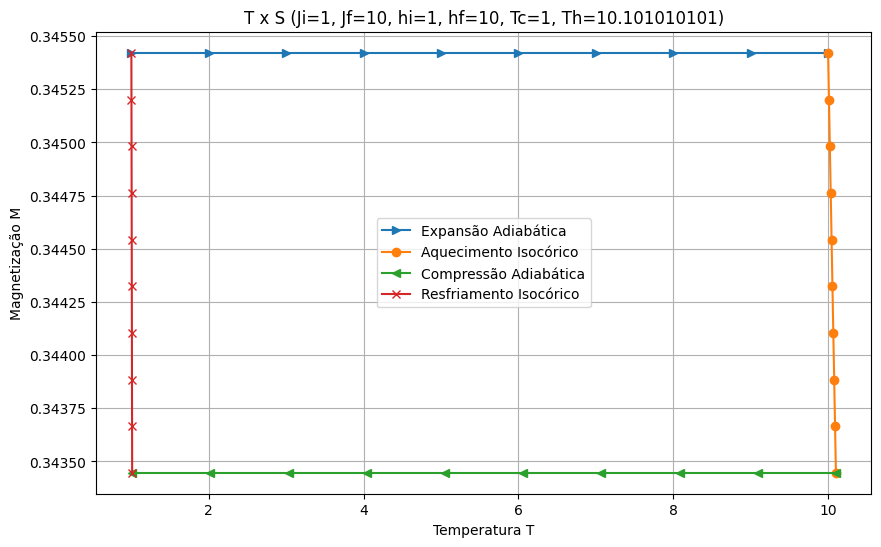

In [88]:
#Eficiencias interessantes....

#Ji = 1; Jf = 50 ;hi = 1; hf = 50; Tc = 1; Th = 50.5050505051; PASSOS = 10
#Ji = 1; Jf = 20 ;hi = 1; hf = 20; Tc = 1; Th = 20.20202020; PASSOS = 10
Ji = 1; Jf = 10 ;hi = 1; hf = 10; Tc = 1; Th = 10.1010101010; PASSOS = 10


#if True: plota todos os grafícos dos processos Mx(T,h,J) e Sx(T,h,J)
#ifelse False: plota apenas os gráficos de Mx(T) e Sx(T)
detalhe = False

# Chamando a função principal para executar o ciclo
main(Ji, Jf, hi, hf, Tc, Th, PASSOS, detalhe)

Temperatures Range:
1 -> 2 (Tc -> Tc_add): Tc: 1, Tc_add: [2.]
2 -> 3 (T_heating): Tc_add: [2.] Th: 3
3 -> 4 (Th -> Th_add): Th: 3, Th_add: [1.5]
4 -> 1 (T_cooling): Th_add: [1.5], Tc: 1
Máquina!
ETA = abs(W) /abs(Qhot) ETA=Eff???: [0.5]
Win: [0.6252769], Wout: [-0.74490802], Qint: [0.23926224], Qout: [-0.11963112], eff: [0.5]


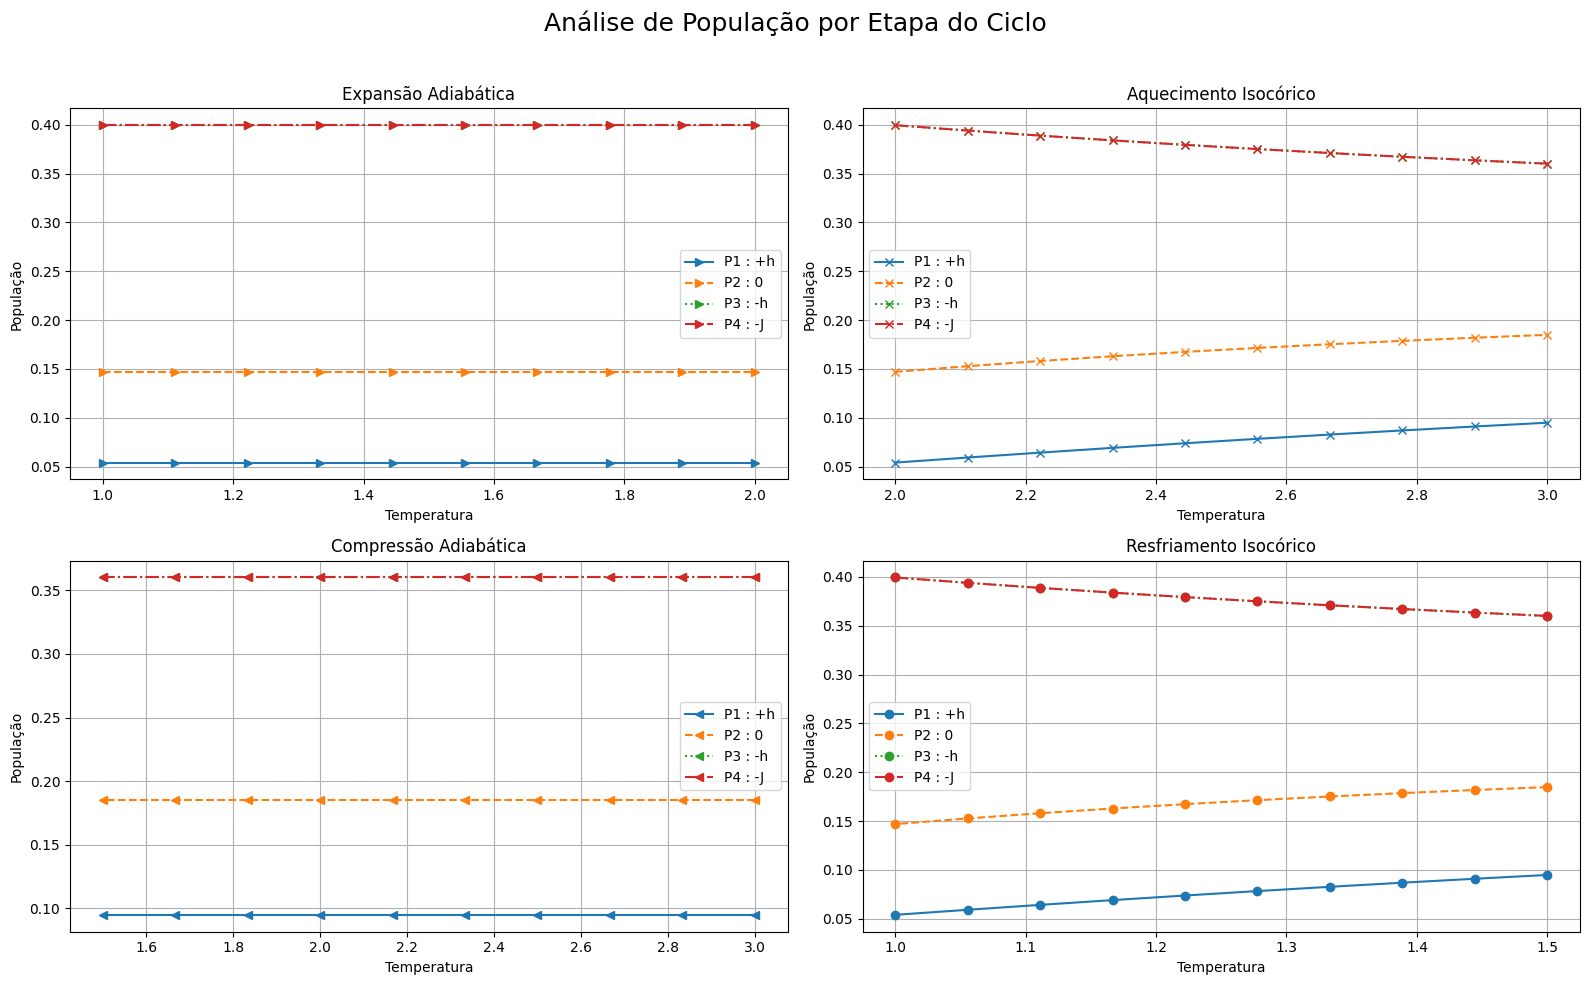

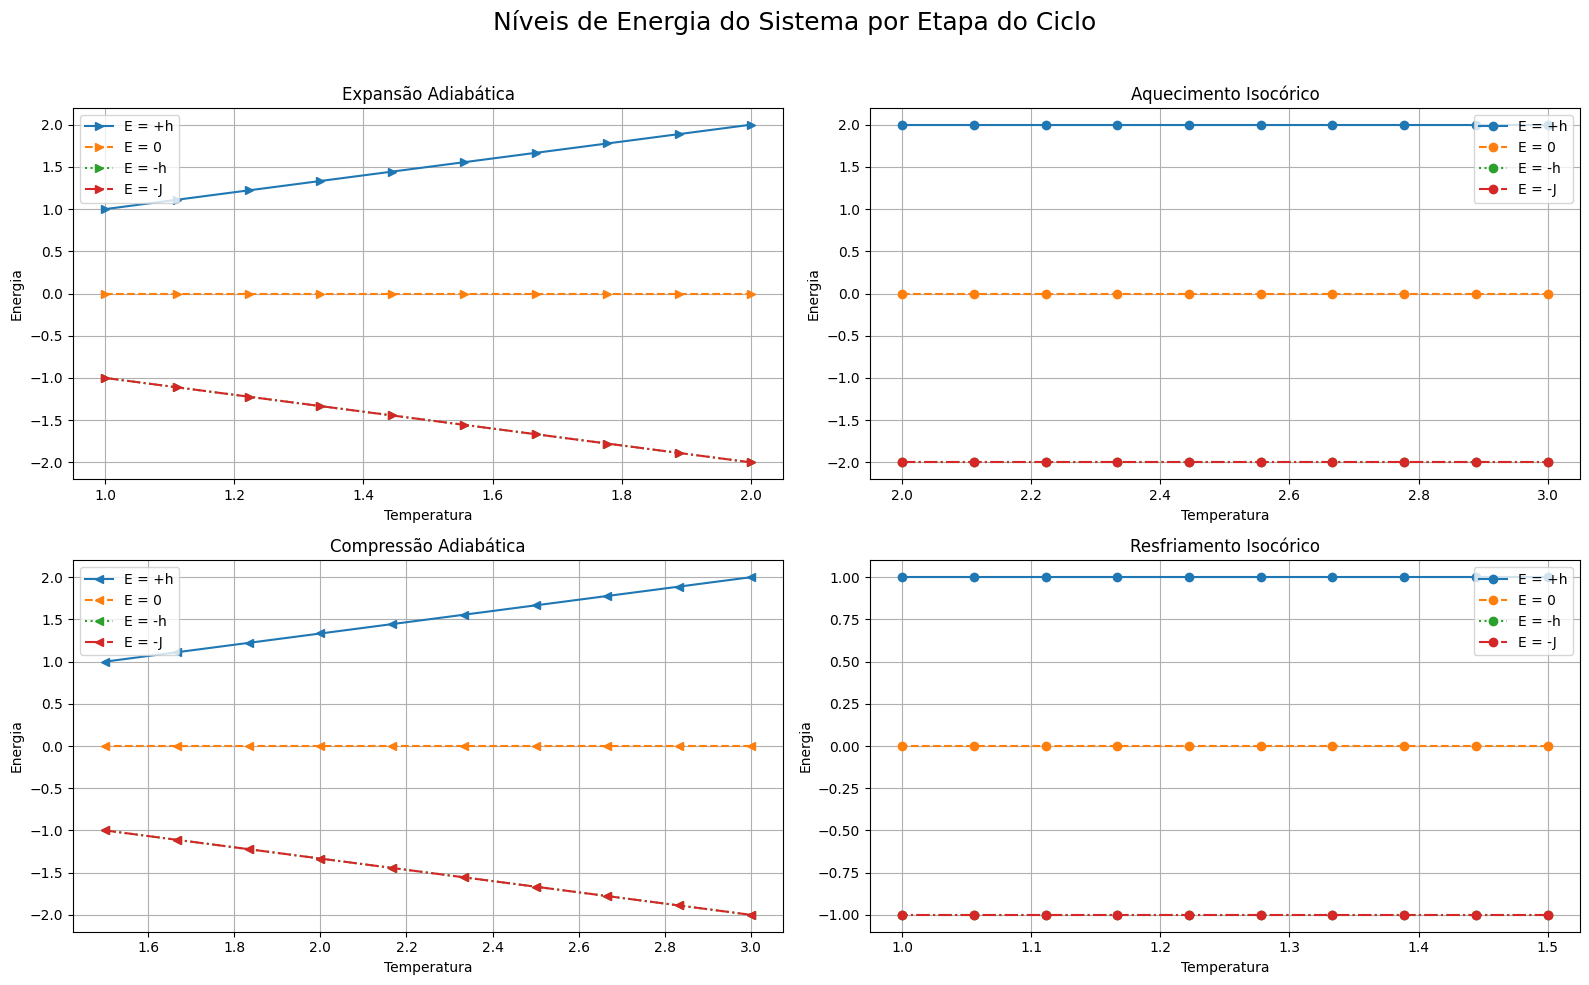

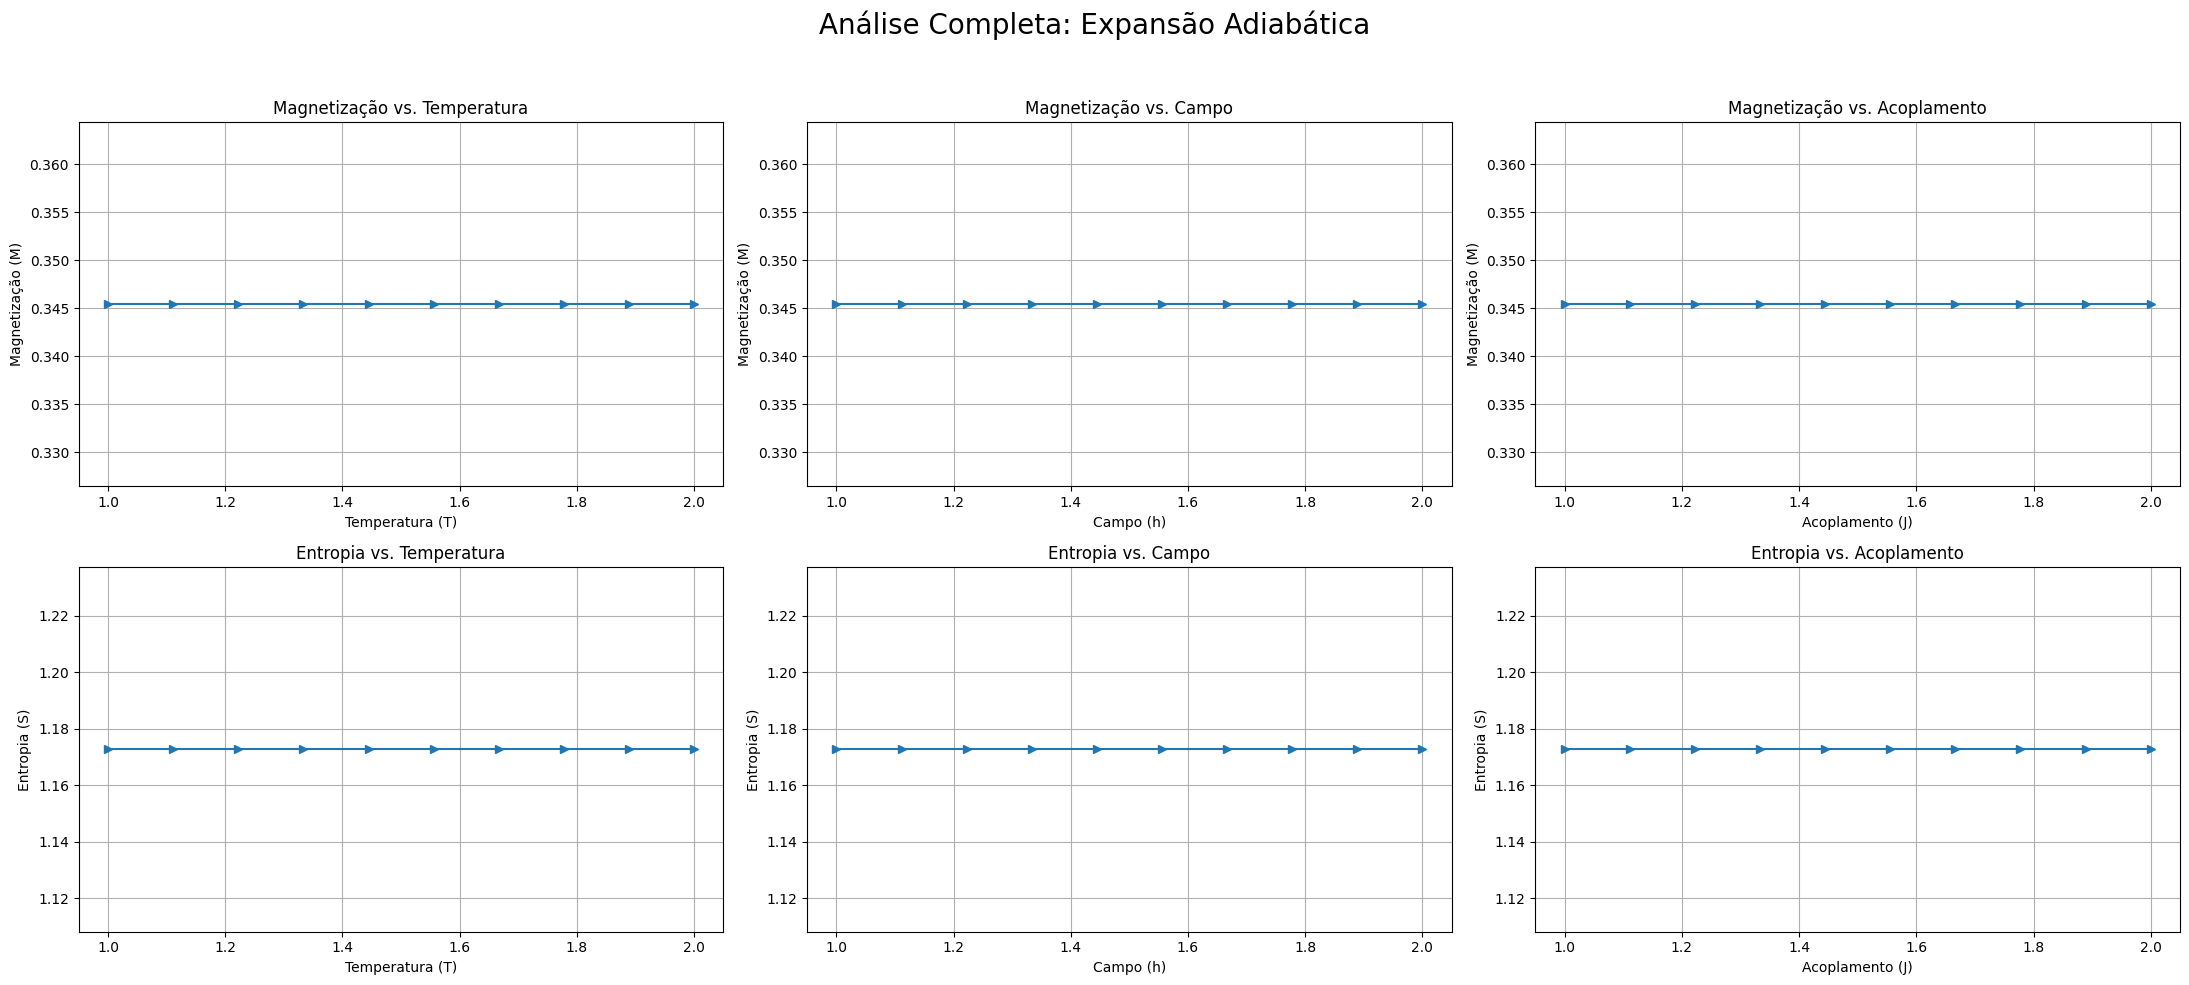

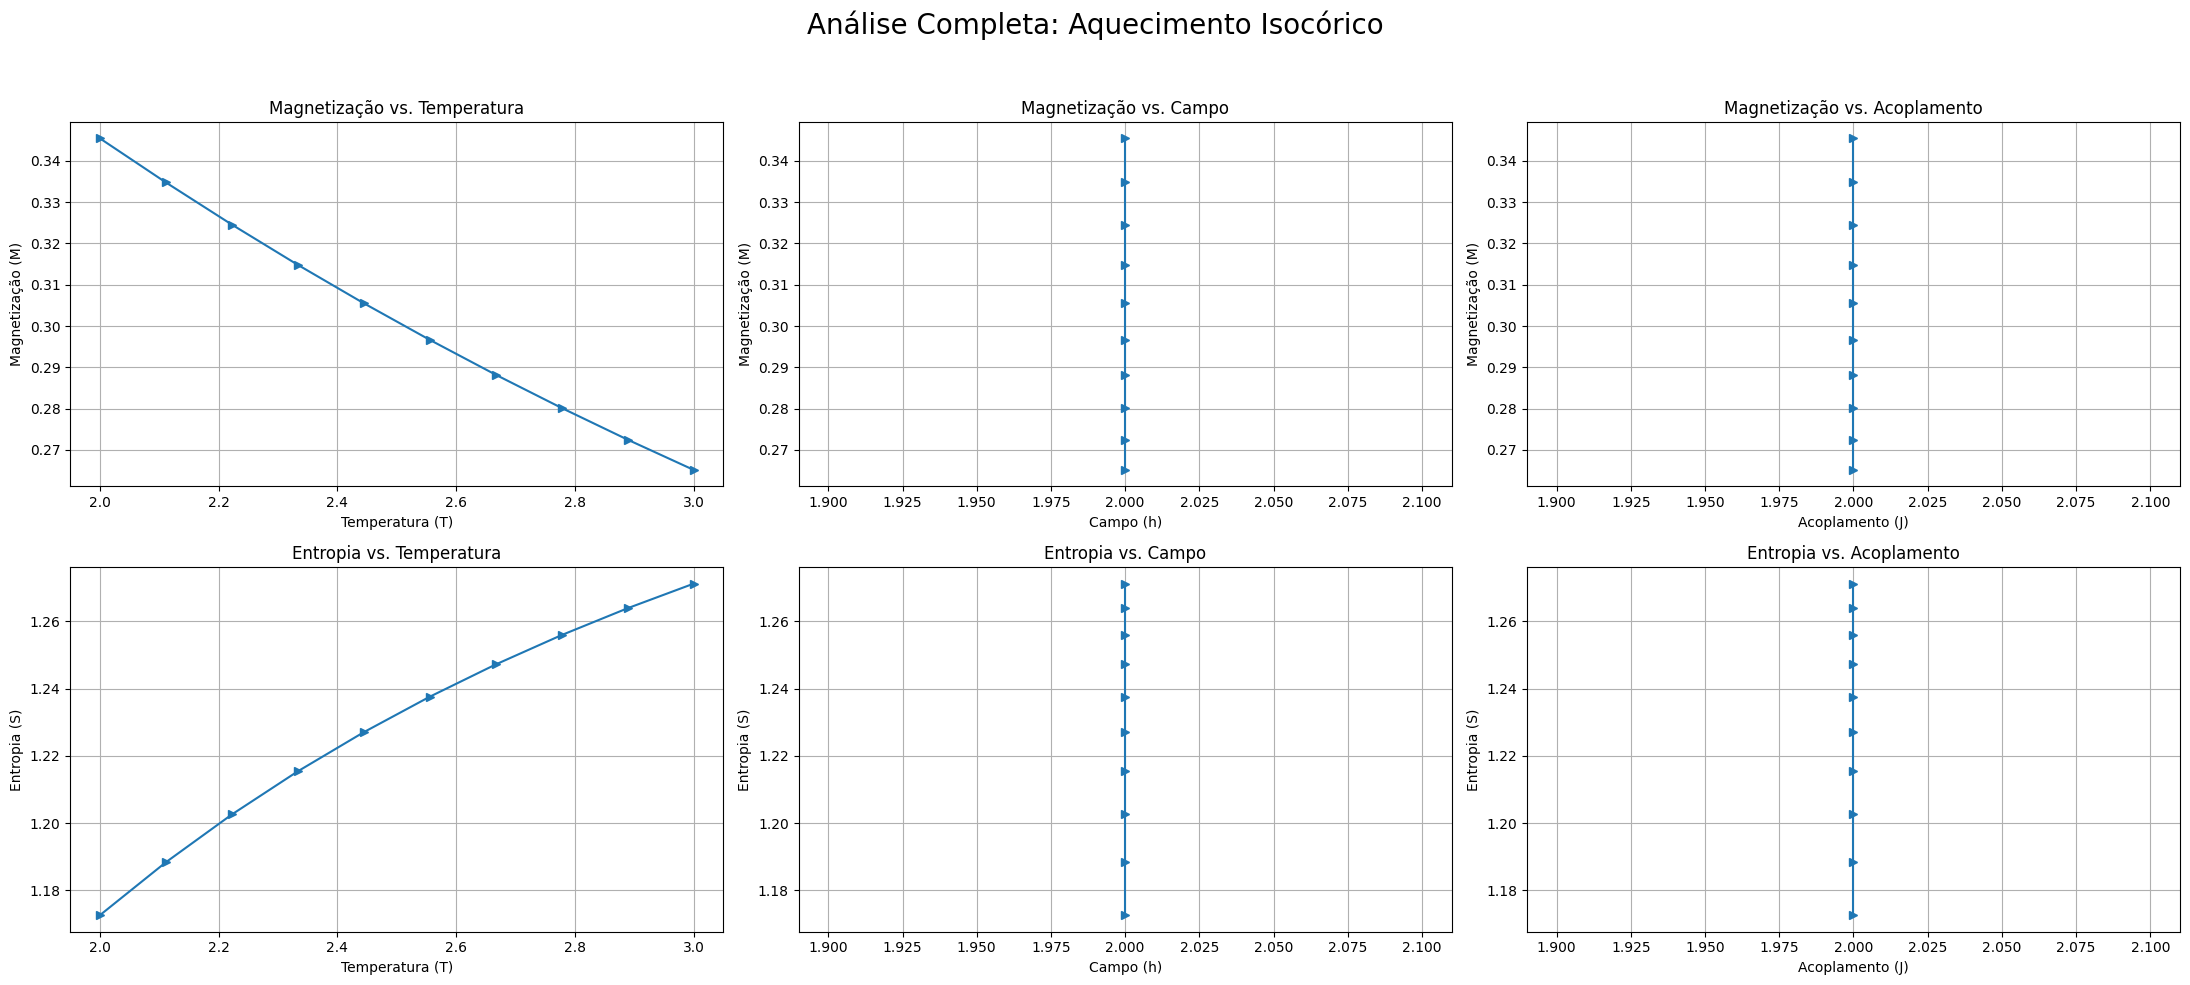

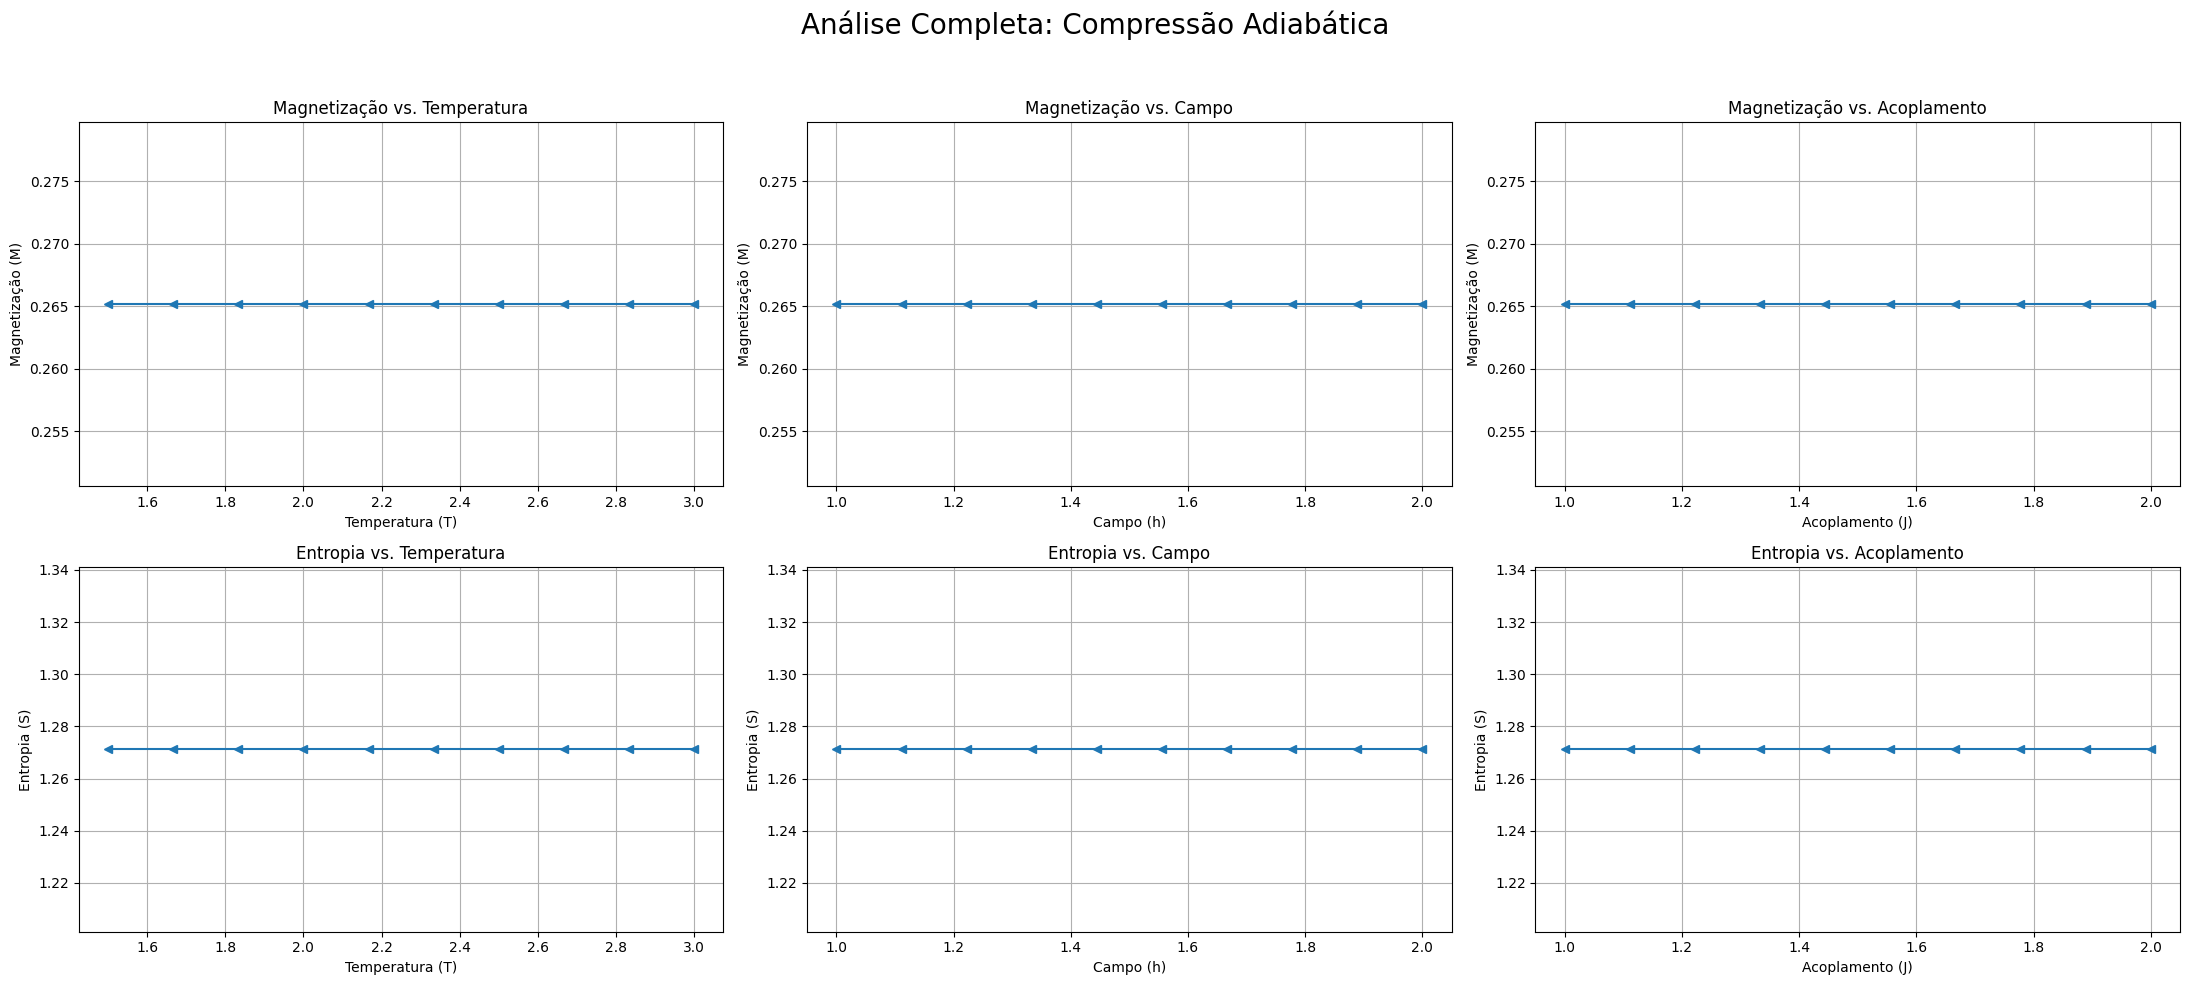

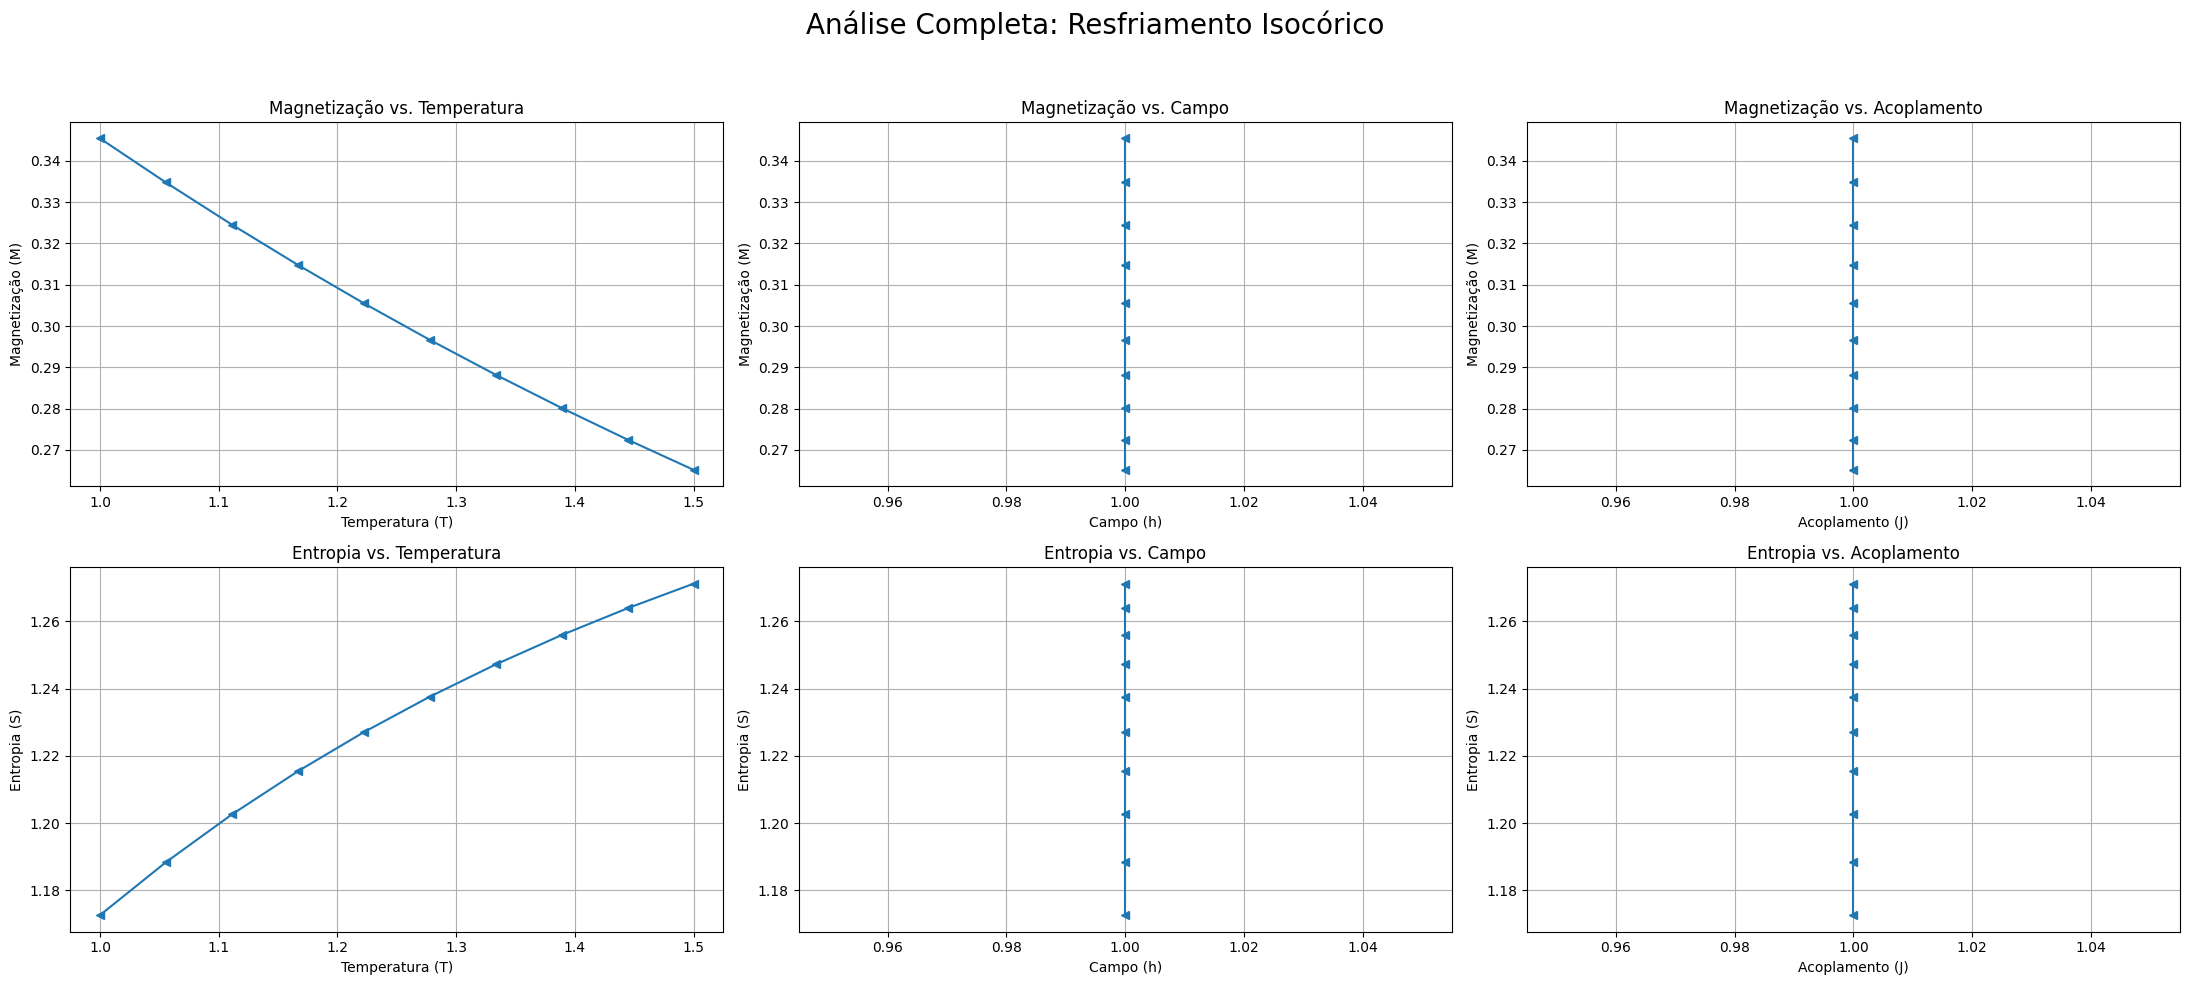

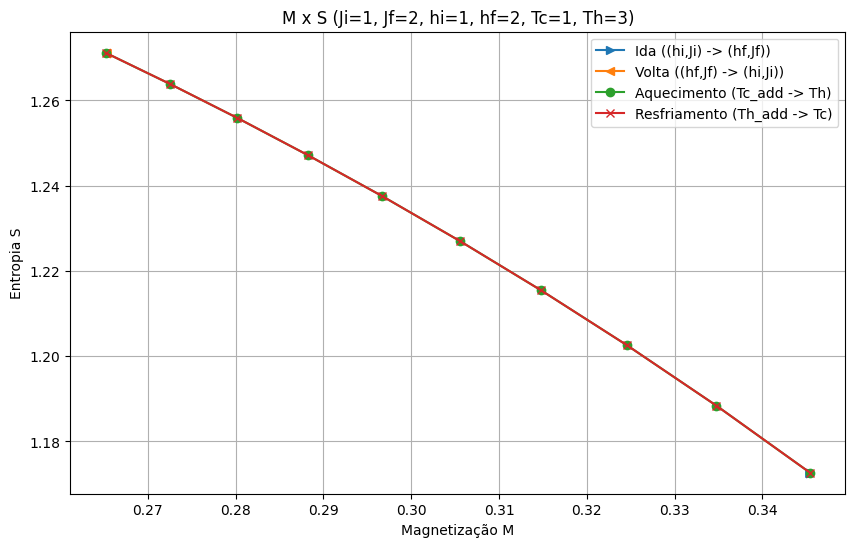

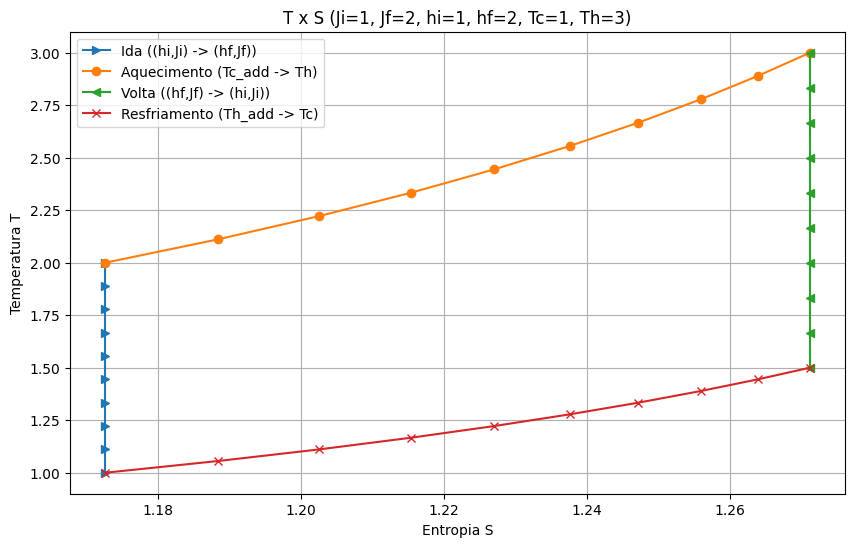

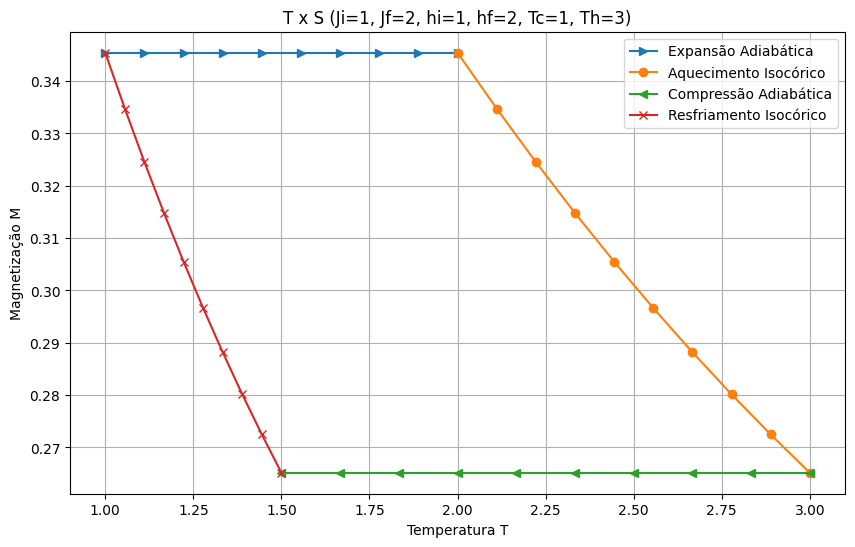

In [91]:
Ji = 1; Jf = 2; hi = 1; hf = 2; Tc = 1; Th = 3; PASSOS = 10

# Chamando a função principal para executar o ciclo
main(Ji, Jf, hi, hf, Tc, Th, PASSOS, True)

Temperatures Range:
1 -> 2 (Tc -> Tc_add): Tc: 1, Tc_add: [2.52958085]
2 -> 3 (T_heating): Tc_add: [2.52958085] Th: 20
3 -> 4 (Th -> Th_add): Th: 20, Th_add: [8.55539892]
4 -> 1 (T_cooling): Th_add: [8.55539892], Tc: 1
eff = -(Wout + Win)/abs(Qin)
Máquina!
W = Win + Wout
ETA = abs(W) /abs(Qhot) ETA=Eff???: [0.58714467]
Win: [0.9428912], Wout: [-2.14761202], Qin: [2.05182962], Qout: [-0.8471088], eff: [0.58714467]


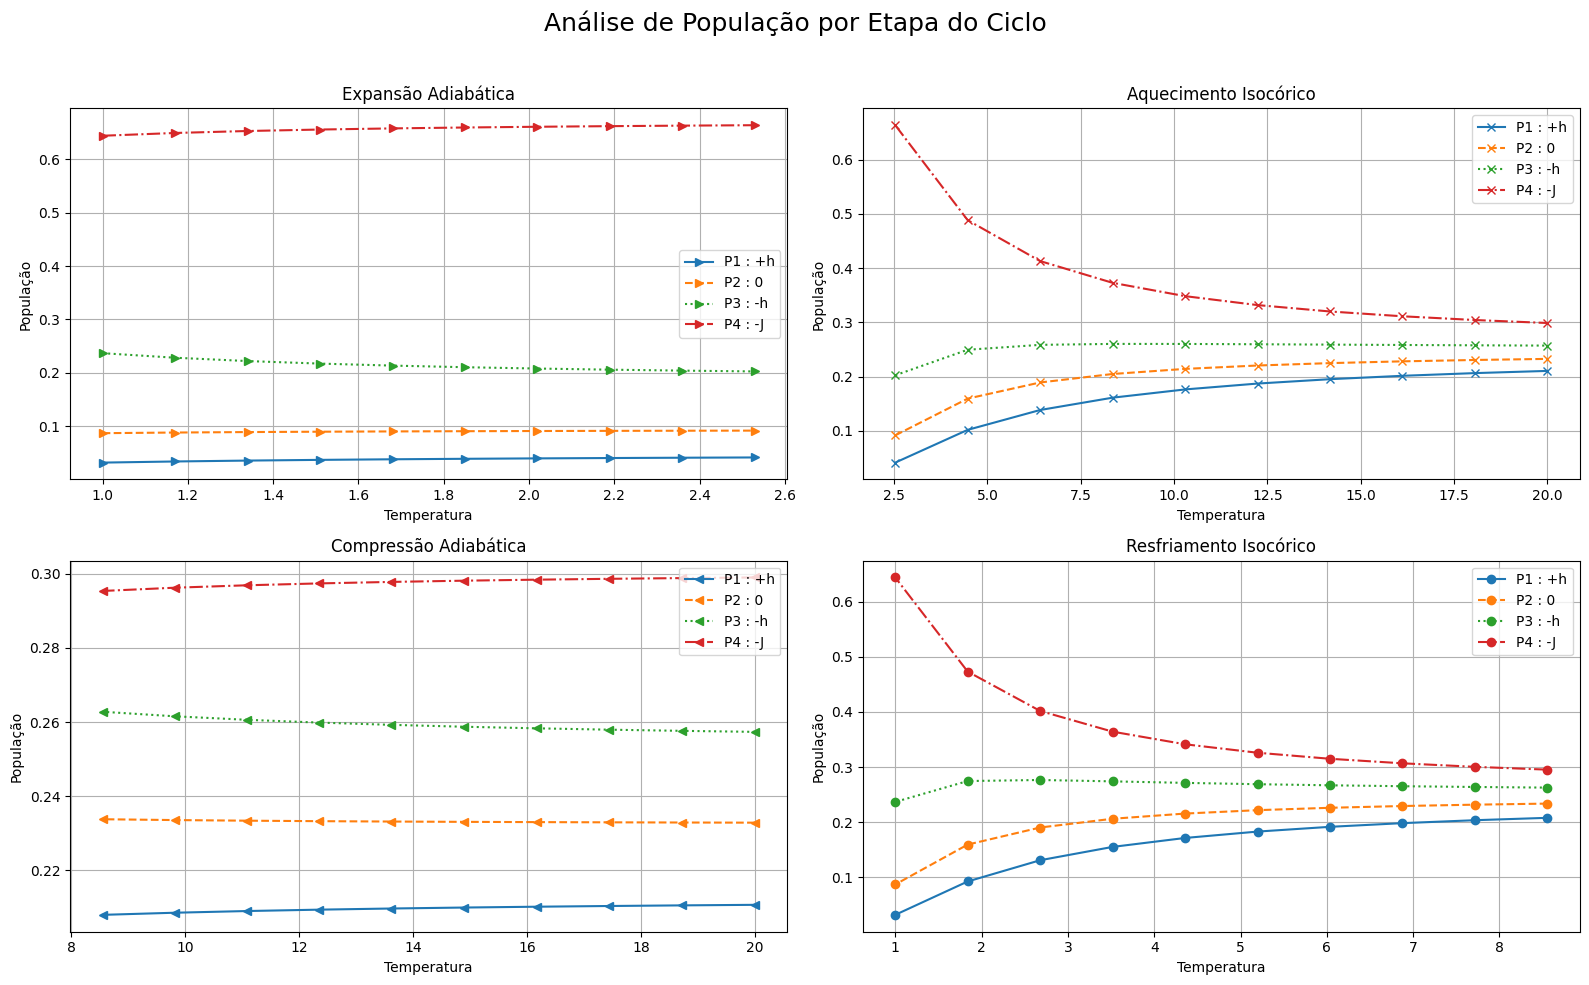

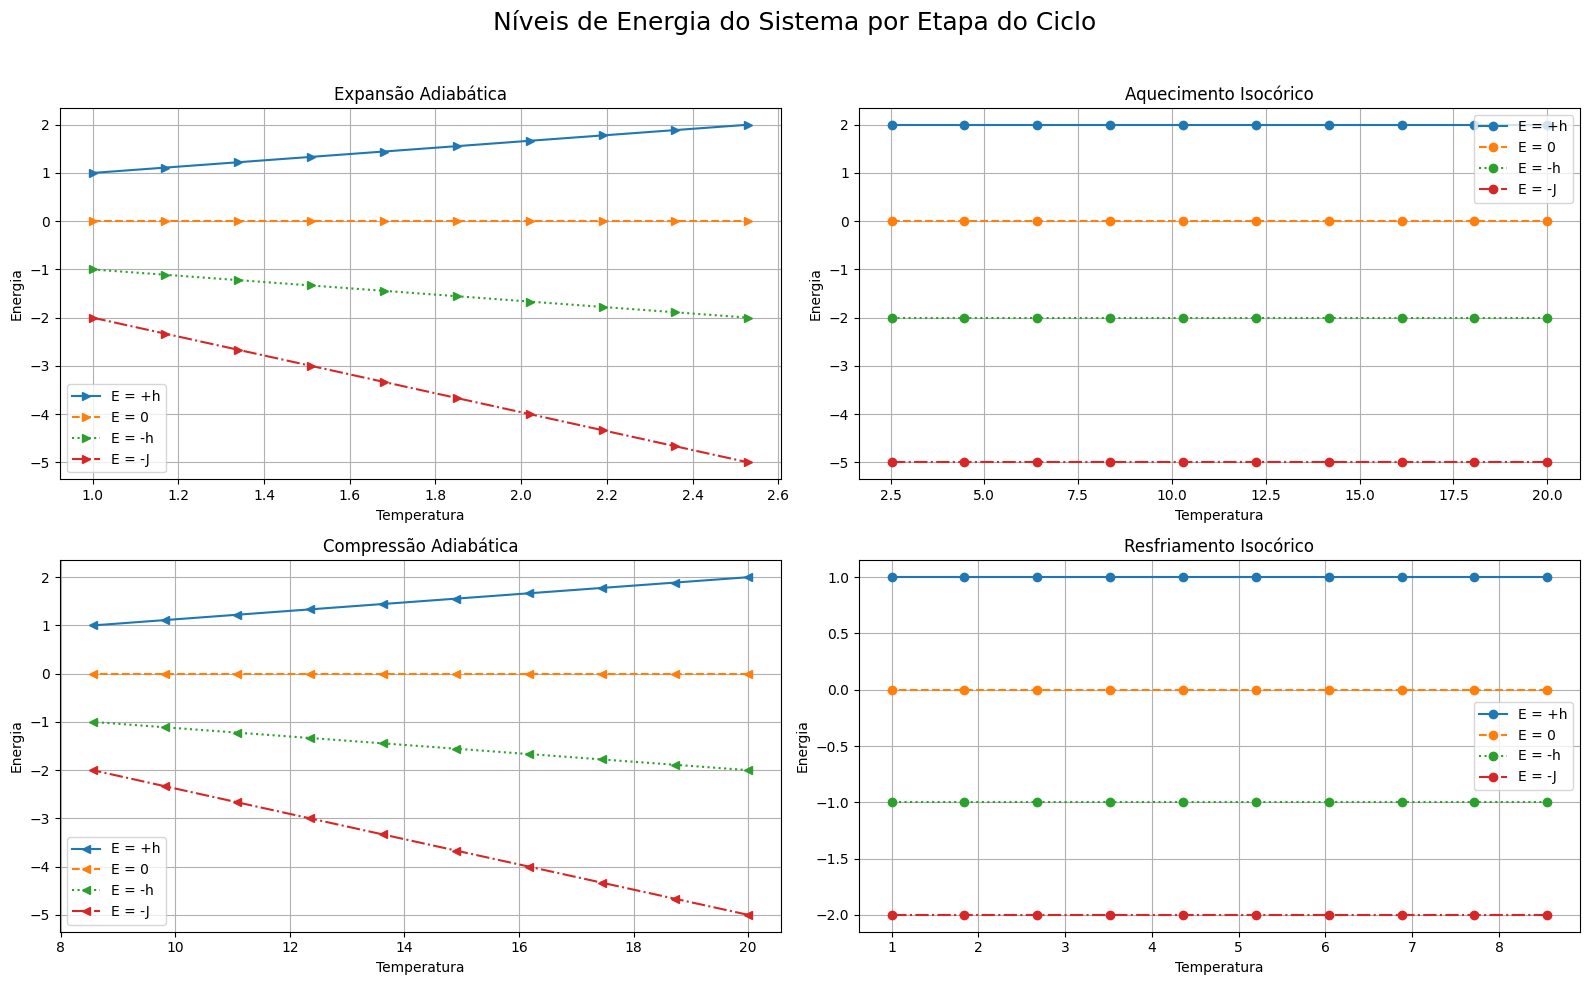

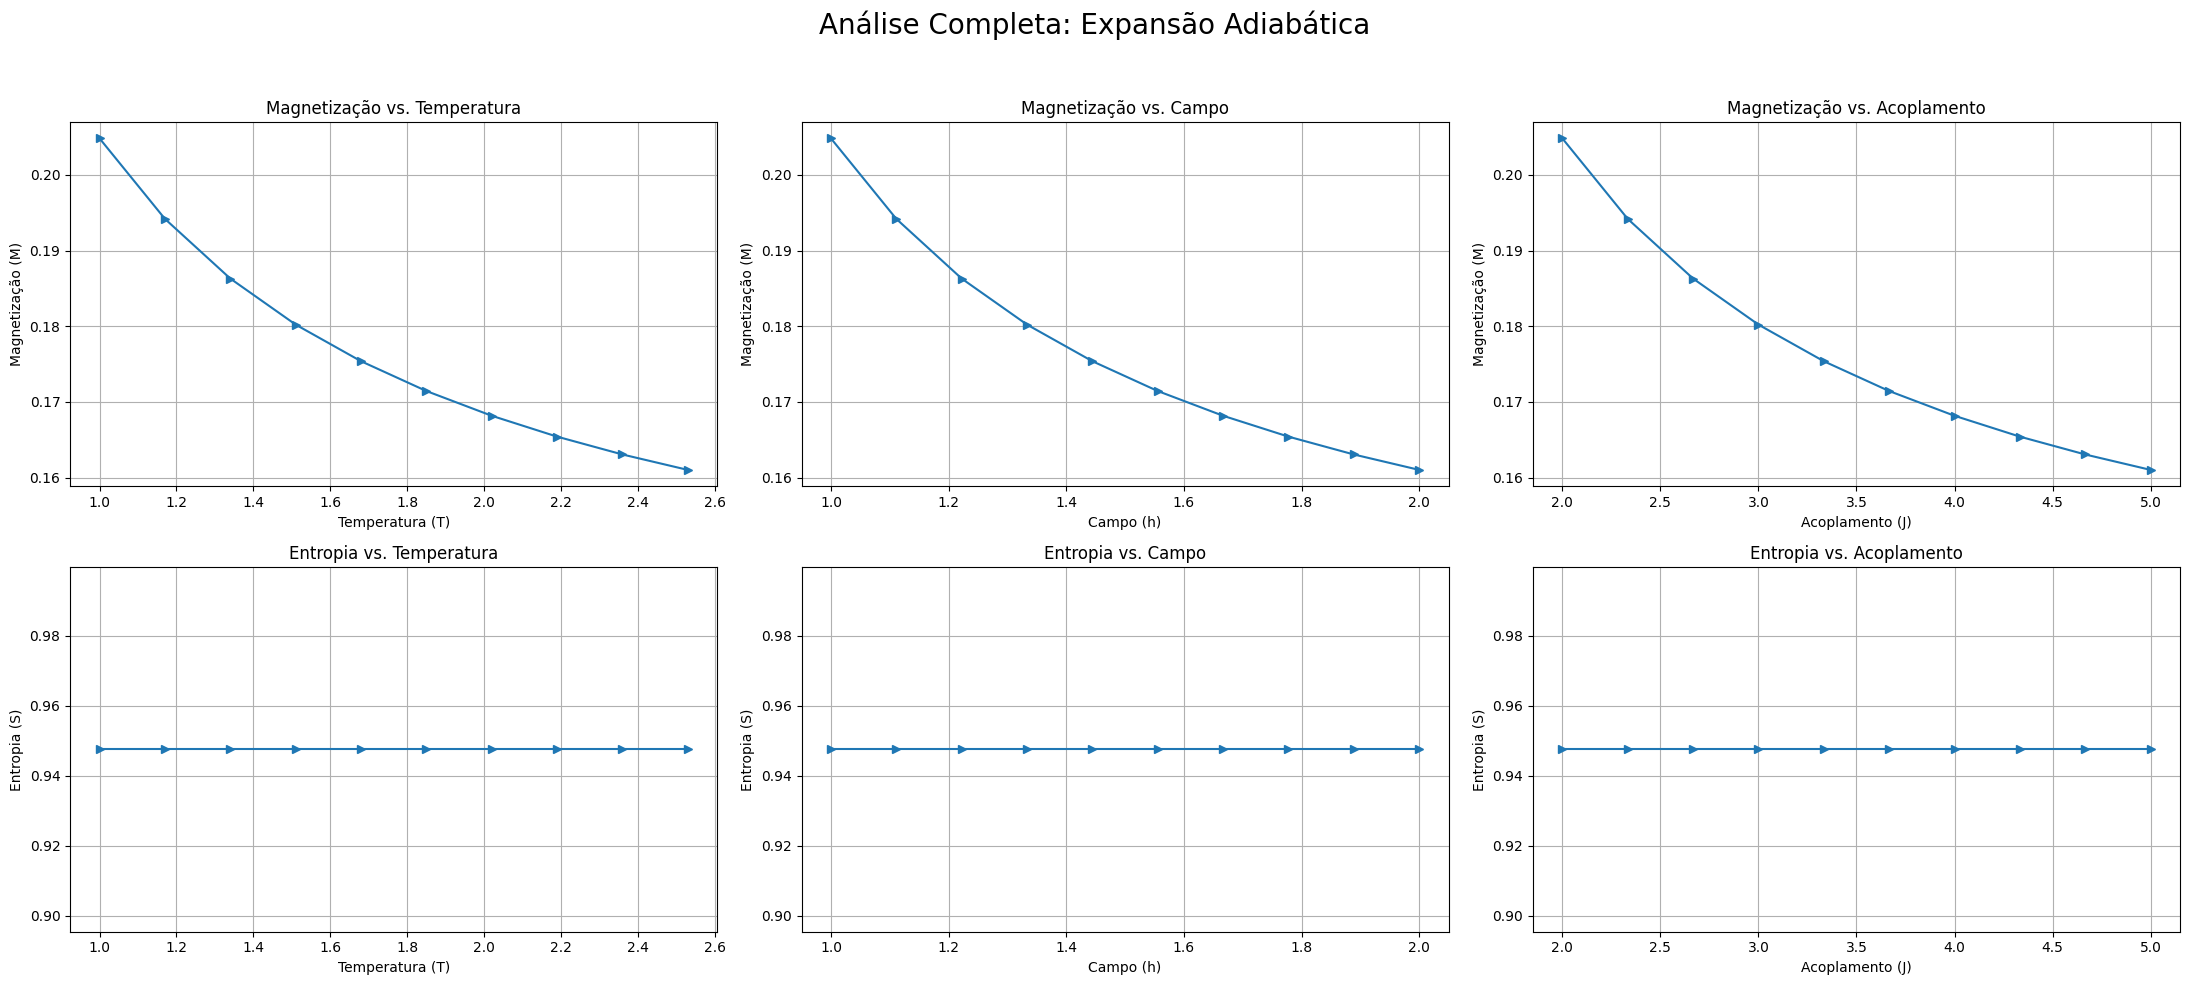

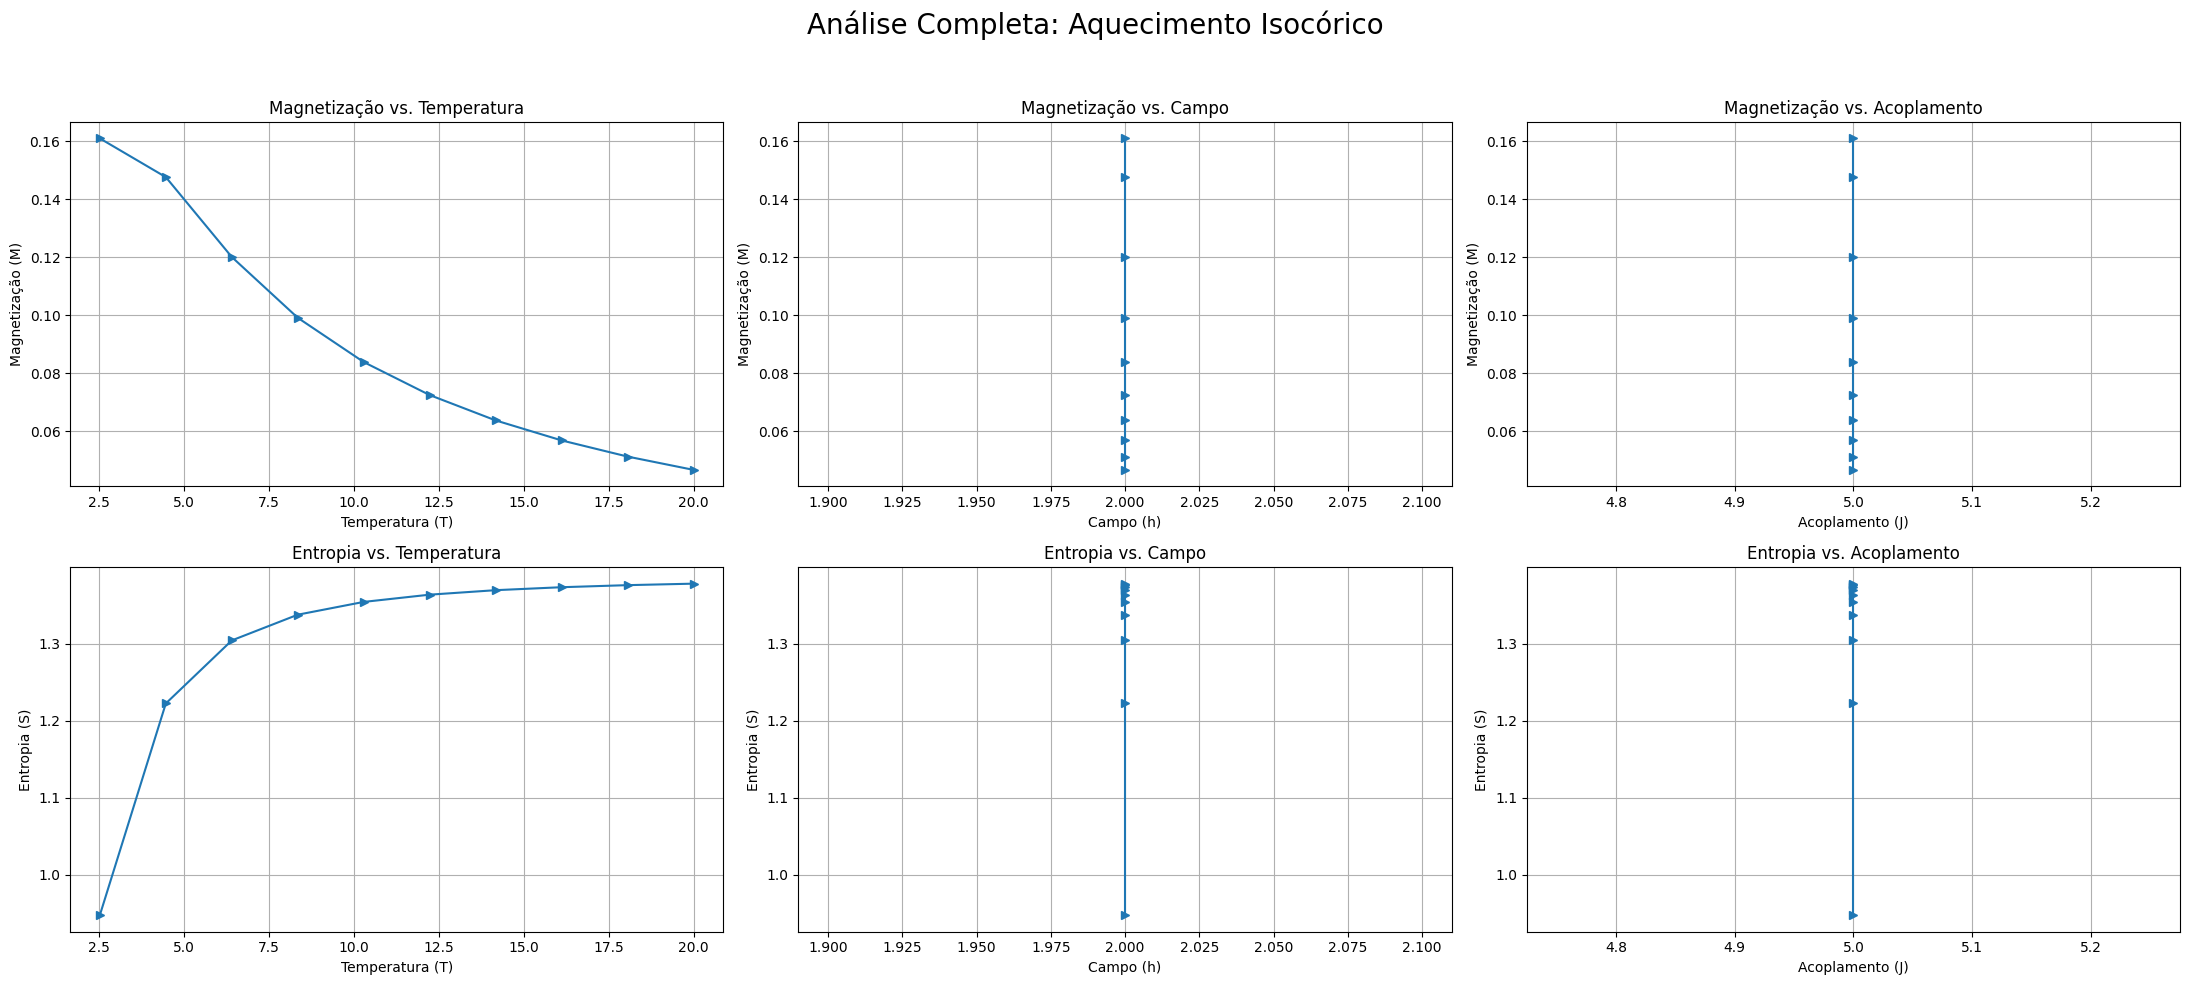

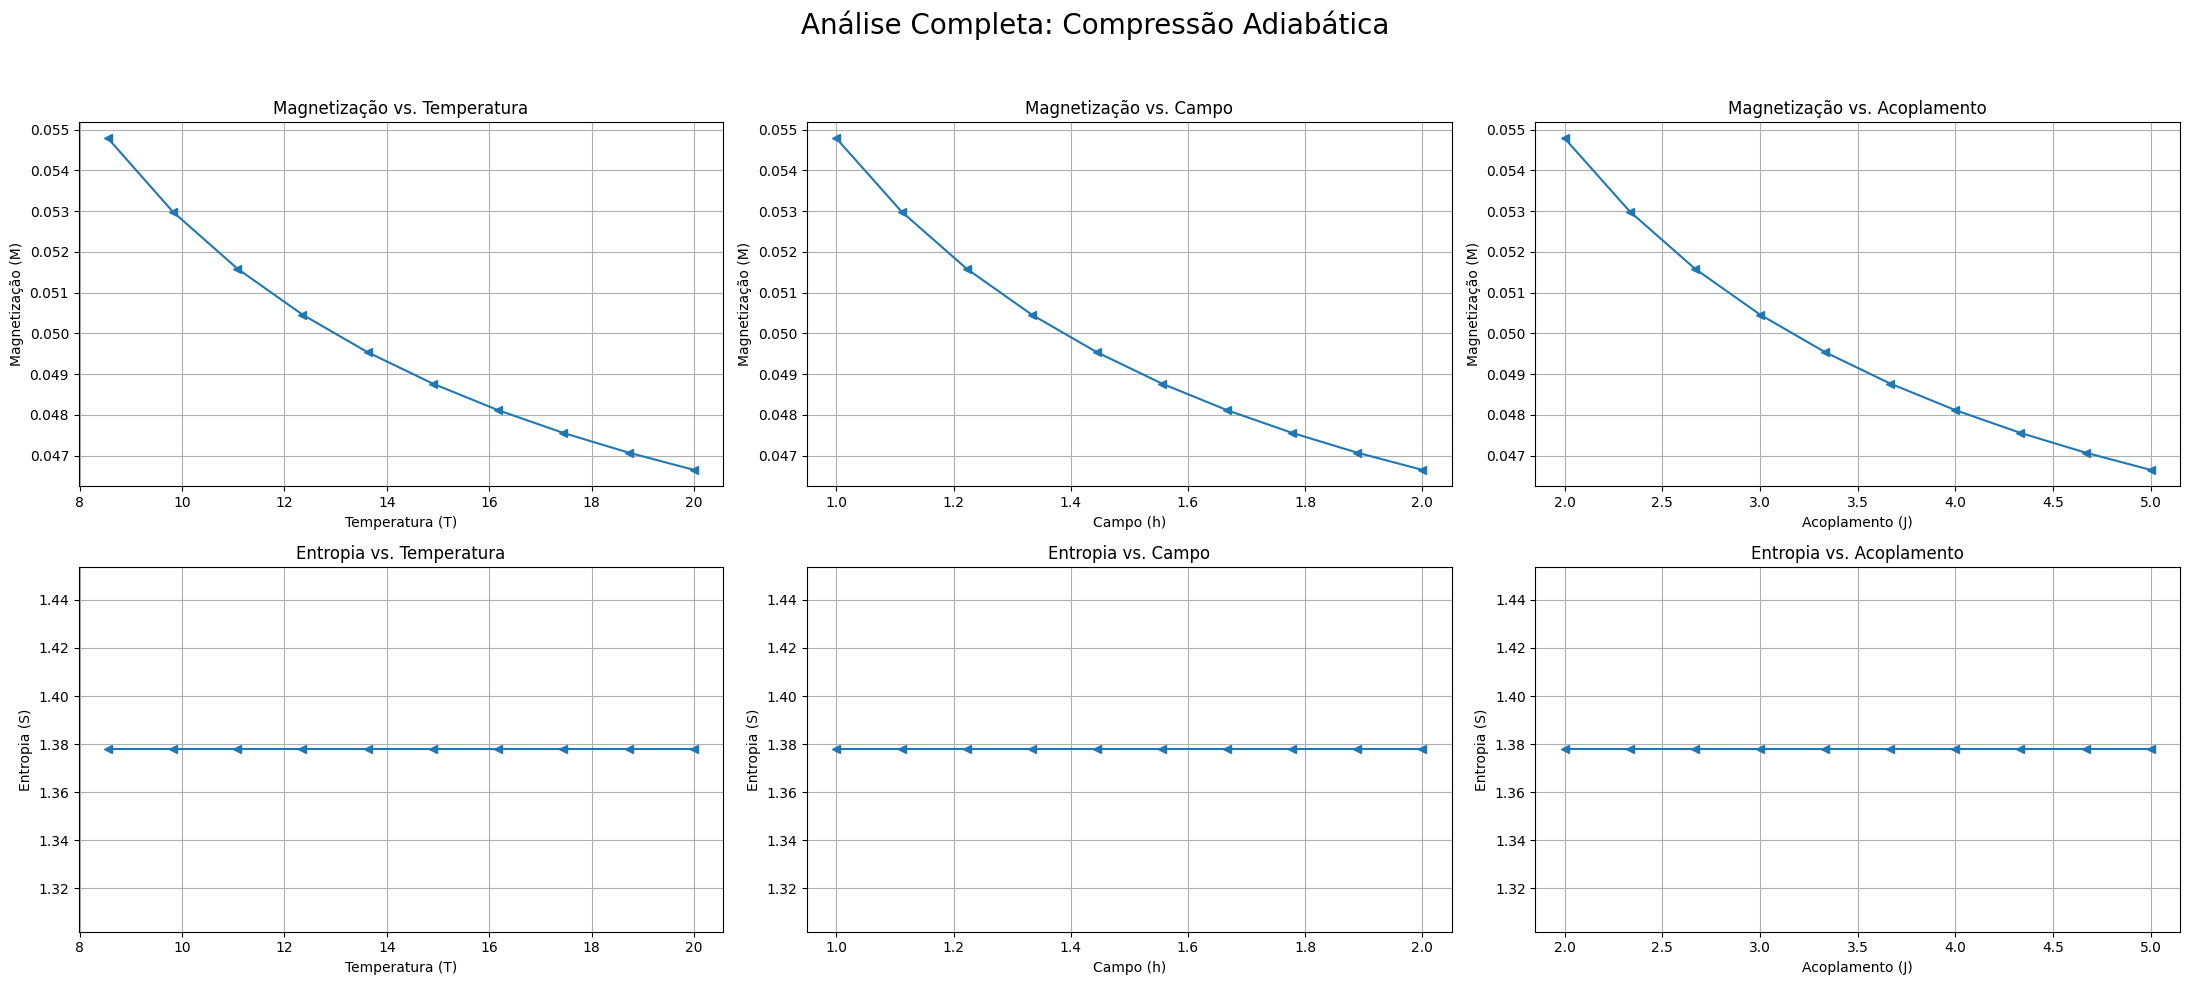

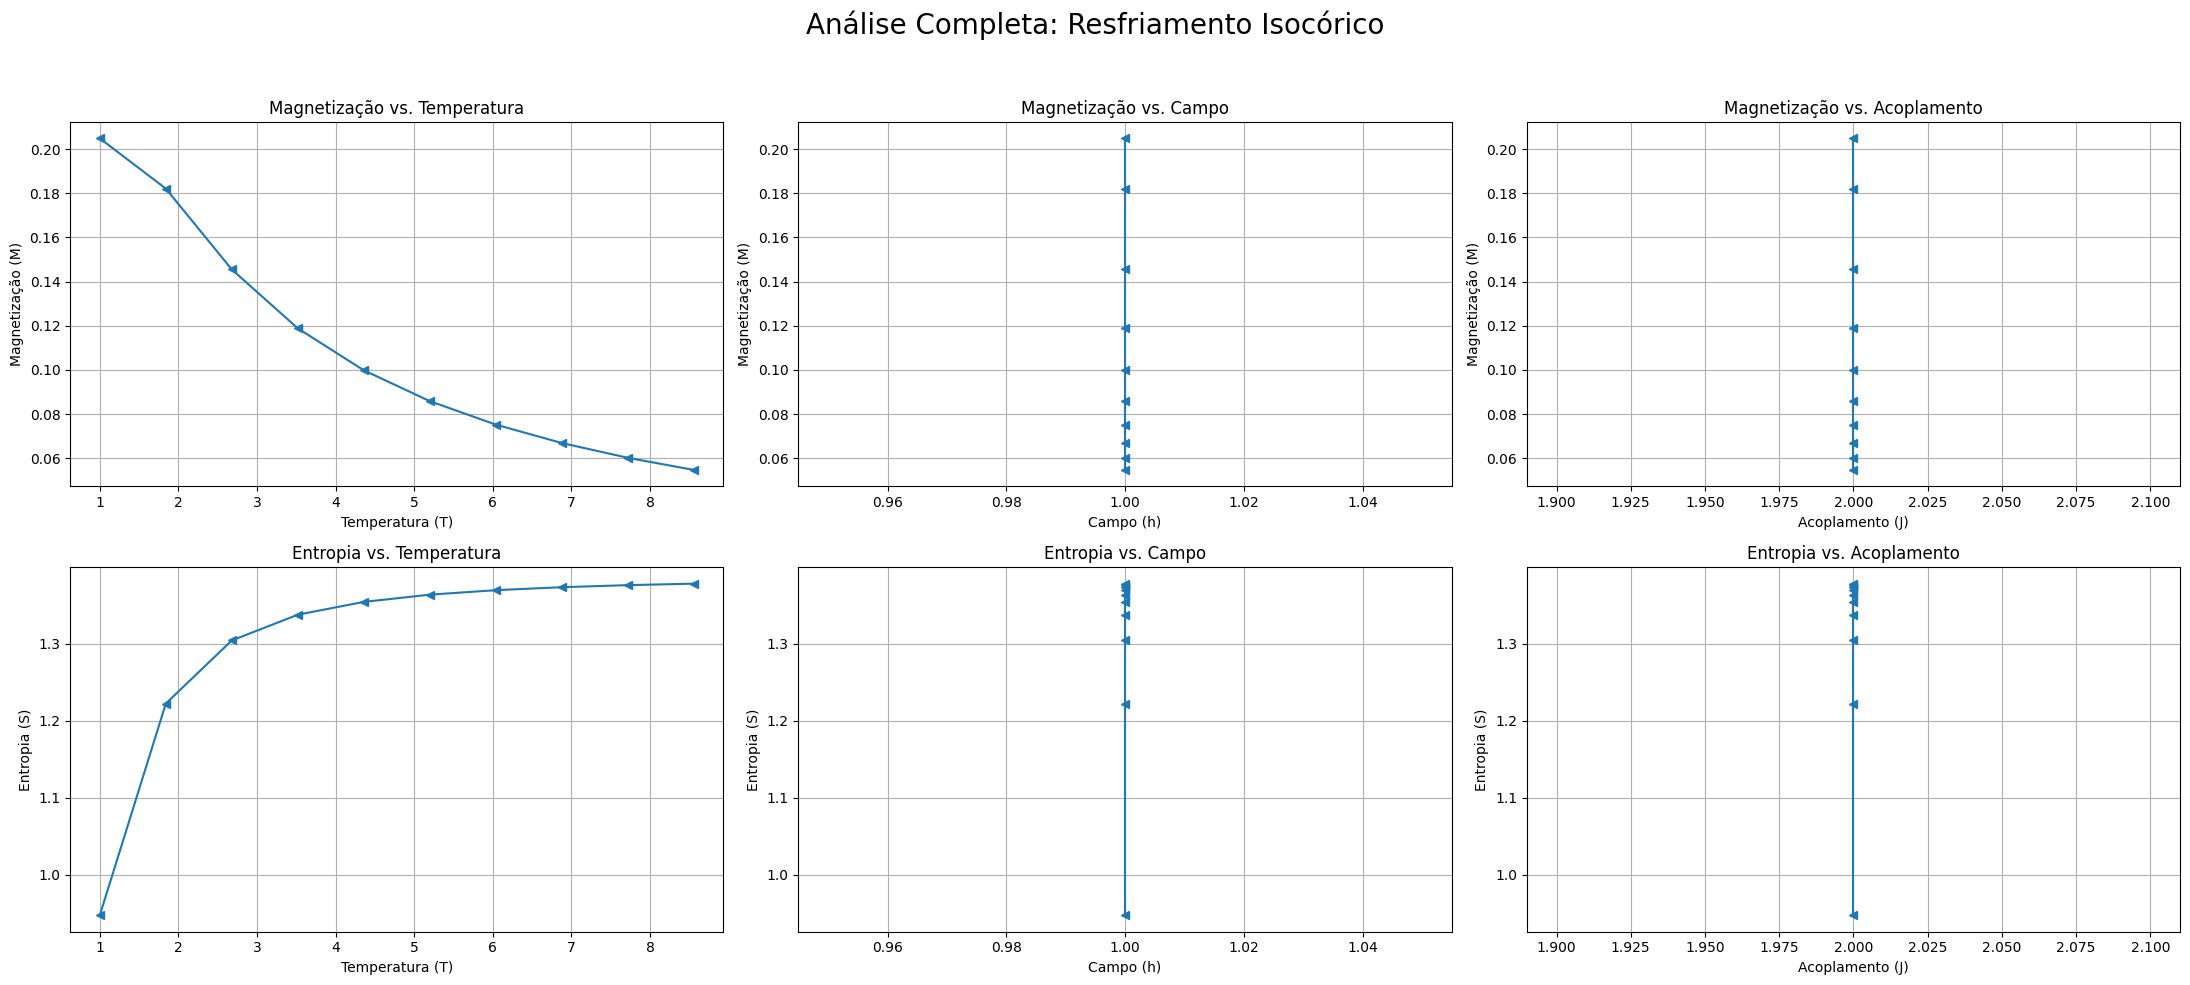

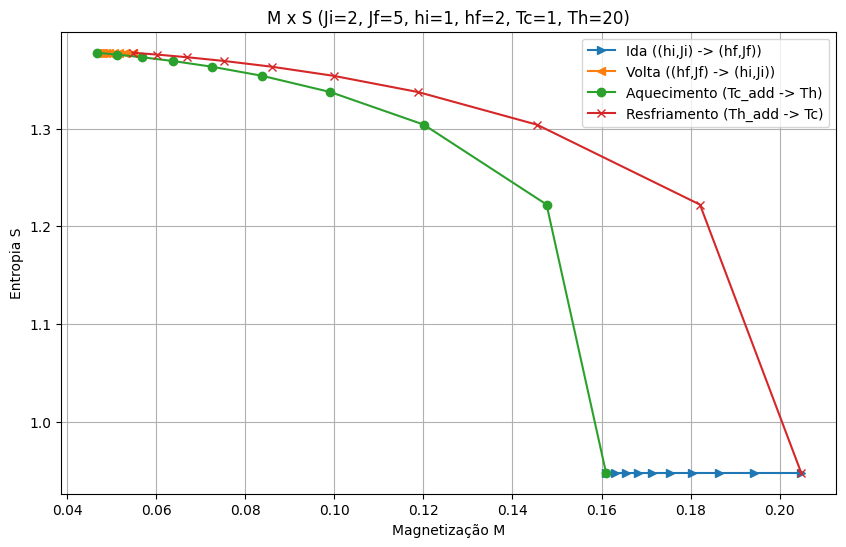

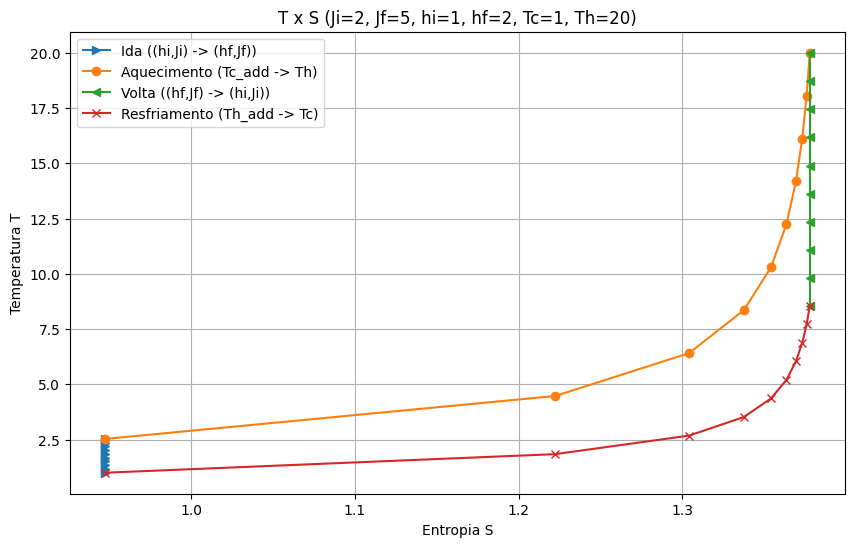

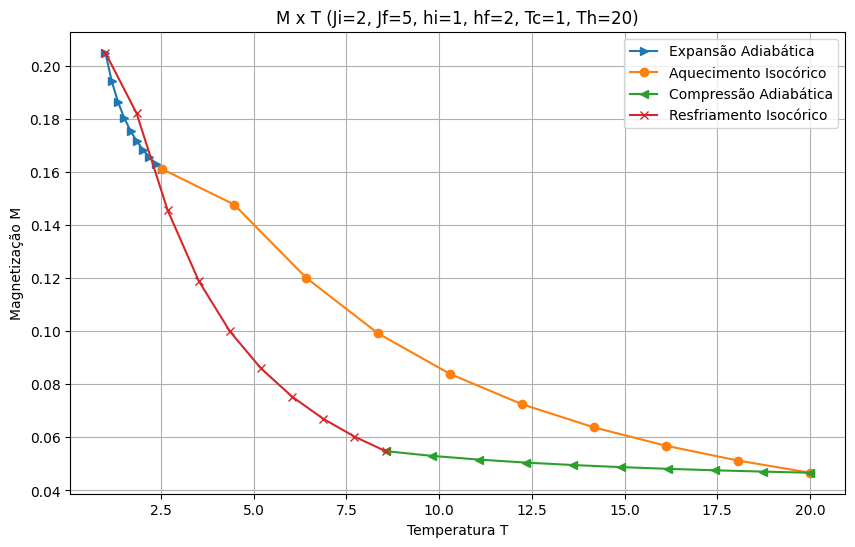

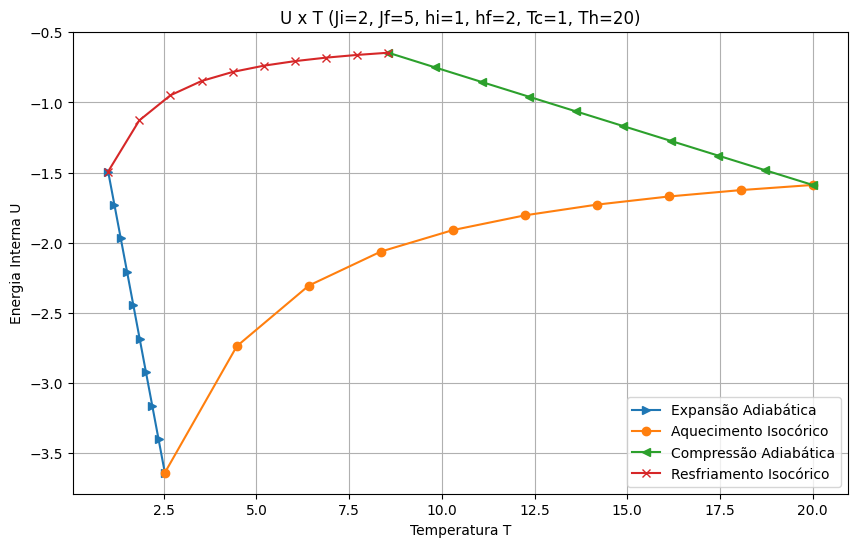

In [174]:
Ji = 2; Jf = 5; hi = 1; hf = 2; Tc = 1; Th = 20; PASSOS = 10

# Chamando a função principal para executar o ciclo
main(Ji, Jf, hi, hf, Tc, Th, PASSOS, True)

In [1]:
Ji = 0; Jf= 0; hi = 1; hf = 5; Tc= 1; Th=6; PASSOS = 10
main(Ji, Jf, hi, hf, Tc, Th, PASSOS, True)

NameError: name 'main' is not defined

-------------------------------------------

Aqui eu vou plotar um gráfico em 3D da magnetização em função de J e h, durantes o processo adiabático